## 라이브러리 로드

## 건강검진 정보
* https://www.data.go.kr/dataset/15007122/fileData.do
* https://rstudio-pubs-static.s3.amazonaws.com/439731_2f1ad2790c734c24a9df7b3b5bb8ad35.html

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

%matplotlib inline

In [297]:
import warnings
warnings.filterwarnings(action='ignore')

## 한글폰트 설정

In [298]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

#Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

## 데이터 불러오기

In [299]:
df = pd.read_csv("data/nhis/국민건강보험공단_건강검진정보_2019.csv", encoding="cp949")
df.shape

(1000000, 34)

### 데이터 미리보기

In [300]:
df.sample()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
705329  2019    705330    26     1             7        165          60  69.0   

        시력(좌)  시력(우)  ...  감마 지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치 유무  \
705329    1.2    1.2  ...    20.0   2.0   1.0          1      0.0     미시행   

        치아마모증유무  제3대구치(사랑니) 이상   치석  데이터 공개일자  
705329      미시행            미시행  1.0  20191231  

[1 rows x 34 columns]

## 기본정보 보기

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [302]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [303]:
#컬럼명의 공백 제거하기
df.columns = df.columns.str.replace(' ', '')

In [304]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [305]:
df.dtypes

기준년도              int64
가입자일련번호           int64
시도코드              int64
성별코드              int64
연령대코드(5세단위)       int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무            object
치아마모증유무          object
제3대구치(사랑니)이상     object
치석              float64
데이터공개일자           int64
dtype: object

## 결측치 보기

## 연령대코드(5세단위)

| 그룹 | 연령대 | 그룹 | 연령대 |
|------|------|------|------|
| 5  | 20~24세 | 12 | 55~59세 |
| 6	 | 25~29세 | 13 | 60~64세 |
| 7	 | 30~34세 | 14 | 65~69세 |
| 8	 | 35~39세 | 15 | 70~74세 |
| 9	 | 40~44세 | 16 | 75~79세 |
| 10 | 45~49세 | 17 | 80~84세 |
| 11 | 50~54세 | 18 | 85세+ |

In [306]:
df['연령대코드(5세단위)'].value_counts()

11    128758
9     119107
13    112532
10    109661
12    102992
8      85019
7      82067
6      70314
15     53789
14     53733
5      32953
16     26337
17     18387
18      4351
Name: 연령대코드(5세단위), dtype: int64

In [307]:
df.isnull().sum()

기준년도                 0
가입자일련번호              0
시도코드                 0
성별코드                 0
연령대코드(5세단위)          0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레               403
시력(좌)              195
시력(우)              188
청력(좌)              181
청력(우)              178
수축기혈압             5424
이완기혈압             5425
식전혈당(공복혈당)        5523
총콜레스테롤          666451
트리글리세라이드        666456
HDL콜레스테롤        666459
LDL콜레스테롤        672852
혈색소               5532
요단백              10306
혈청크레아티닌           5526
(혈청지오티)AST        5522
(혈청지오티)ALT        5523
감마지티피             5530
흡연상태               166
음주여부            355082
구강검진수검여부             0
치아우식증유무         602320
결손치유무                0
치아마모증유무              0
제3대구치(사랑니)이상         0
치석              602320
데이터공개일자              0
dtype: int64

In [308]:
df.isna().sum()

기준년도                 0
가입자일련번호              0
시도코드                 0
성별코드                 0
연령대코드(5세단위)          0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레               403
시력(좌)              195
시력(우)              188
청력(좌)              181
청력(우)              178
수축기혈압             5424
이완기혈압             5425
식전혈당(공복혈당)        5523
총콜레스테롤          666451
트리글리세라이드        666456
HDL콜레스테롤        666459
LDL콜레스테롤        672852
혈색소               5532
요단백              10306
혈청크레아티닌           5526
(혈청지오티)AST        5522
(혈청지오티)ALT        5523
감마지티피             5530
흡연상태               166
음주여부            355082
구강검진수검여부             0
치아우식증유무         602320
결손치유무                0
치아마모증유무              0
제3대구치(사랑니)이상         0
치석              602320
데이터공개일자              0
dtype: int64

<AxesSubplot:>

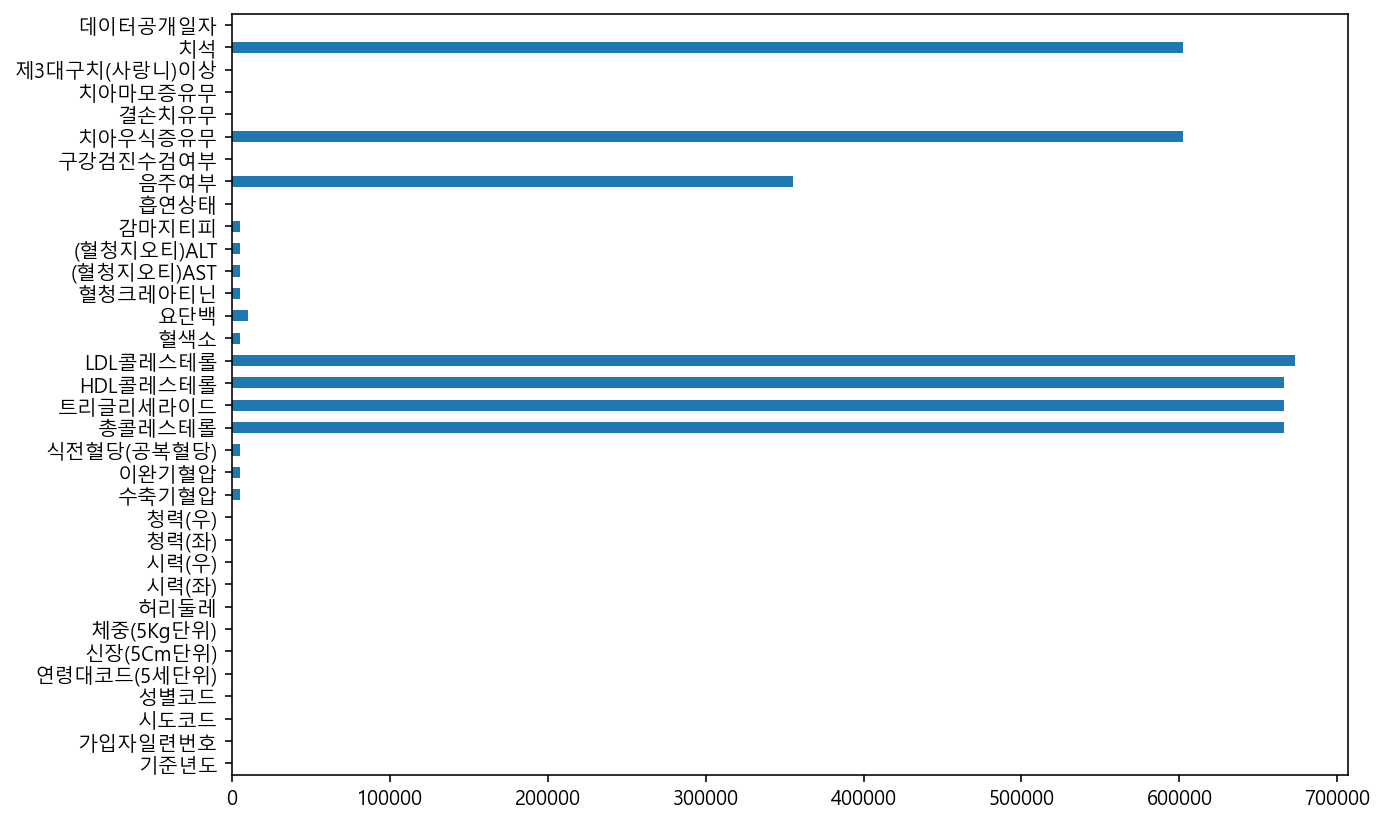

In [309]:
df.isnull().sum().plot.barh(figsize=(10, 7))

## 일부 데이터 요약하기

In [310]:
df['음주여부'].unique()

array([nan,  1.,  0.])

In [311]:
#음주여부 nan 값은 0.0으로 치환
df.loc[df['음주여부'].isnull(),'음주여부'] = 0.

In [312]:
df['음주여부'].unique()

array([0., 1.])

In [313]:
df[["시력(좌)", "시력(우)"]].head()

시력(좌)  시력(우)
0    1.5    1.2
1    1.2    0.5
2    0.9    0.8
3    0.4    1.2
4    0.7    0.7

In [314]:
df[["시력(좌)", "시력(우)"]].describe()

시력(좌)          시력(우)
count  999805.000000  999812.000000
mean        0.971909       0.970951
std         0.593307       0.600537
min         0.100000       0.100000
25%         0.700000       0.700000
50%         1.000000       1.000000
75%         1.200000       1.200000
max         9.900000       9.900000

## value_counts 로 값 집계하기

In [315]:
df["성별코드"].value_counts()

1    519574
2    480426
Name: 성별코드, dtype: int64

In [316]:
df["흡연상태"].value_counts()

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

In [317]:
df['연령대코드(5세단위)'].value_counts()

11    128758
9     119107
13    112532
10    109661
12    102992
8      85019
7      82067
6      70314
15     53789
14     53733
5      32953
16     26337
17     18387
18      4351
Name: 연령대코드(5세단위), dtype: int64

## groupby 와 pivot_table 사용하기

### groupby

In [318]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    519574
2    480426
Name: 가입자일련번호, dtype: int64

In [319]:
df.groupby(["성별코드", "흡연상태"])["가입자일련번호"].count()

성별코드  흡연상태
1     1.0     180257
      2.0     339250
2     1.0     449969
      2.0      30358
Name: 가입자일련번호, dtype: int64

In [320]:
df.groupby(["성별코드", "흡연상태"])["감마지티피"].mean()

성별코드  흡연상태
1     1.0     39.628721
      2.0     52.872470
2     1.0     22.726347
      2.0     31.512391
Name: 감마지티피, dtype: float64

In [321]:
df.groupby(["성별코드"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드                                                              
1     517658.0  48.280724  58.592202  1.0  21.0  32.0  53.0  999.0
2     476812.0  23.281050  28.835025  1.0  13.0  17.0  24.0  999.0

In [322]:
df.groupby(["성별코드"])["감마지티피"].agg(["mean", "median"])

mean  median
성별코드                   
1     48.280724    32.0
2     23.281050    17.0

In [323]:
df_group = df.groupby(
    ["성별코드", "흡연상태", "음주여부"])["가입자일련번호"].count().reset_index()
df_group

성별코드  흡연상태  음주여부  가입자일련번호
0     1   1.0   0.0    57348
1     1   1.0   1.0   122909
2     1   2.0   0.0    60955
3     1   2.0   1.0   278295
4     2   1.0   0.0   229402
5     2   1.0   1.0   220567
6     2   2.0   0.0     7313
7     2   2.0   1.0    23045

In [324]:
df_group = df.groupby(
    ["성별코드", "흡연상태", "음주여부"])["가입자일련번호"].count().reset_index()
df_group.columns = ["성별코드", "흡연상태", "음주여부", "인원수"]
df_group

성별코드  흡연상태  음주여부     인원수
0     1   1.0   0.0   57348
1     1   1.0   1.0  122909
2     1   2.0   0.0   60955
3     1   2.0   1.0  278295
4     2   1.0   0.0  229402
5     2   1.0   1.0  220567
6     2   2.0   0.0    7313
7     2   2.0   1.0   23045

### pivot_table

In [325]:
pd.pivot_table(df, index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      519574
2      480426

* 감마지티피
* 감마지티피(γ-GTP)를 통해 간질환 외에 비만, 당뇨병, 동맥경화증 등 여러 가지 생활습관병이 동시다발적으로 일어나는 대사증후군을 예측



In [326]:
pd.pivot_table(df, index="성별코드", values="감마지티피")

감마지티피
성별코드           
1     48.280724
2     23.281050

In [327]:
pd.pivot_table(df, index="성별코드", values="감마지티피", aggfunc="mean")

감마지티피
성별코드           
1     48.280724
2     23.281050

In [328]:
pd.pivot_table(df, index="성별코드", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
성별코드                  
1     48.280724   32.0
2     23.281050   17.0

In [329]:
pd.pivot_table(df, index="성별코드", values="감마지티피", aggfunc=["describe"])

describe                                                        
          25%   50%   75%     count    max       mean  min        std
성별코드                                                                 
1        21.0  32.0  53.0  517658.0  999.0  48.280724  1.0  58.592202
2        13.0  17.0  24.0  476812.0  999.0  23.281050  1.0  28.835025

In [330]:
# 흡연상태 - 1.0 흡연않함, 2.0 흡연함
pd.pivot_table(df, index="성별코드", columns="흡연상태", values="감마지티피")

흡연상태        1.0        2.0
성별코드                      
1     39.628721  52.872470
2     22.726347  31.512391

In [331]:
# 음주여부 - 0.0 음주않함, 1.0 음주함
pd.pivot_table(df, index="성별코드", columns="음주여부", values="감마지티피")

음주여부        0.0        1.0
성별코드                      
1     35.020988  52.159757
2     22.985287  23.565117

## 전체 데이터 시각화 하기

### 히스토그램
* 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있었습니다. 
* 히스토그램을 사용하면 수치데이터를 bin 의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 합니다.
* 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>,
        <AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>],
       [<AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>,
        <AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>],
       [<AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>,
        <Axe

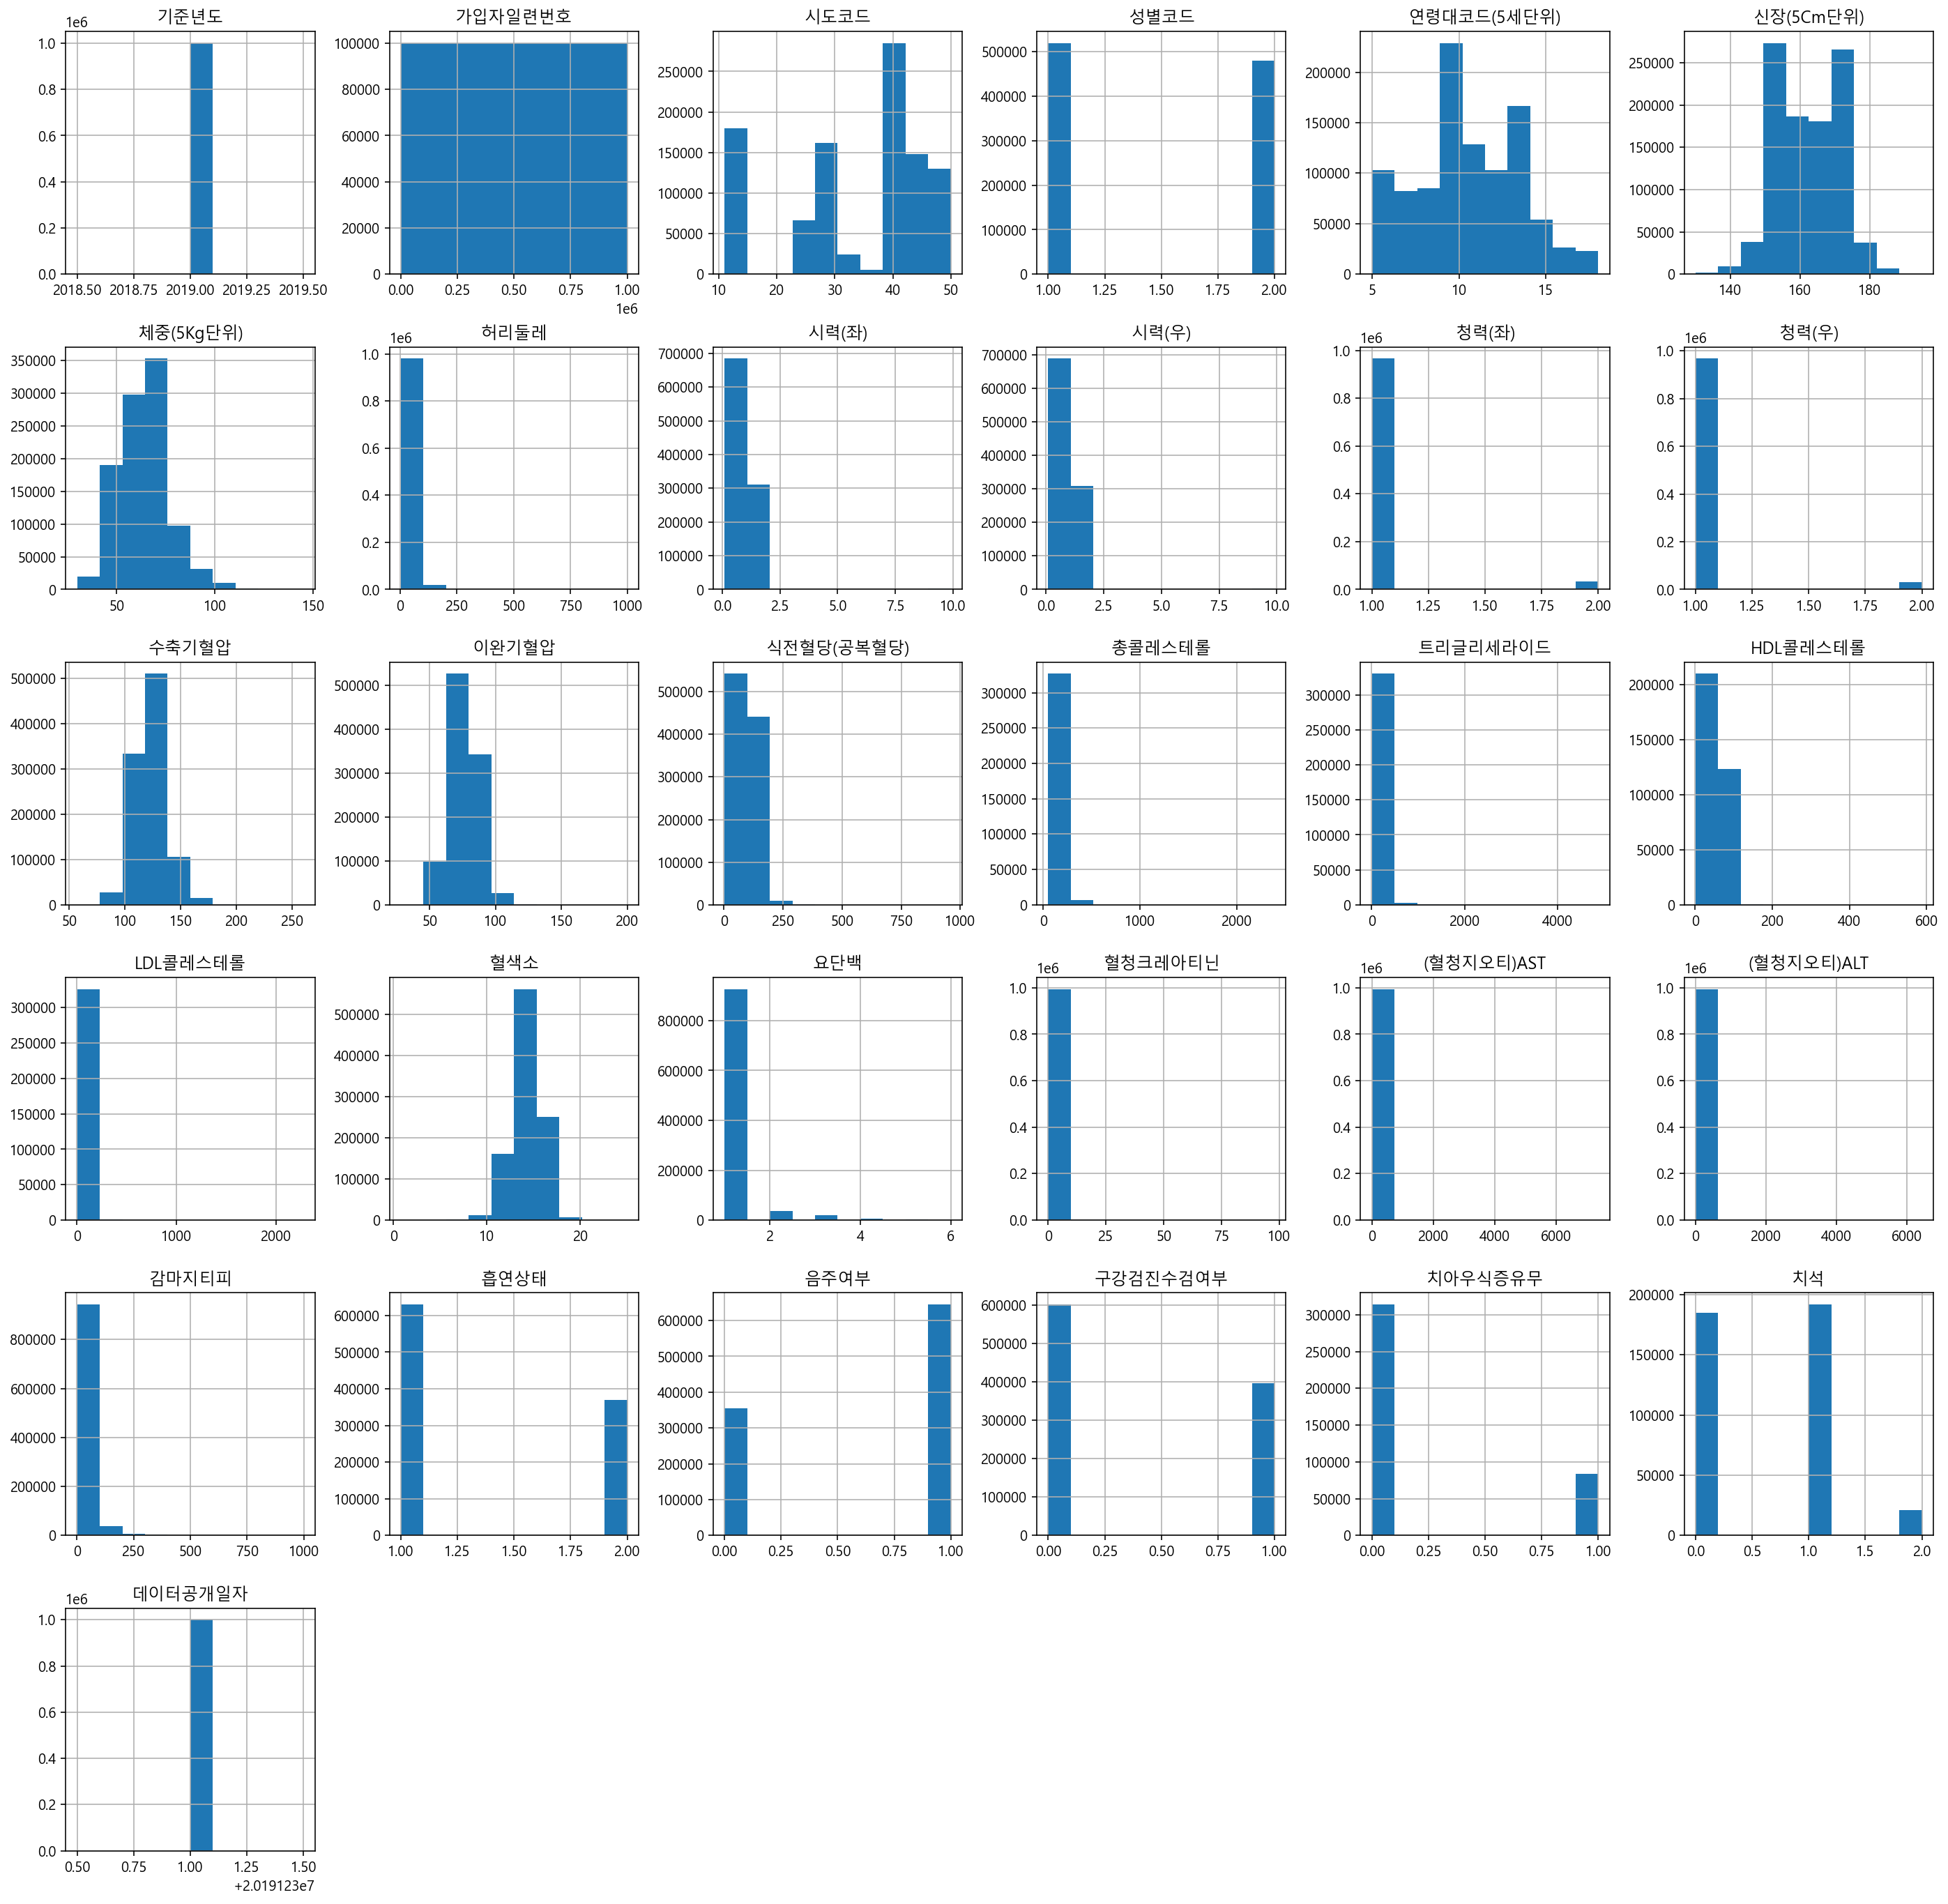

In [332]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
df.hist(figsize=(24, 24))

### 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
* 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
* iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용합니다.
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있습니다.

In [333]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'시도코드'}>],
       [<AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

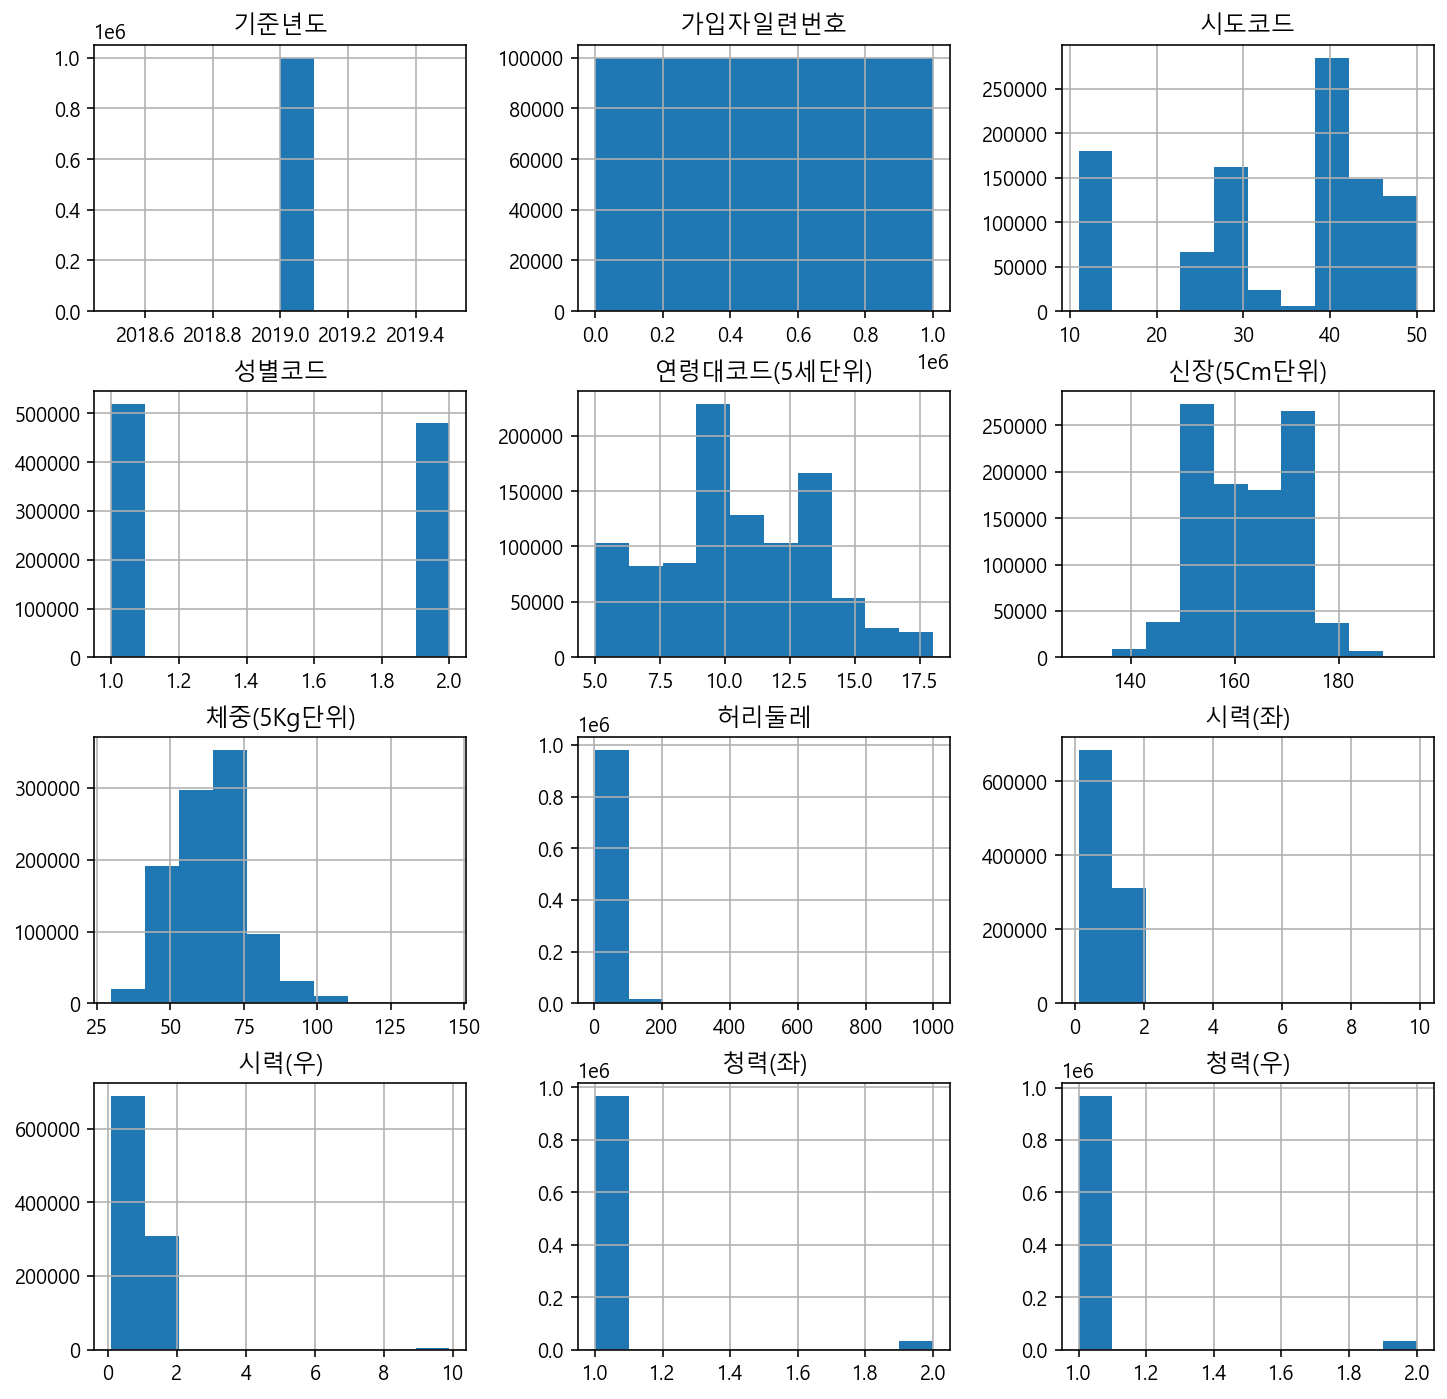

In [334]:
df.iloc[:, :12].hist(figsize=(12, 12))

array([[<AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>],
       [<AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>],
       [<AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>,
        <AxesSubplot:title={'center':'요단백'}>],
       [<AxesSubplot:title={'center':'혈청크레아티닌'}>,
        <AxesSubplot:title={'center':'(혈청지오티)AST'}>,
        <AxesSubplot:title={'center':'(혈청지오티)ALT'}>]], dtype=object)

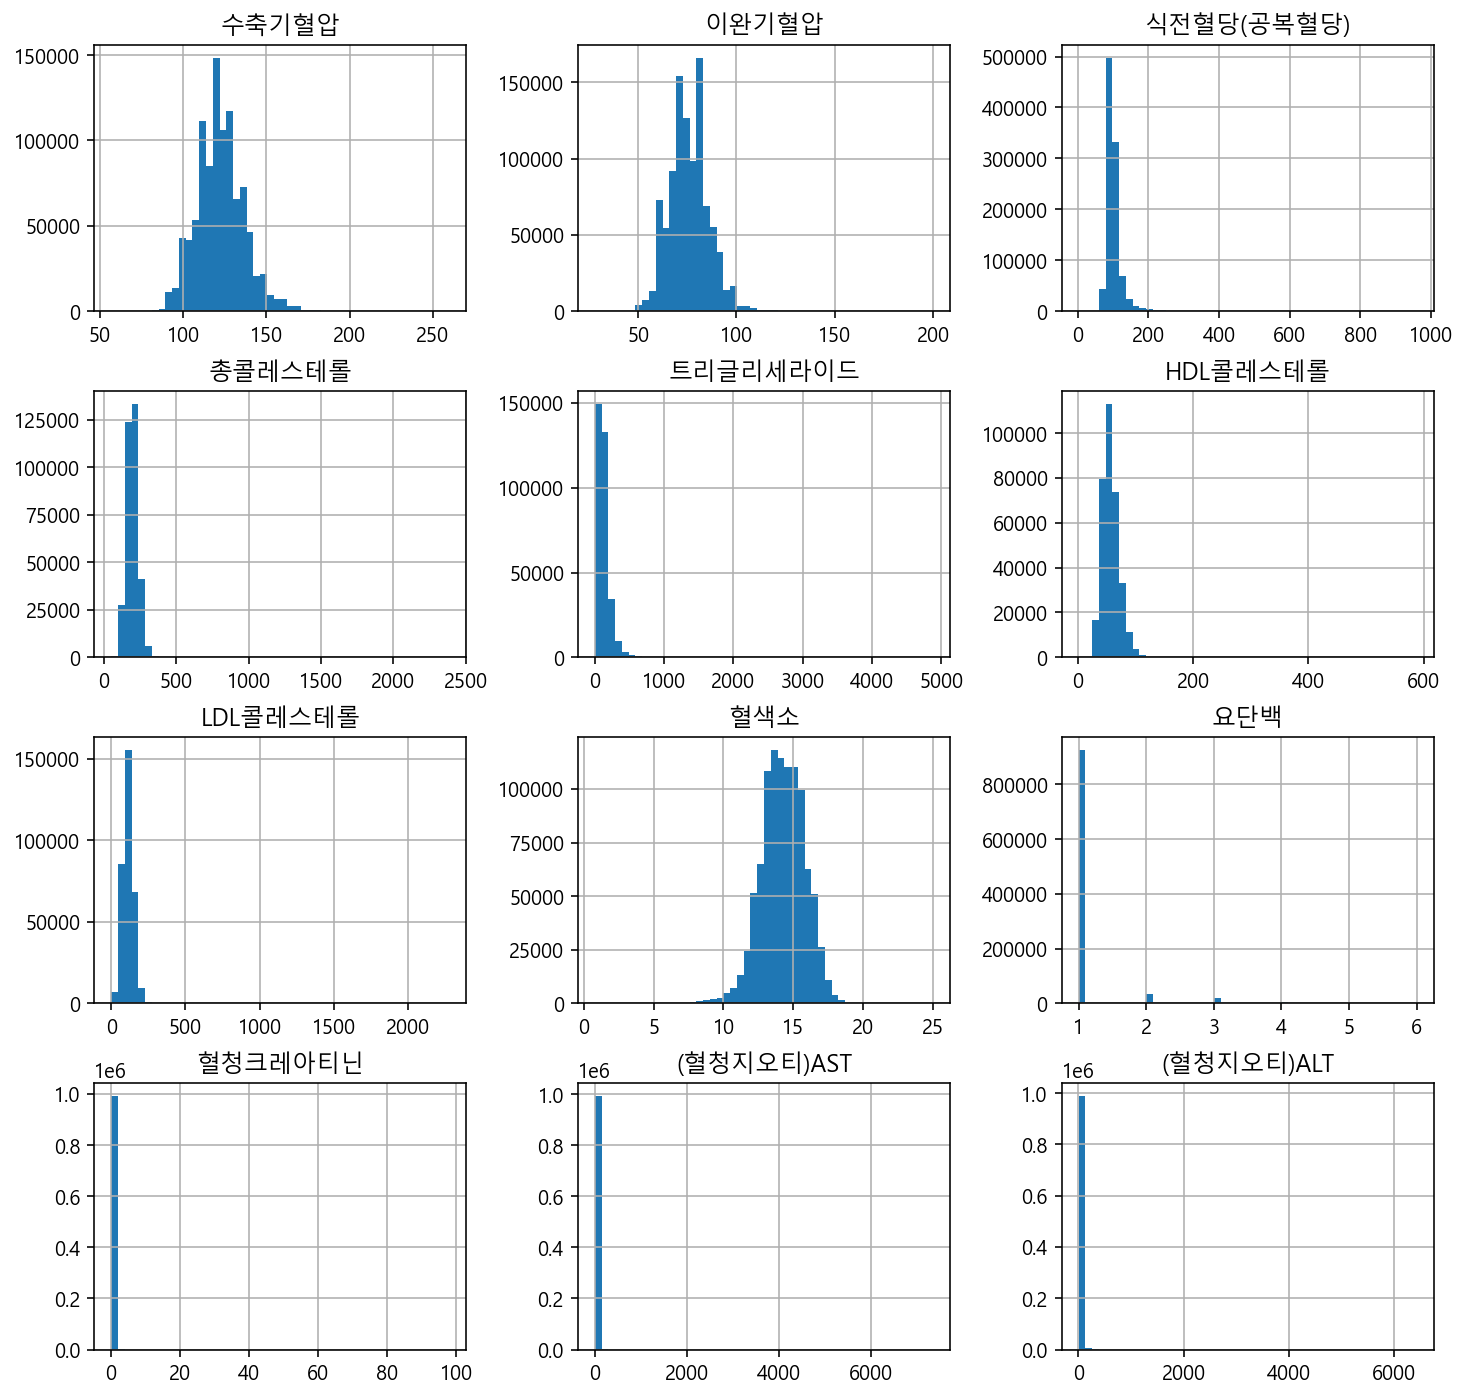

In [335]:
df.iloc[:, 12:24].hist(bins=50, figsize=(12, 12))

array([[<AxesSubplot:title={'center':'감마지티피'}>,
        <AxesSubplot:title={'center':'흡연상태'}>,
        <AxesSubplot:title={'center':'음주여부'}>],
       [<AxesSubplot:title={'center':'구강검진수검여부'}>,
        <AxesSubplot:title={'center':'치아우식증유무'}>,
        <AxesSubplot:title={'center':'치석'}>],
       [<AxesSubplot:title={'center':'데이터공개일자'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

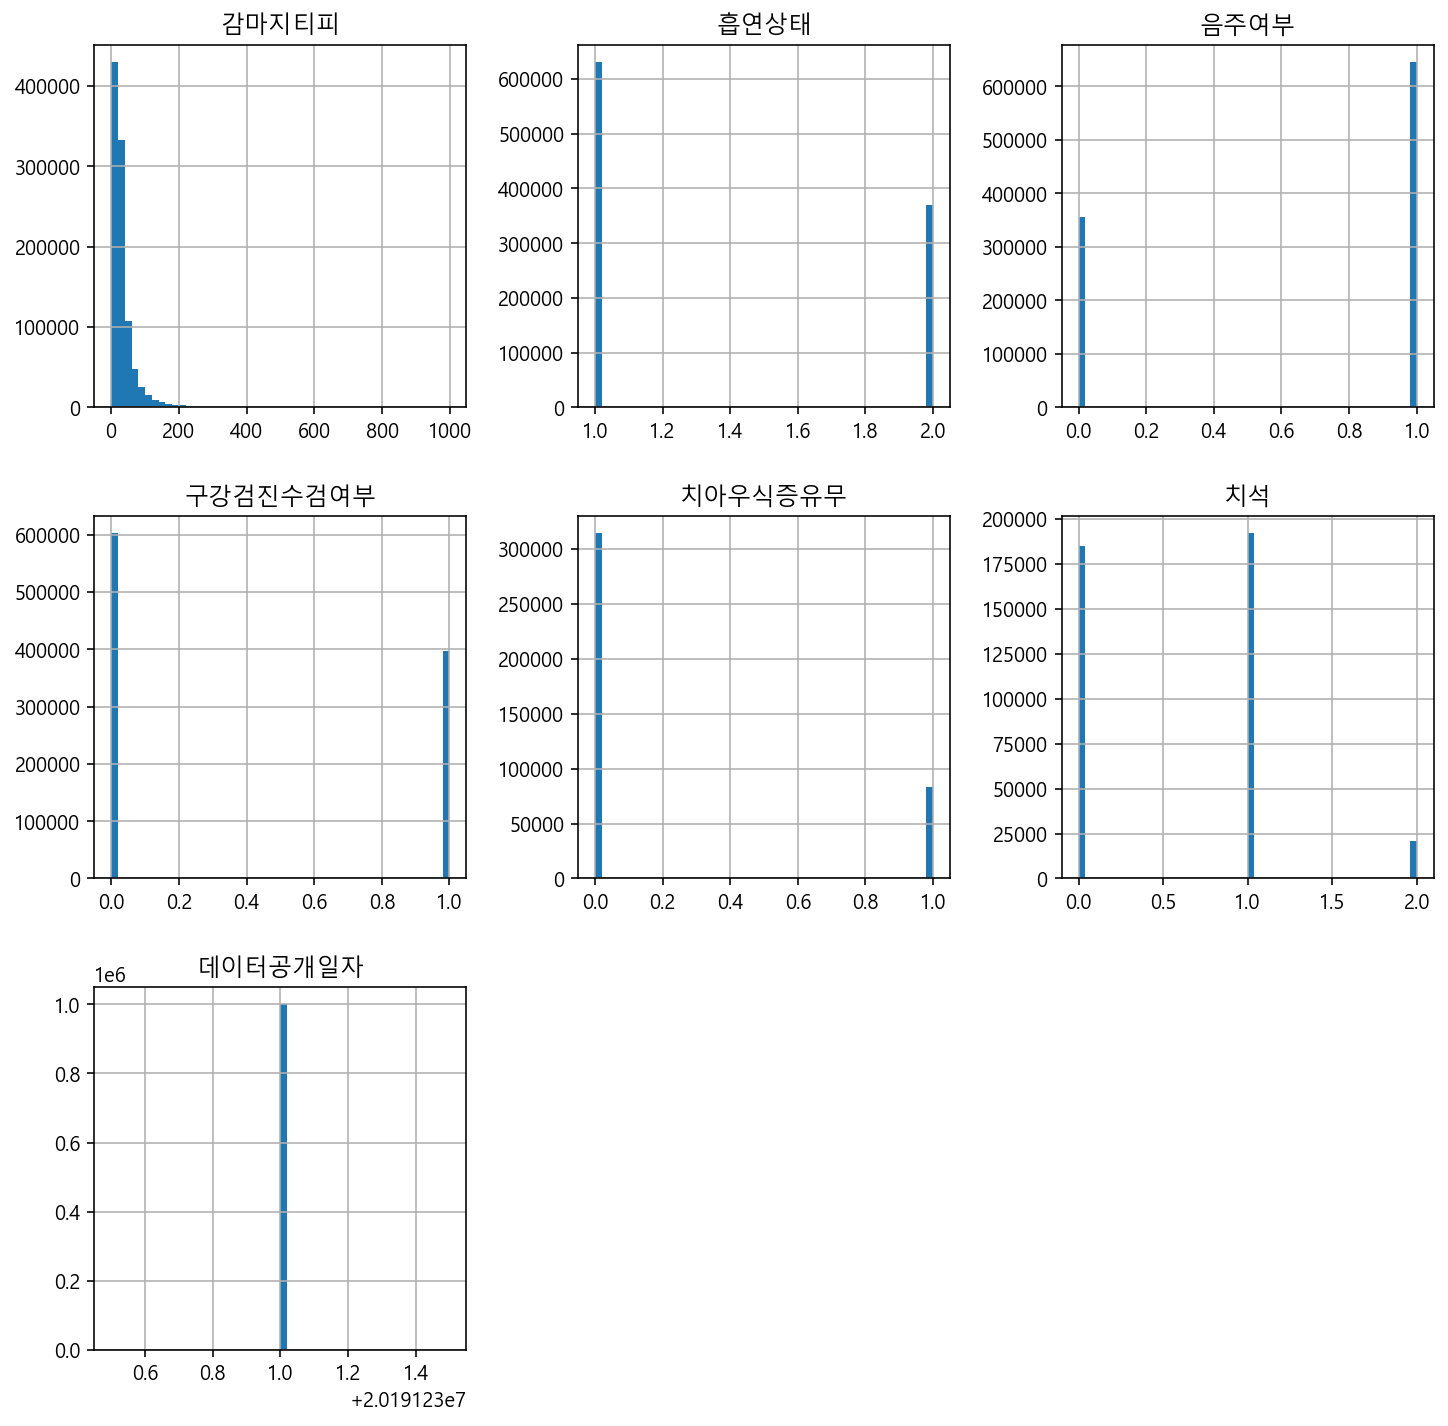

In [336]:
df.iloc[:, 24:].hist(bins=50, figsize=(12, 12))


## 샘플데이터 추출하기
* seaborn 의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
* 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [337]:
# 음주여부 datatype을 float -> int 로 변경
# df['음주여부'] = df['음주여부'].astype(int)
# df['음주여부'].unique()
#df['음주여부'].dtypes

In [338]:
# df.sample을 통해 샘플데이터를 추출합니다.
df_sample = df.sample(3000, random_state=1)
df_sample.shape

(3000, 34)

## 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
* value_counts 로 구한 값을 시각화 한다고 보면 됩니다.

### countplot - 연령대코드

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

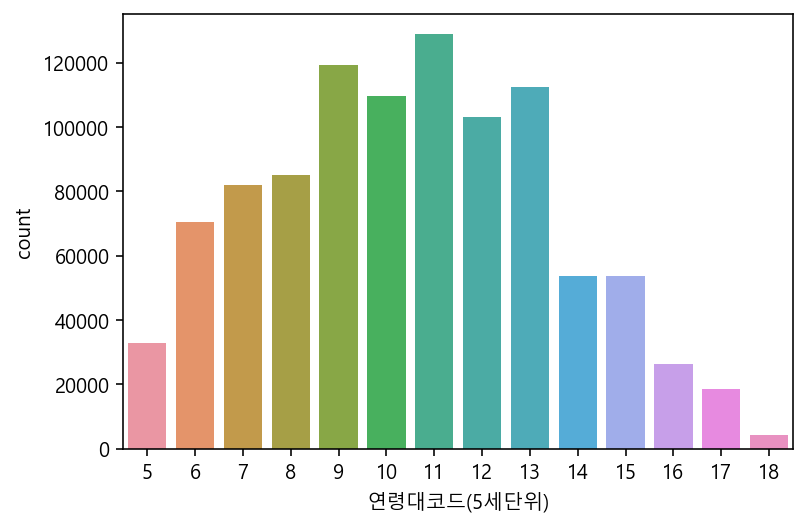

In [339]:
sns.countplot(data=df, x="연령대코드(5세단위)")

### hue 옵션 사용하기

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

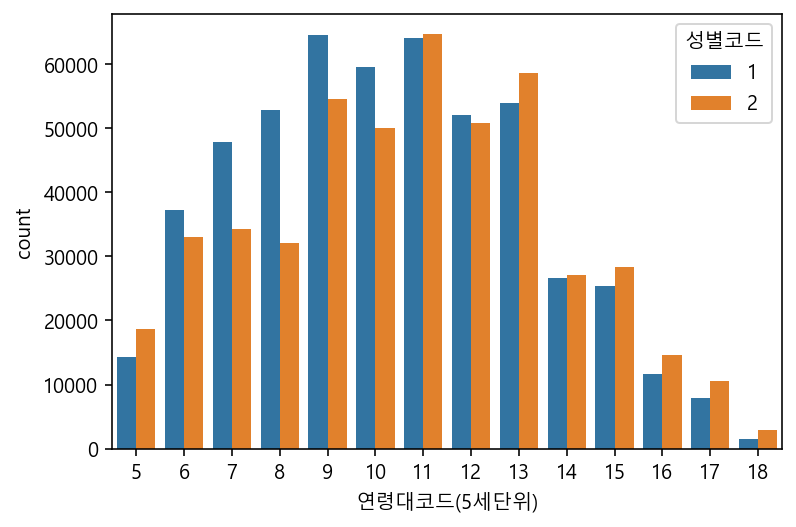

In [340]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="성별코드")

* 흡연상태에 따른 연령대를 봅니다.
```
1 : 흡연 안 함
2 : 흡연 중
```

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

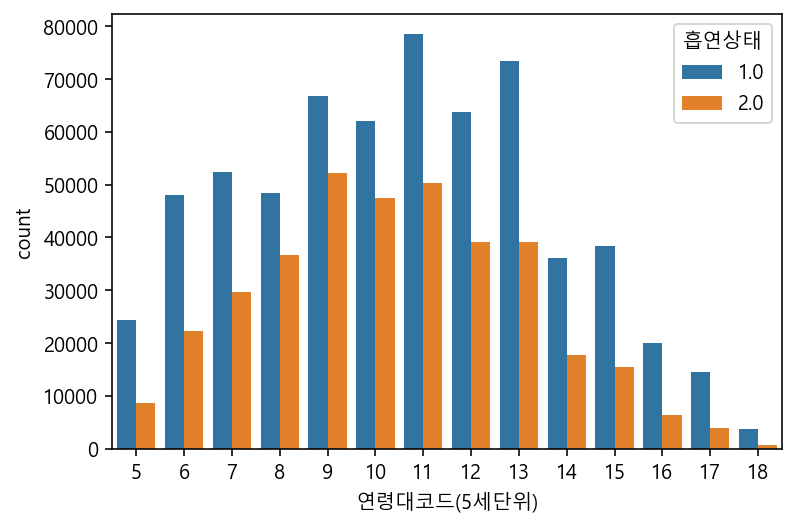

In [341]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

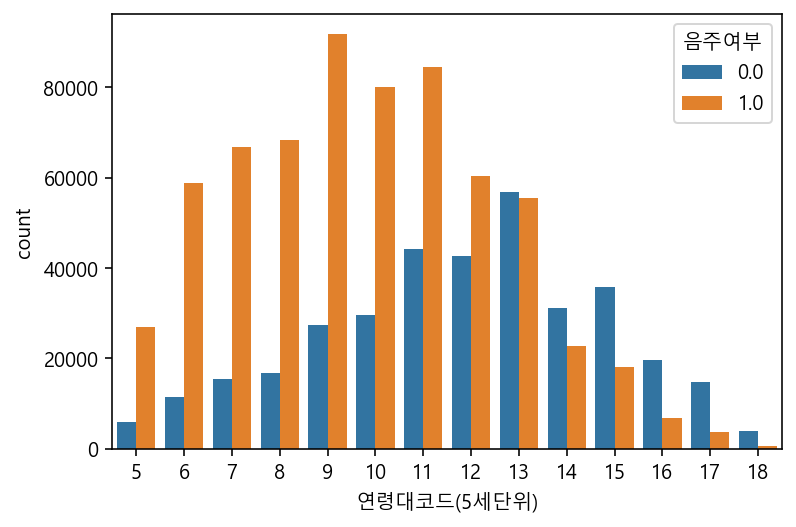

In [342]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

### countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터라고 볼 수 있습니다. 
* 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다. 
* 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

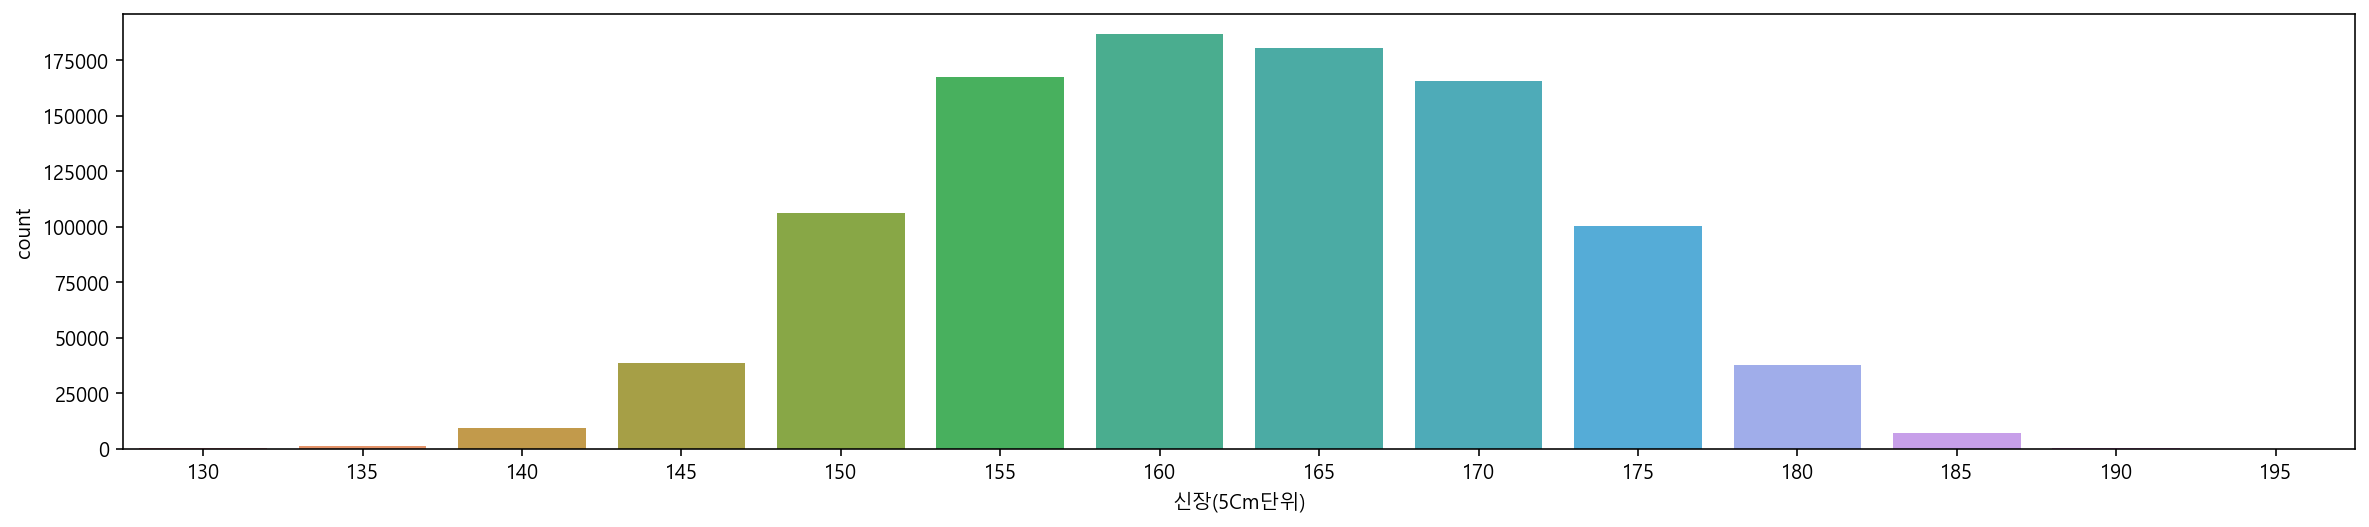

In [343]:
# 키를 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

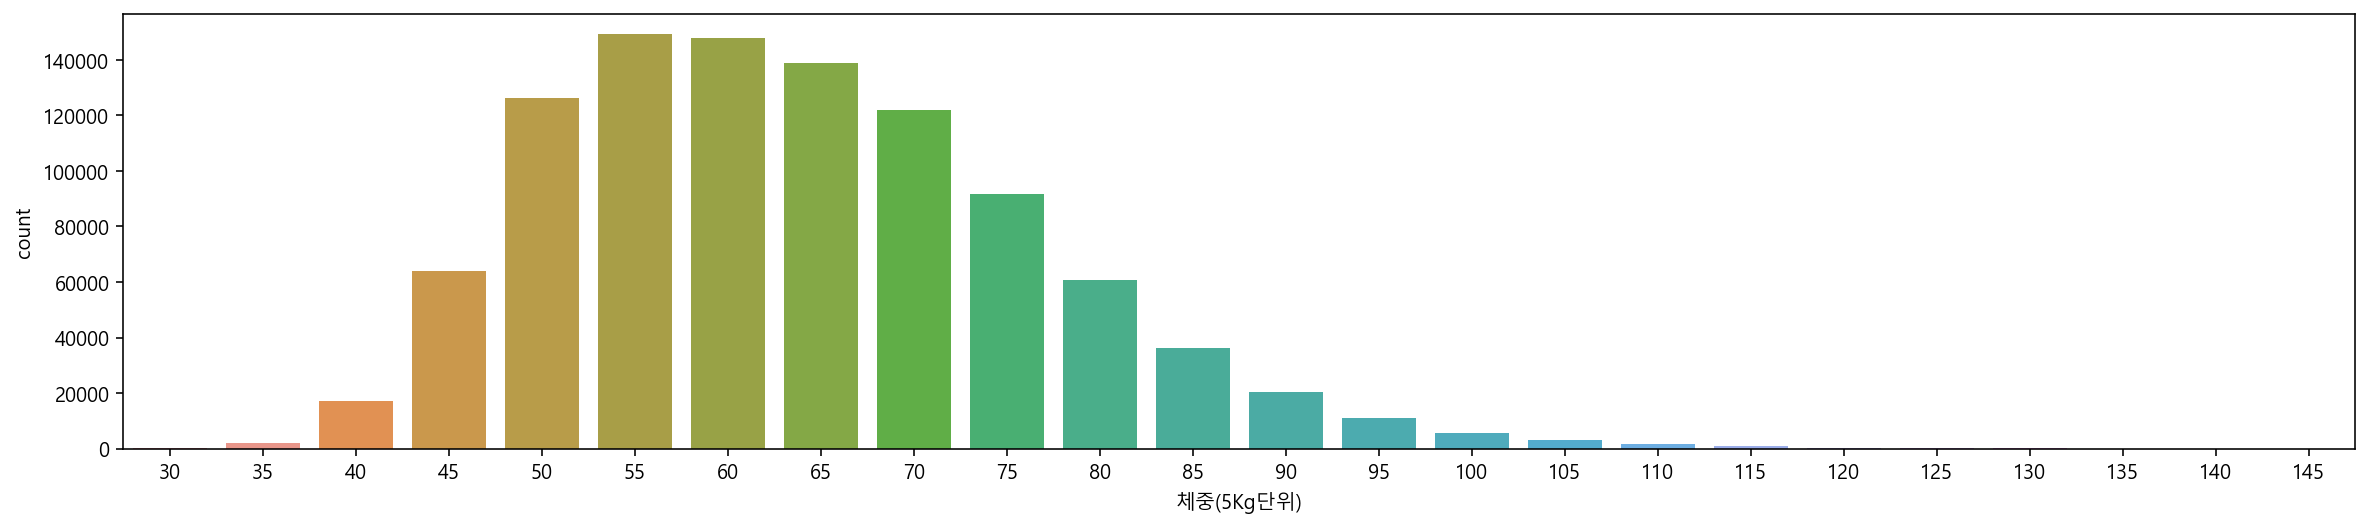

In [344]:
# 체중을 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

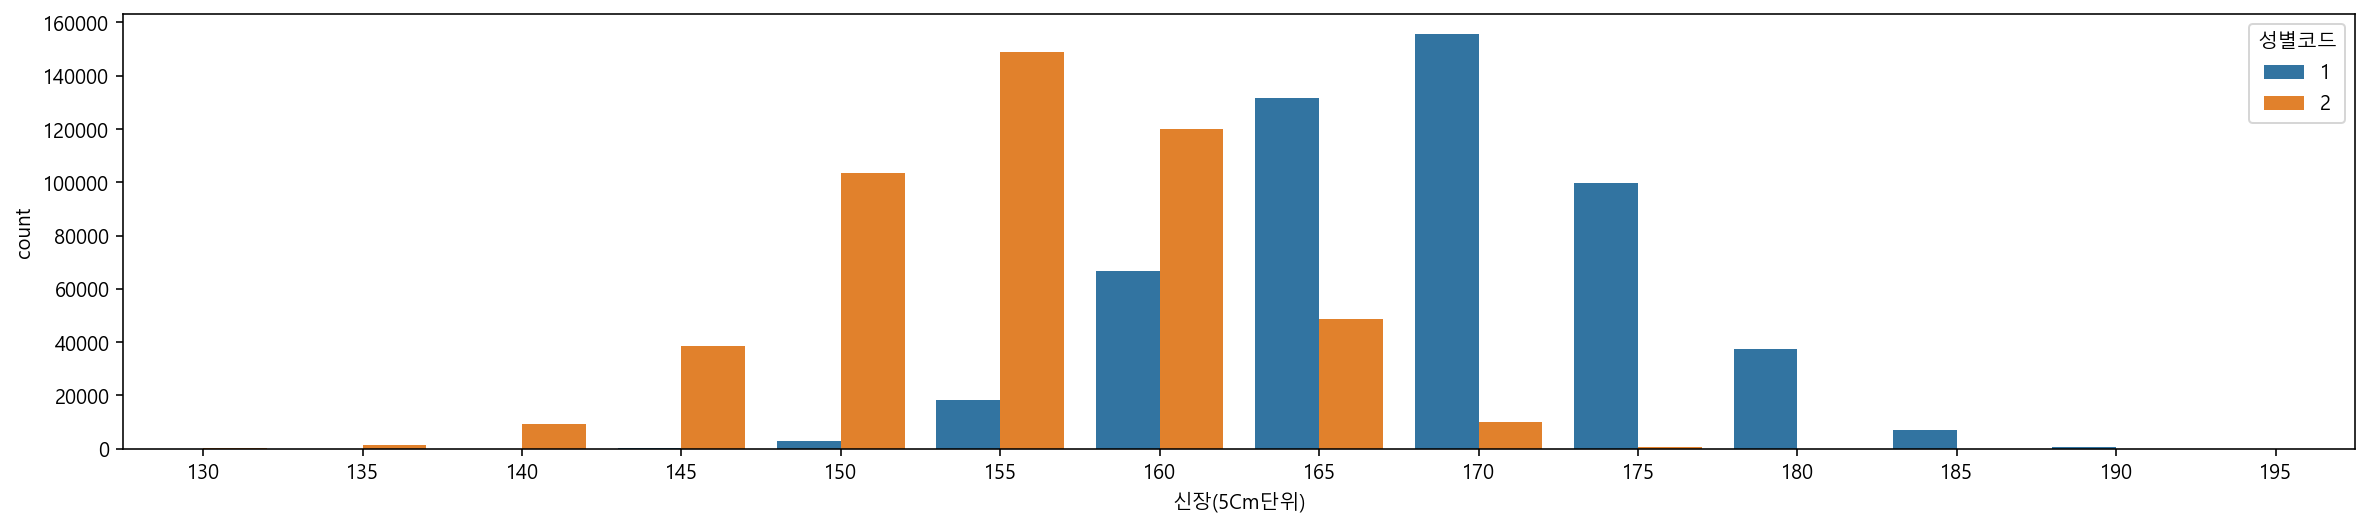

In [345]:
# 성별에 따른 키의 차이를 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

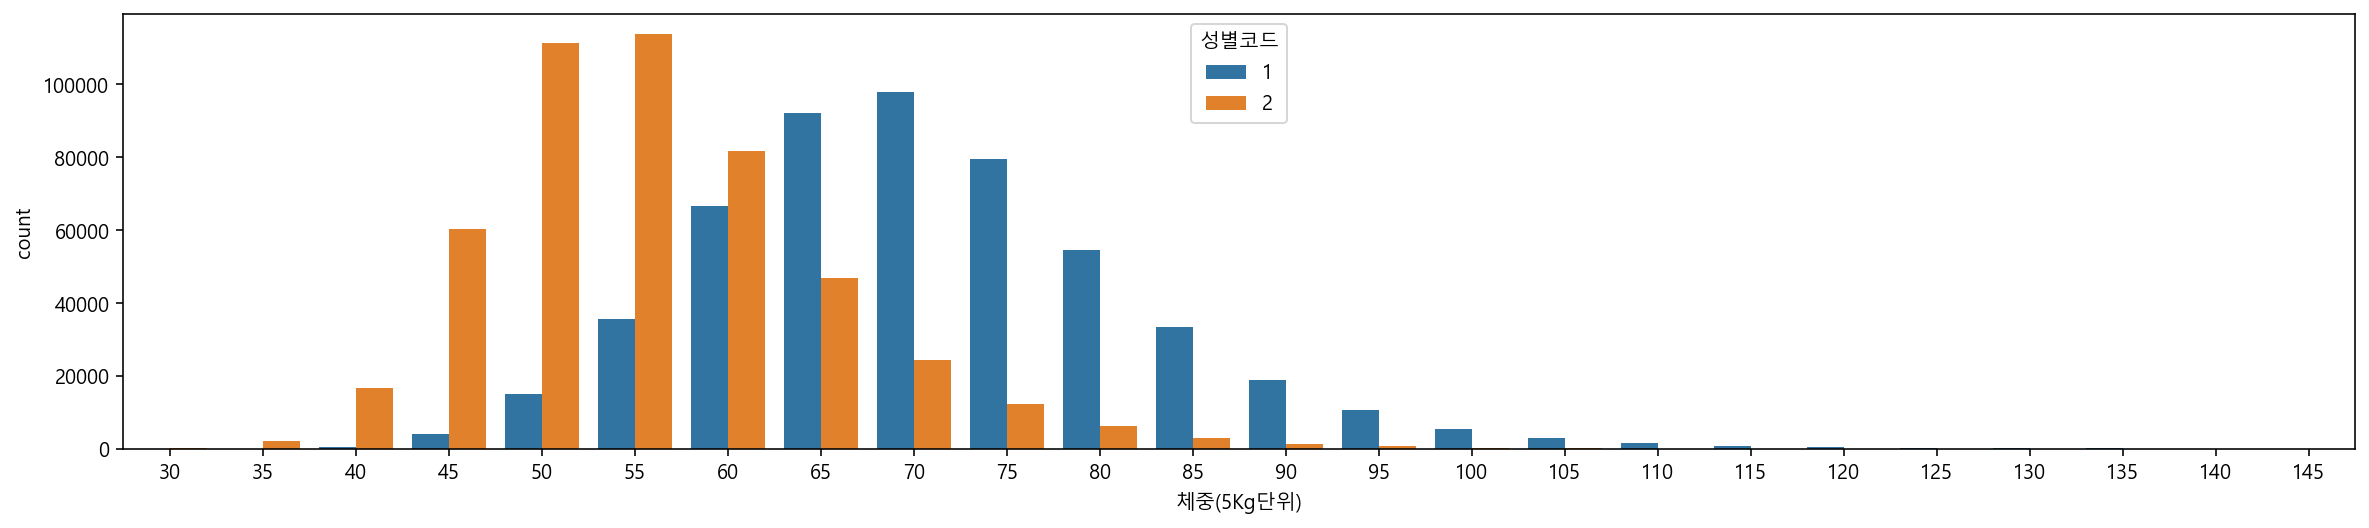

In [346]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

### barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

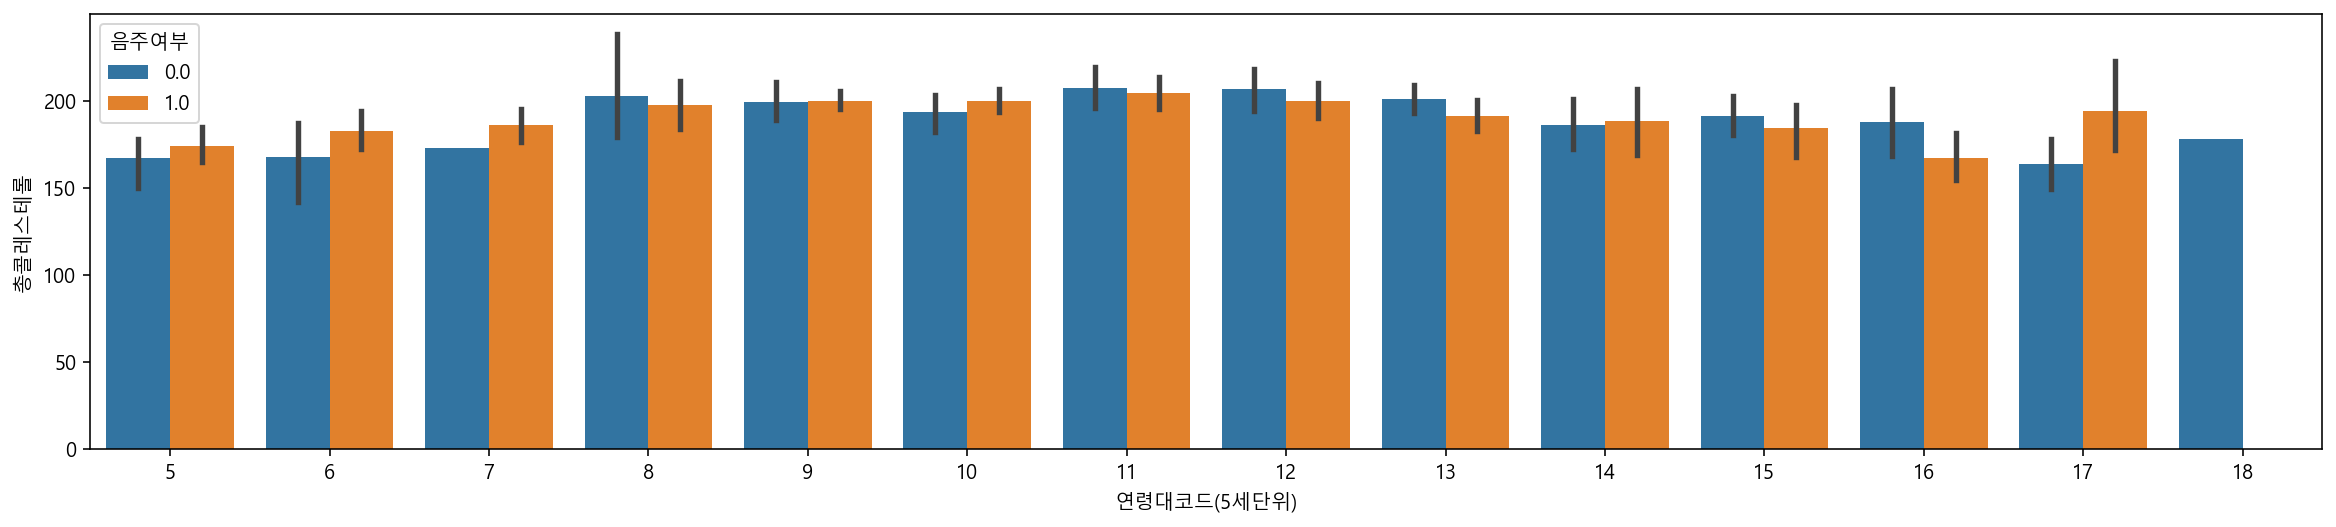

In [347]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="총콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

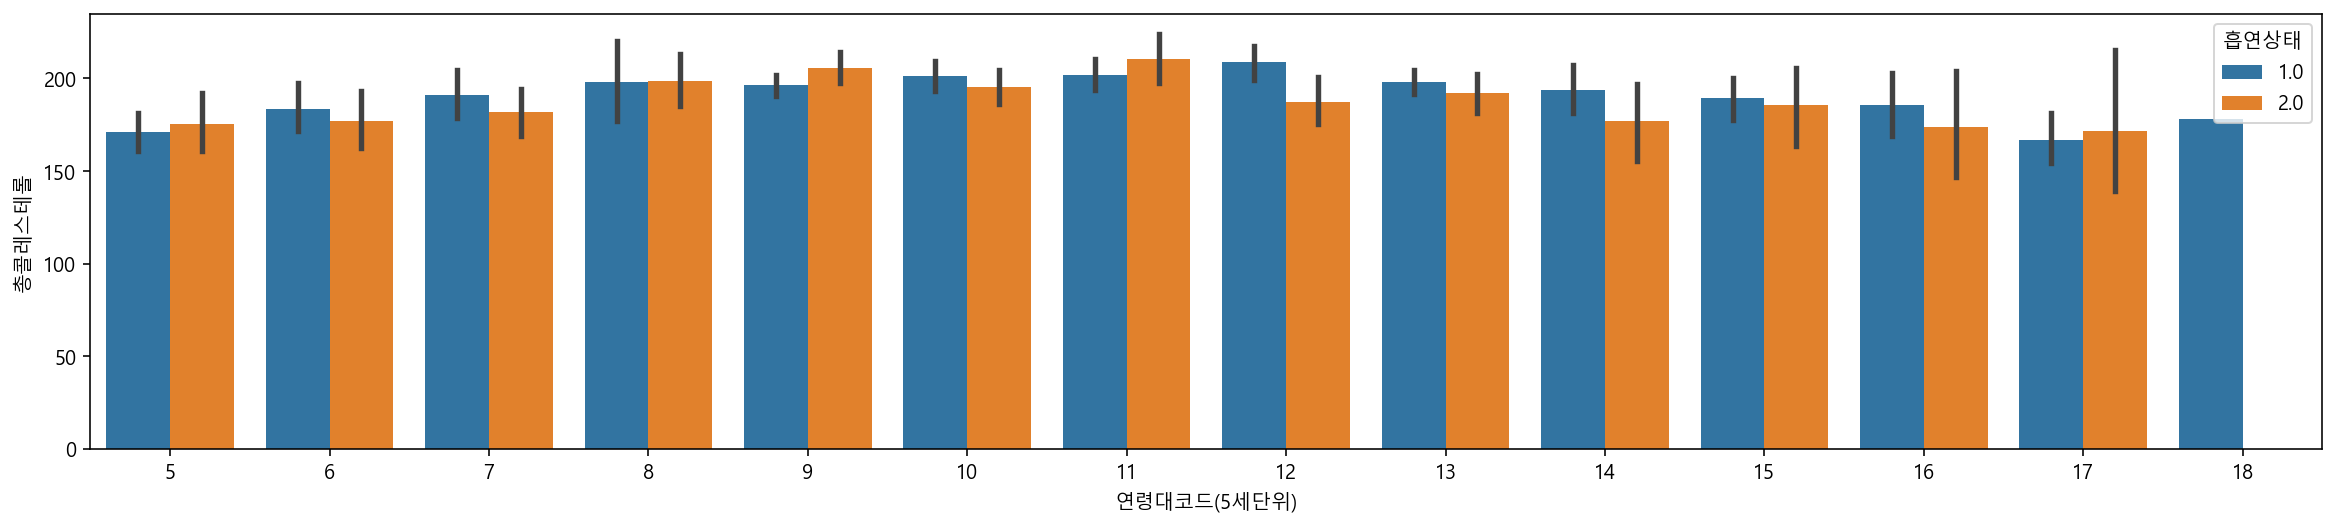

In [348]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 흡연상태를 함께 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

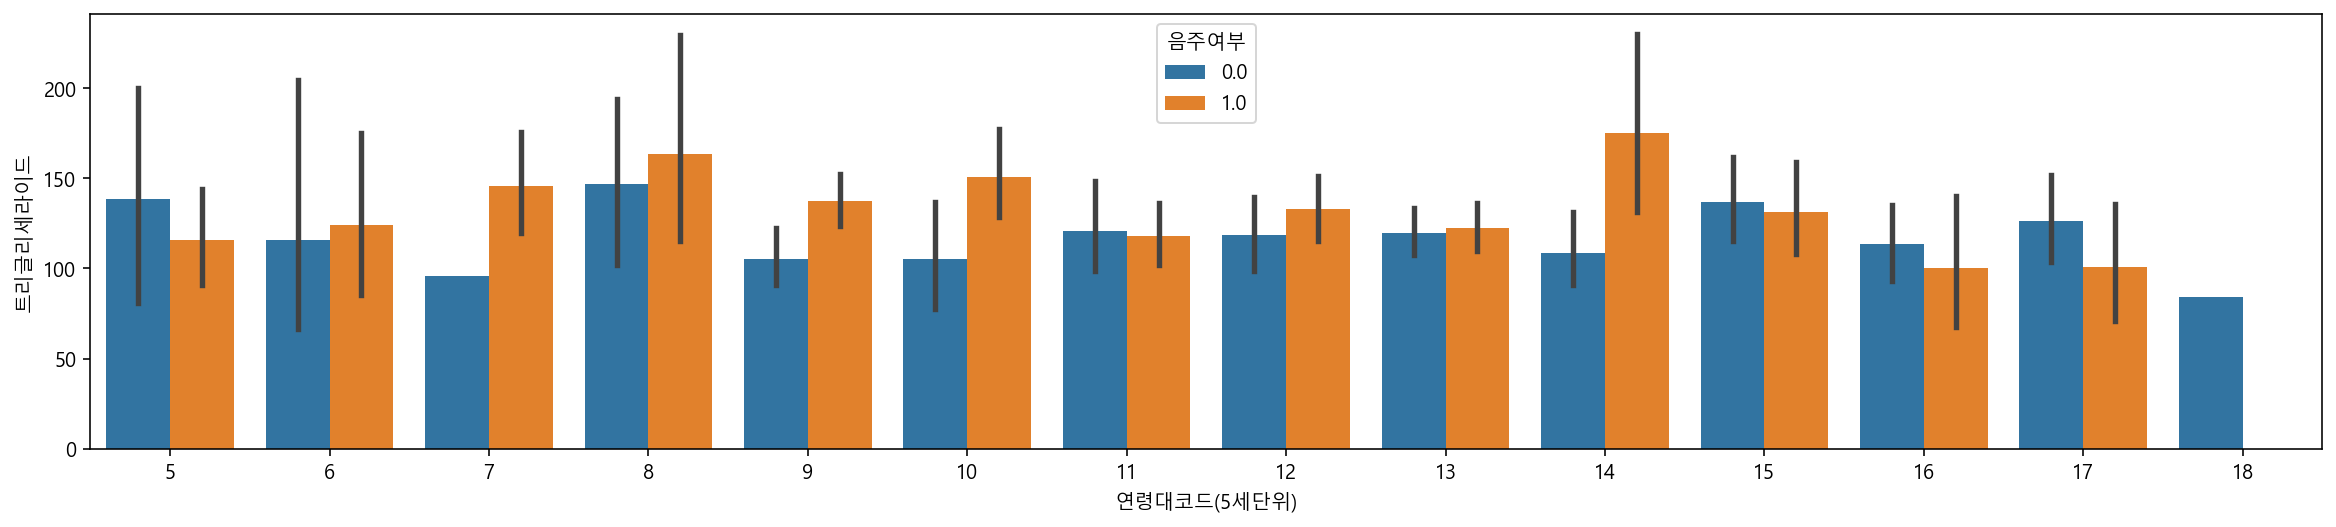

In [349]:
# 트리글리세라이드(중성지방)을 연령대별로 음주여부에 따라 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="트리글리세라이드", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

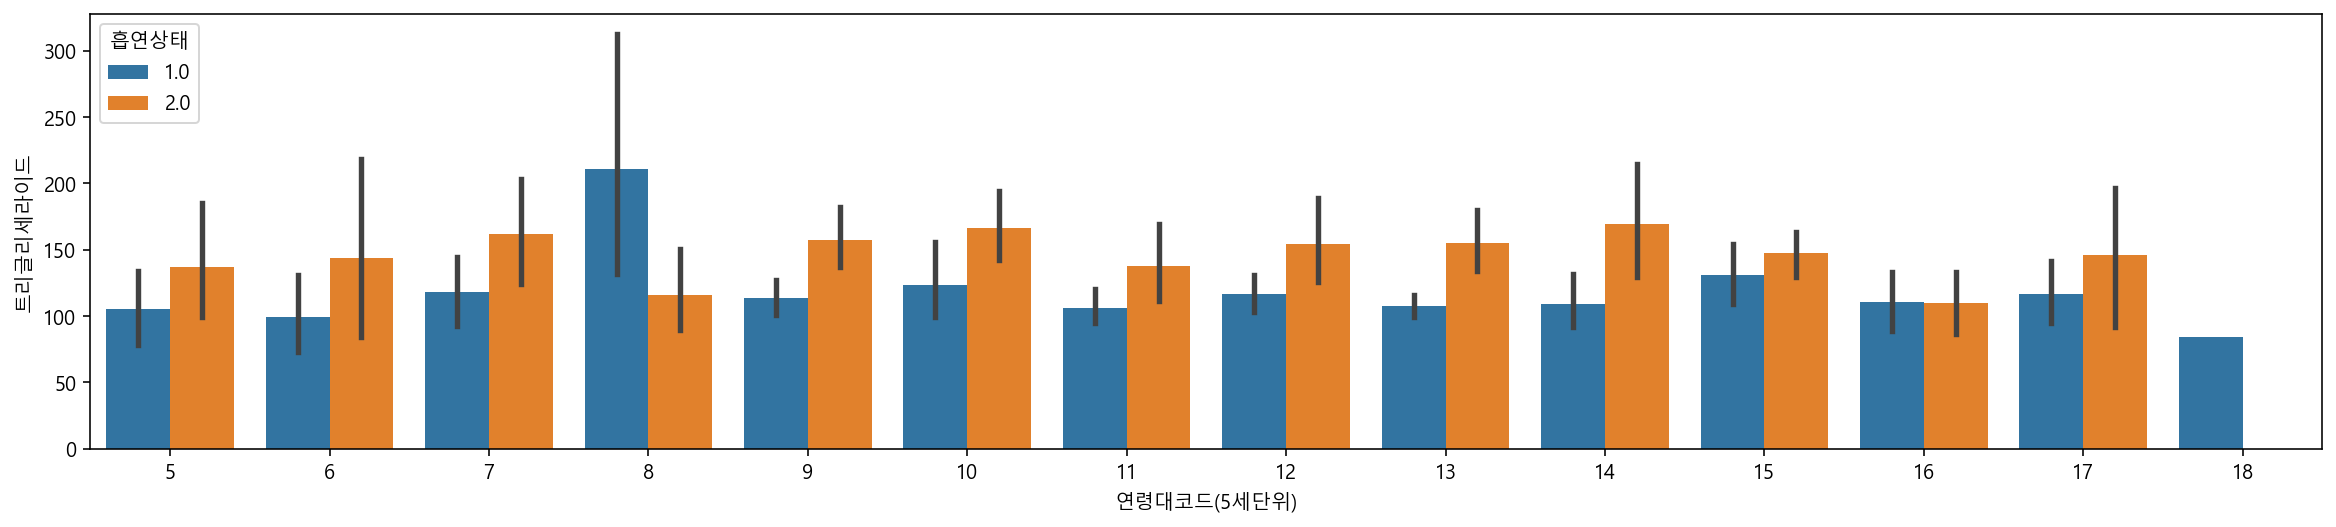

In [350]:
# 트리글리세라이드(중성지방)을 연령대와 흡연상태로 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="트리글리세라이드", hue="흡연상태")

<AxesSubplot:xlabel='음주여부', ylabel='체중(5Kg단위)'>

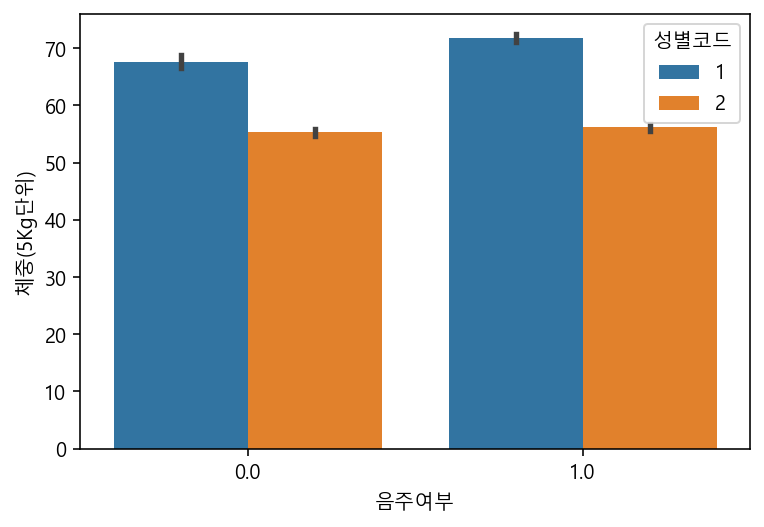

In [351]:
# 음주여부와 성별에 따른 체중을 봅니다.
sns.barplot(data=df_sample, x="음주여부", y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

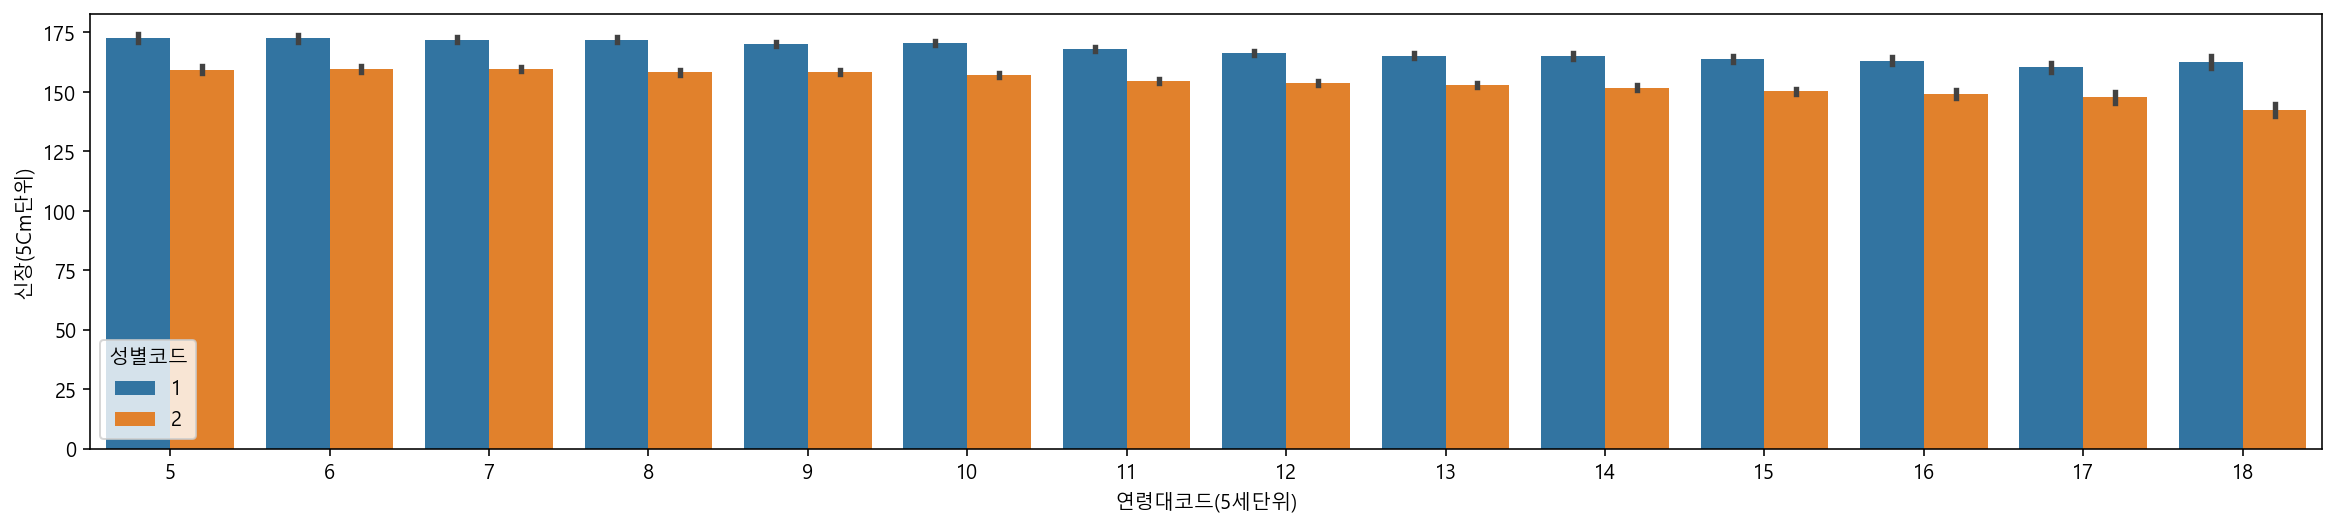

In [352]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", 
            y="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

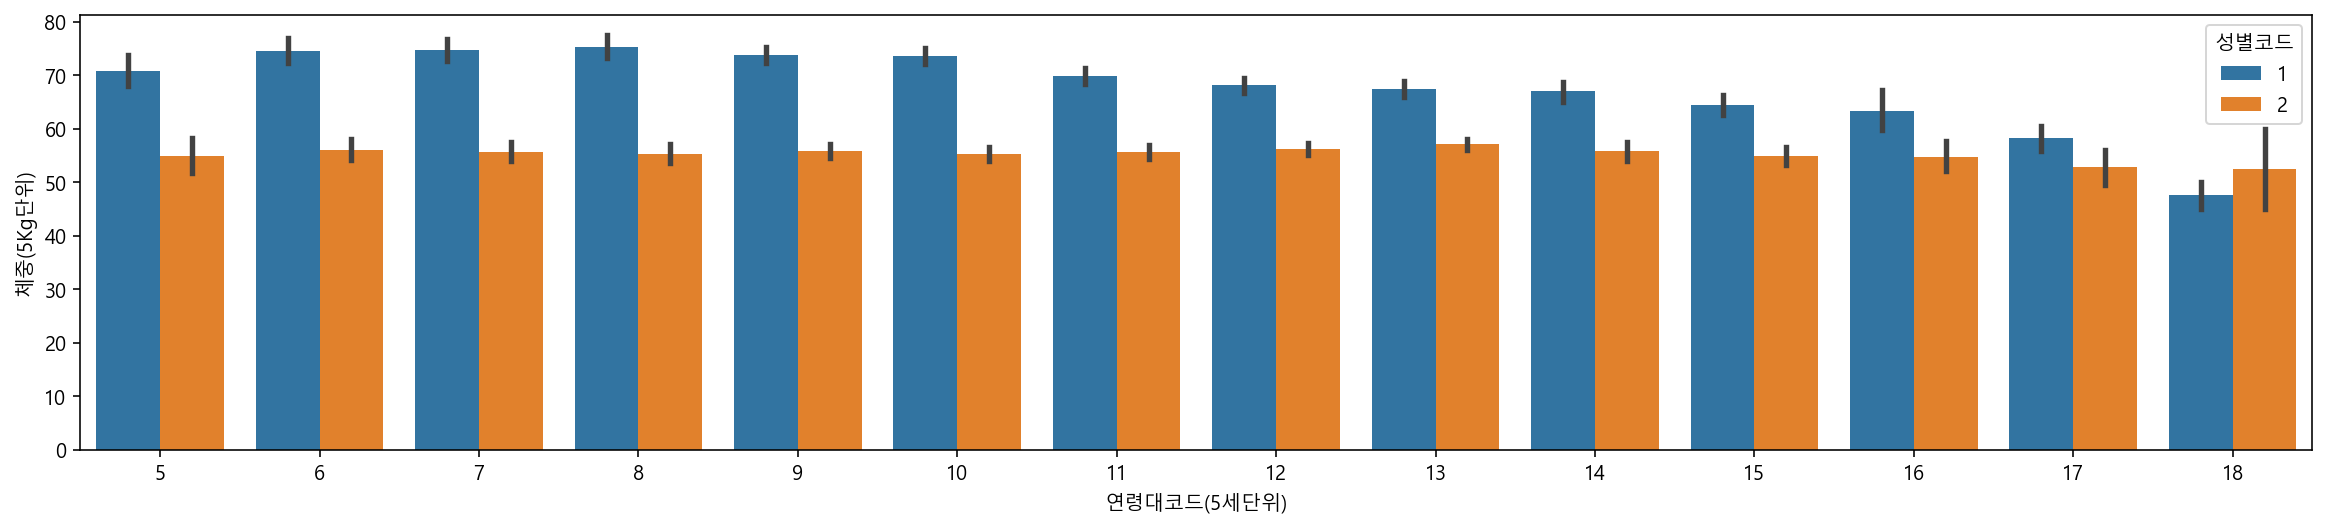

In [353]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", 
            y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

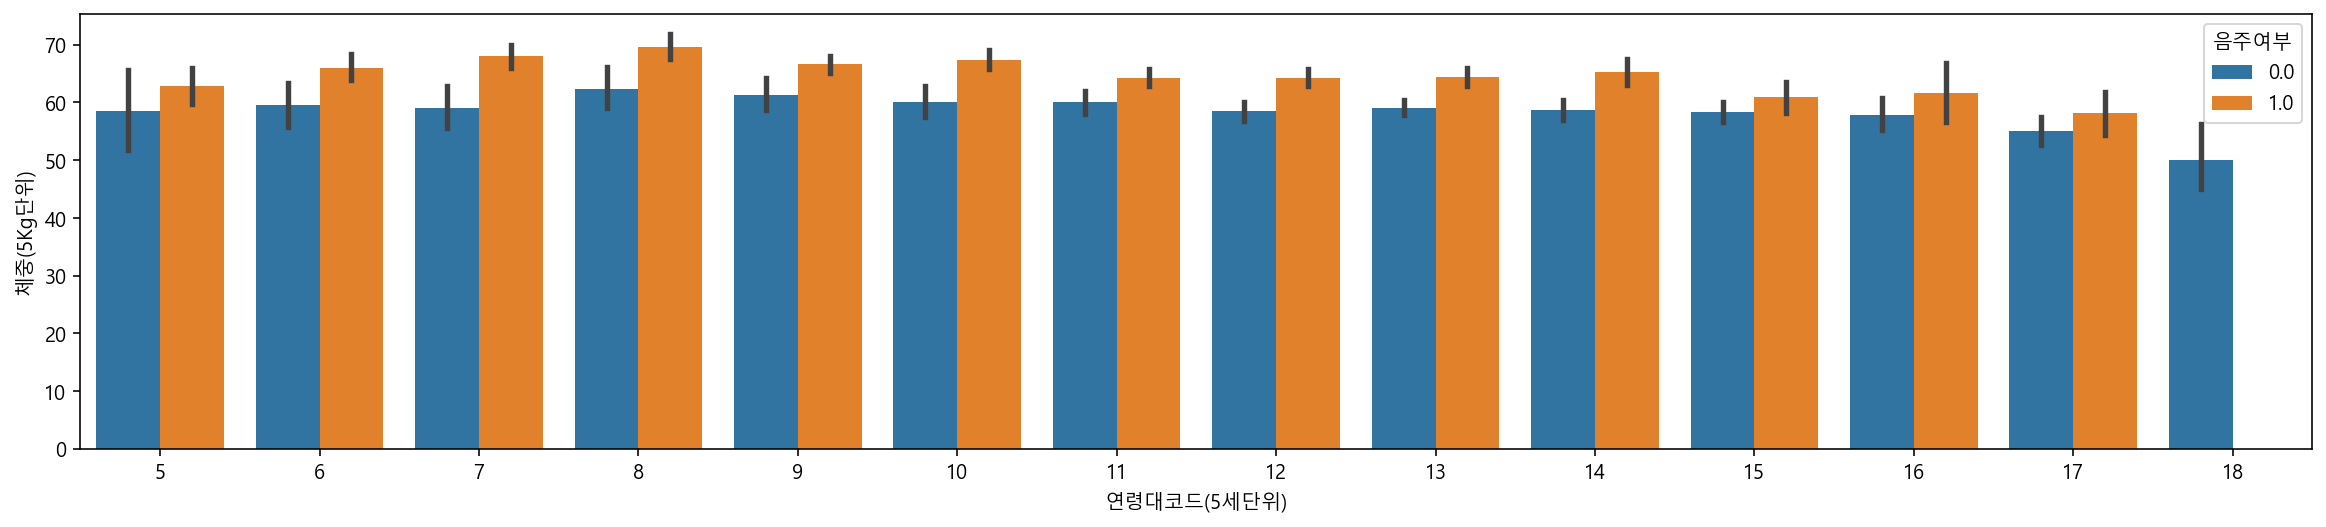

In [354]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

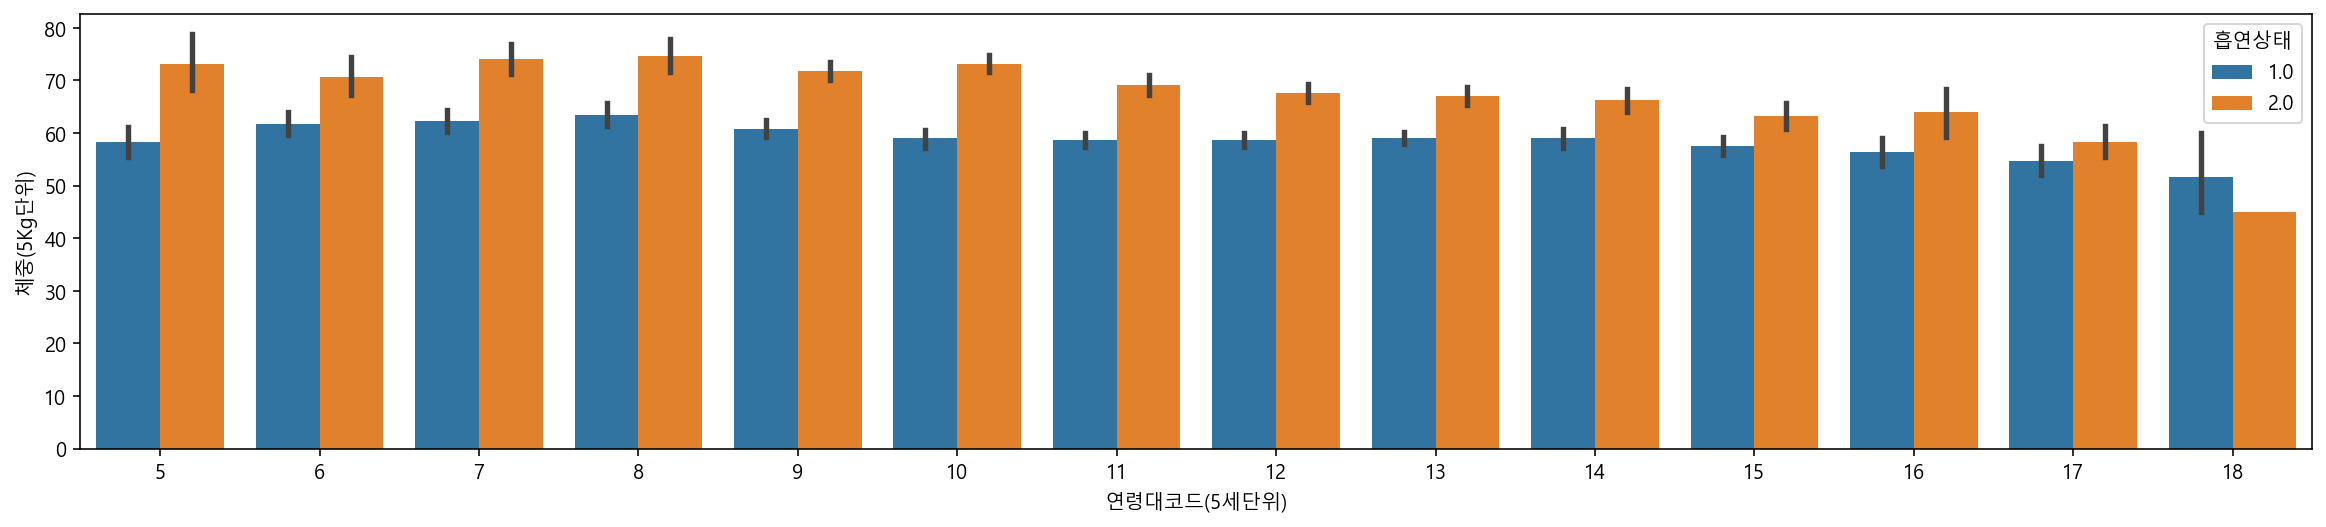

In [355]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="흡연상태")

### lineplot and pointplot

In [356]:
df_sample['성별코드'].value_counts()

1    1529
2    1471
Name: 성별코드, dtype: int64

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

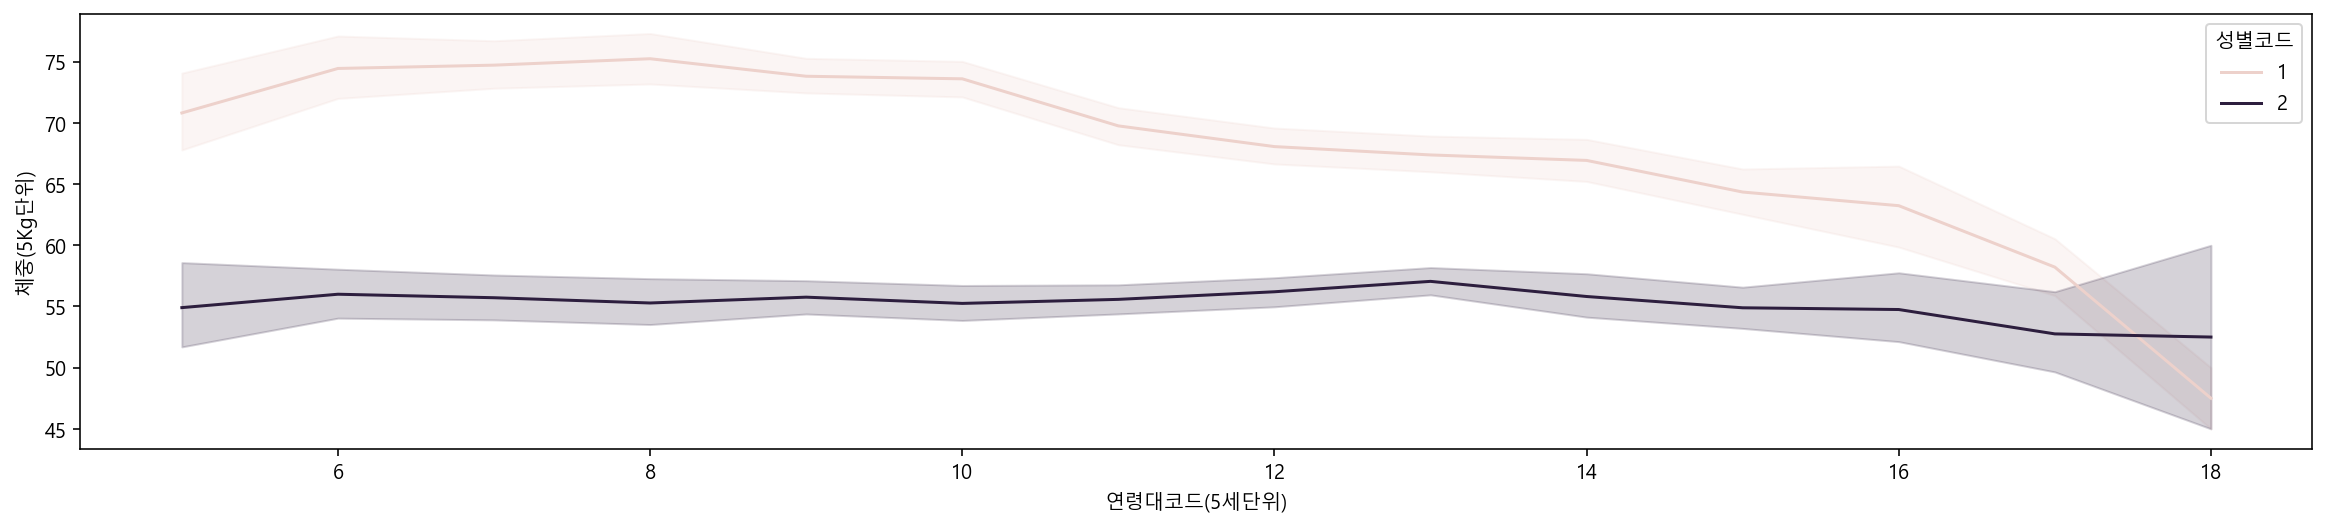

In [357]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

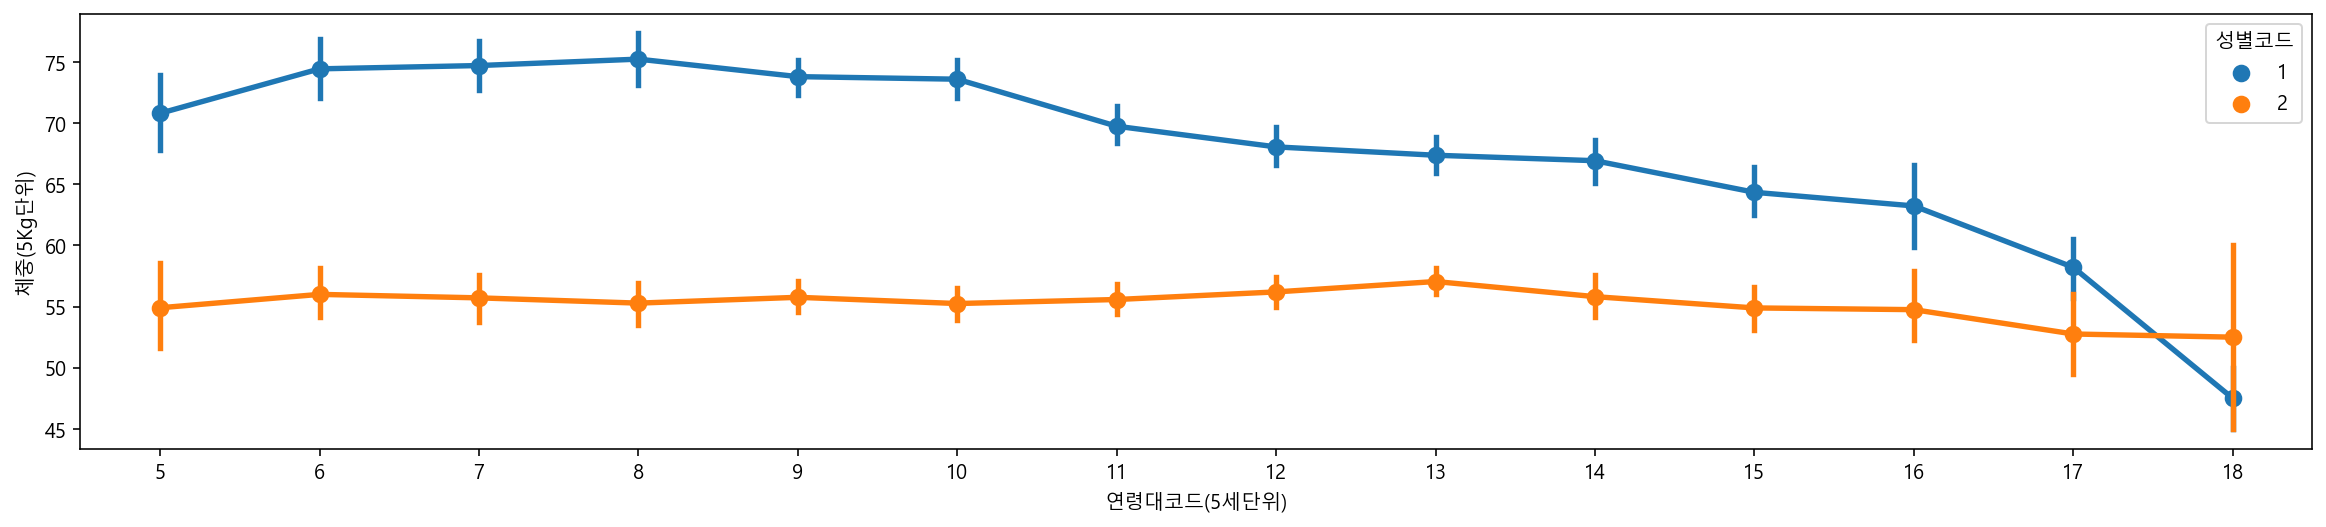

In [358]:
plt.figure(figsize=(20, 4))
sns.pointplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

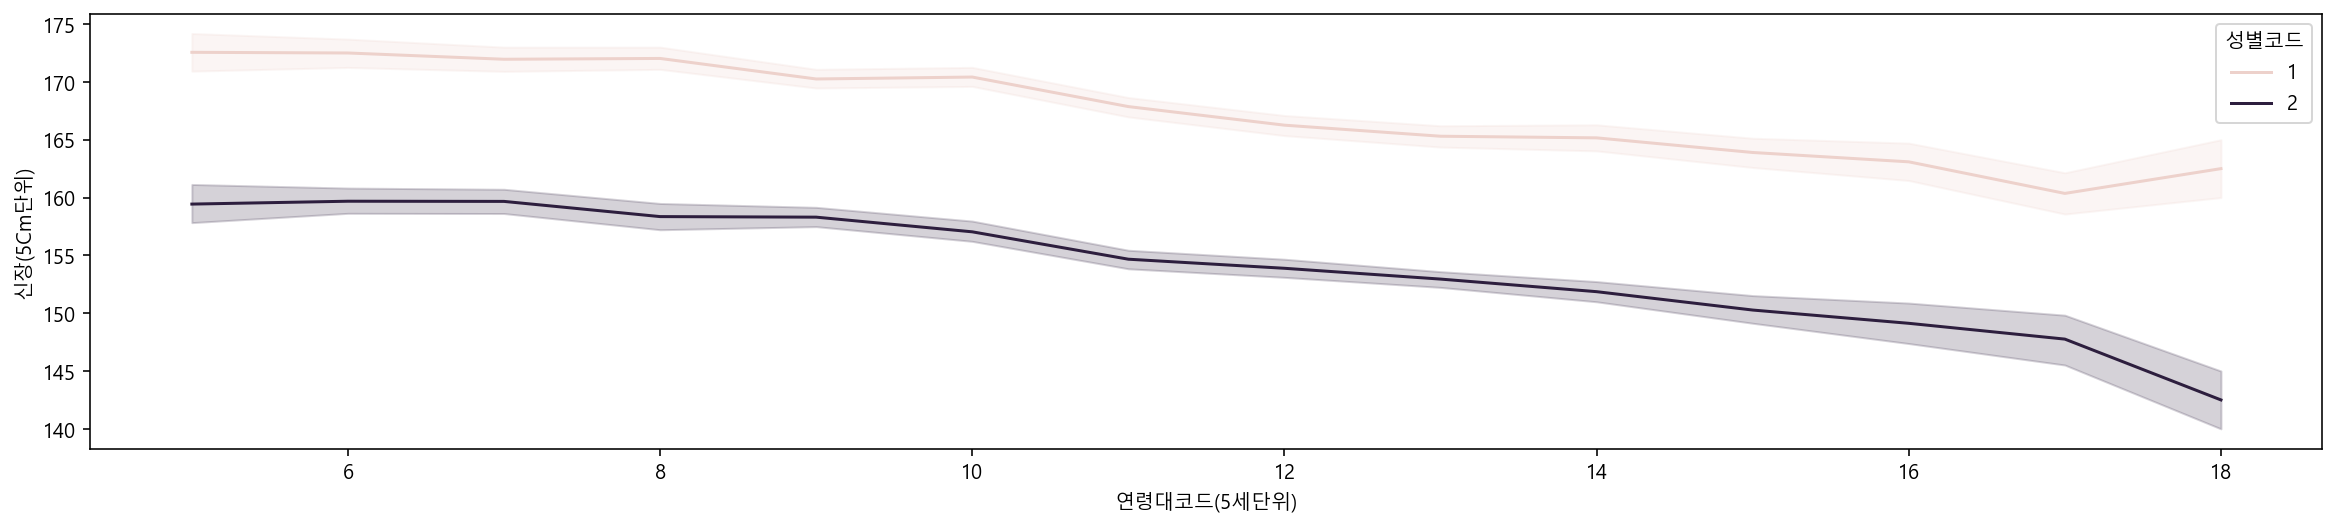

In [359]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

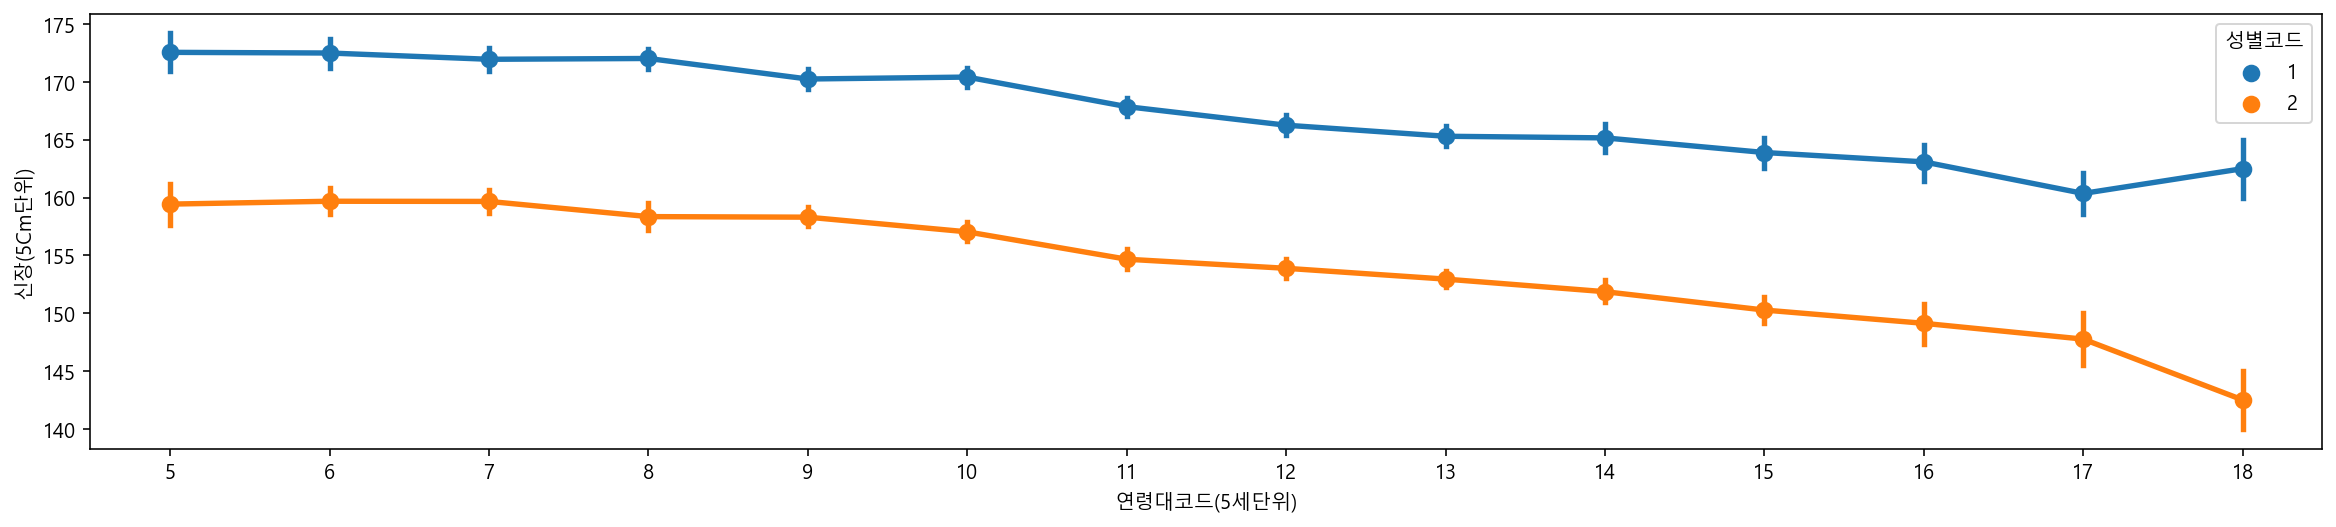

In [360]:
plt.figure(figsize=(20, 4))
sns.pointplot(data=df_sample, 
            x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='시력(좌)'>

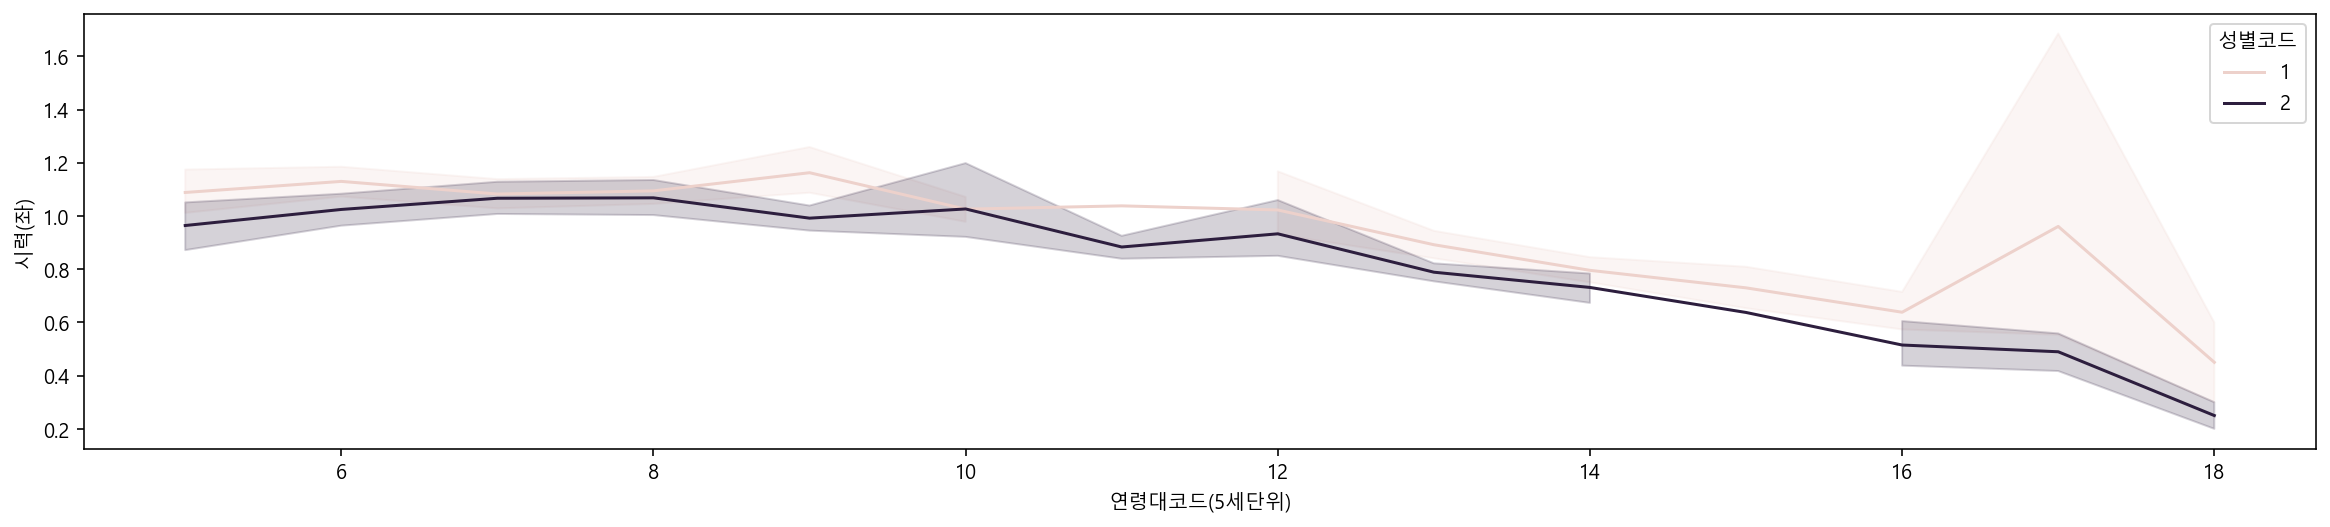

In [361]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="시력(좌)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

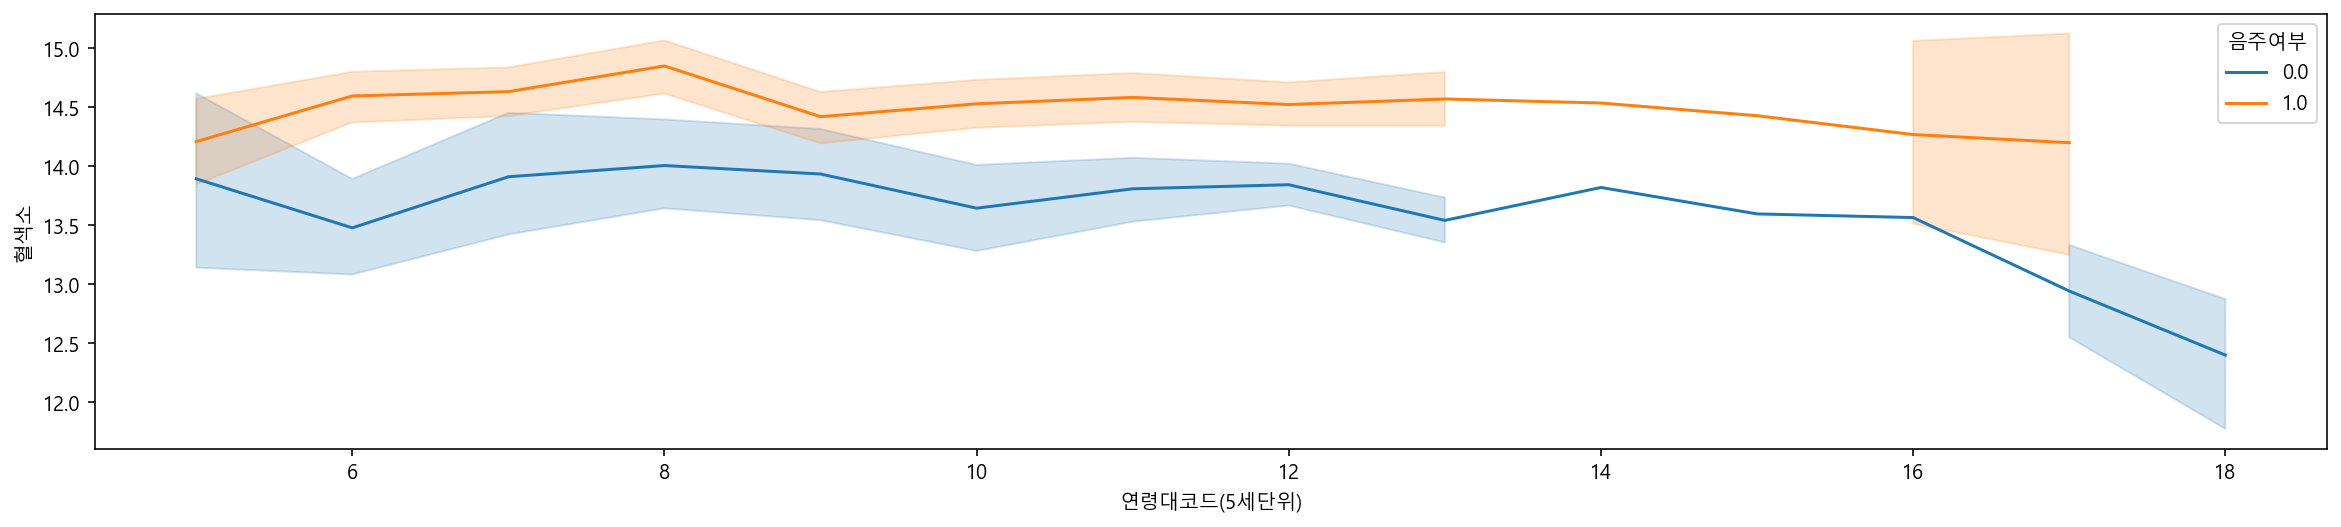

In [362]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

In [363]:
df_sample["흡연상태"].value_counts()

1.0    1910
2.0    1090
Name: 흡연상태, dtype: int64

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

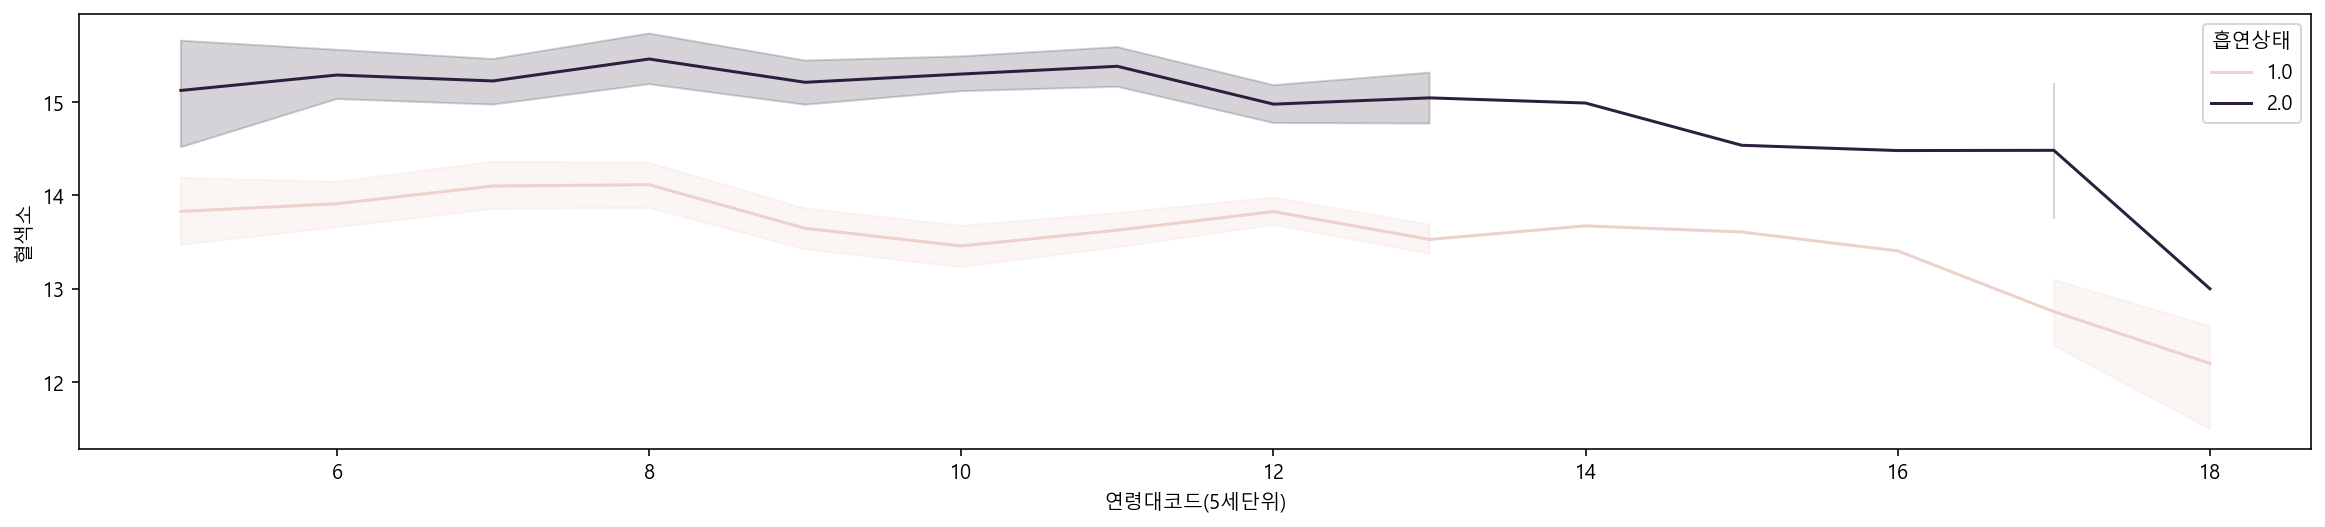

In [364]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="혈색소", hue="흡연상태")

### boxplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

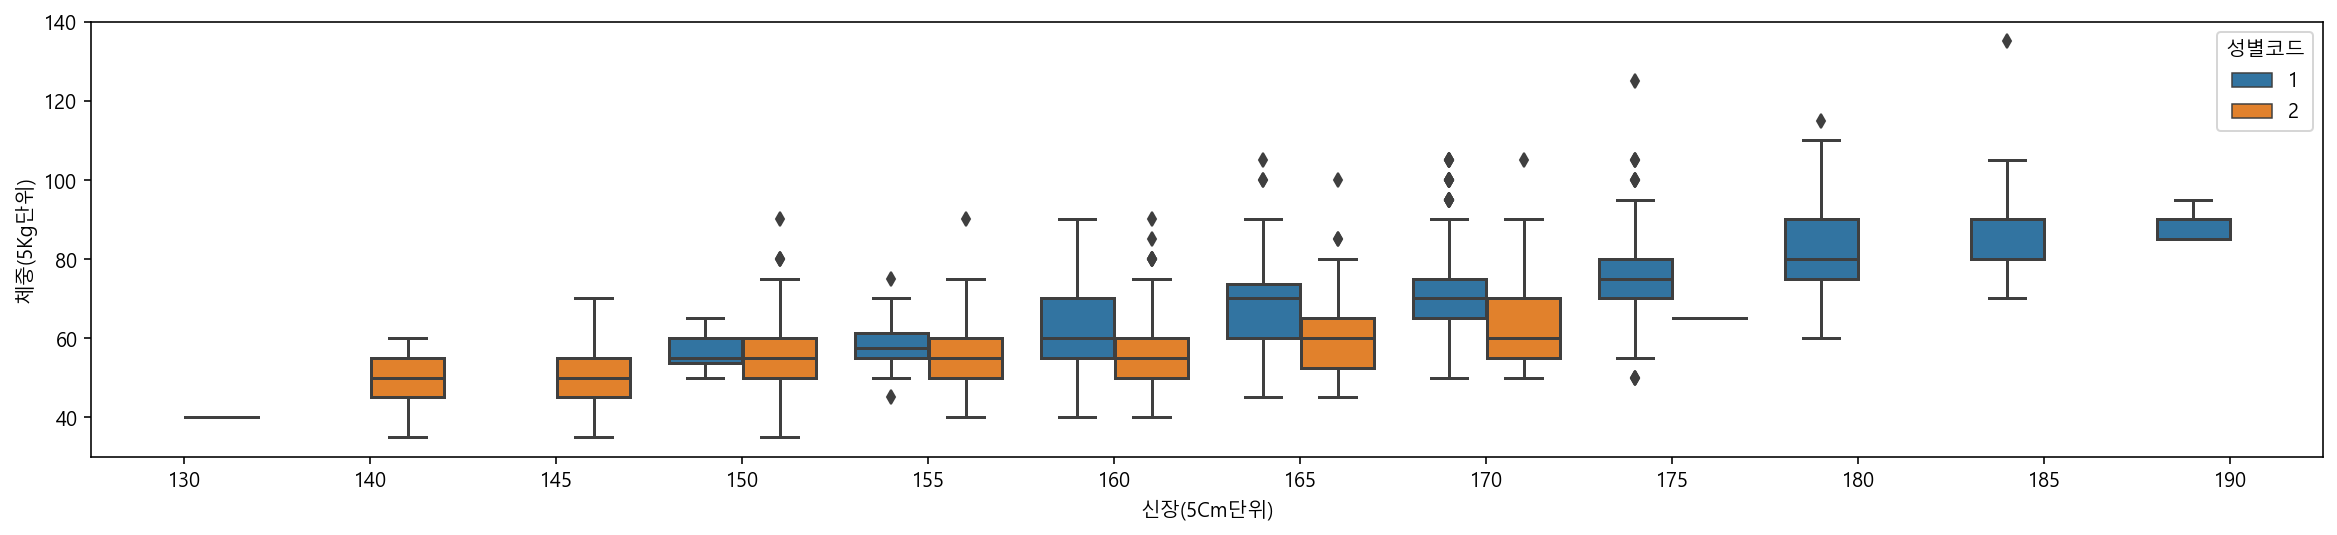

In [365]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg단위)", hue="성별코드")

### violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

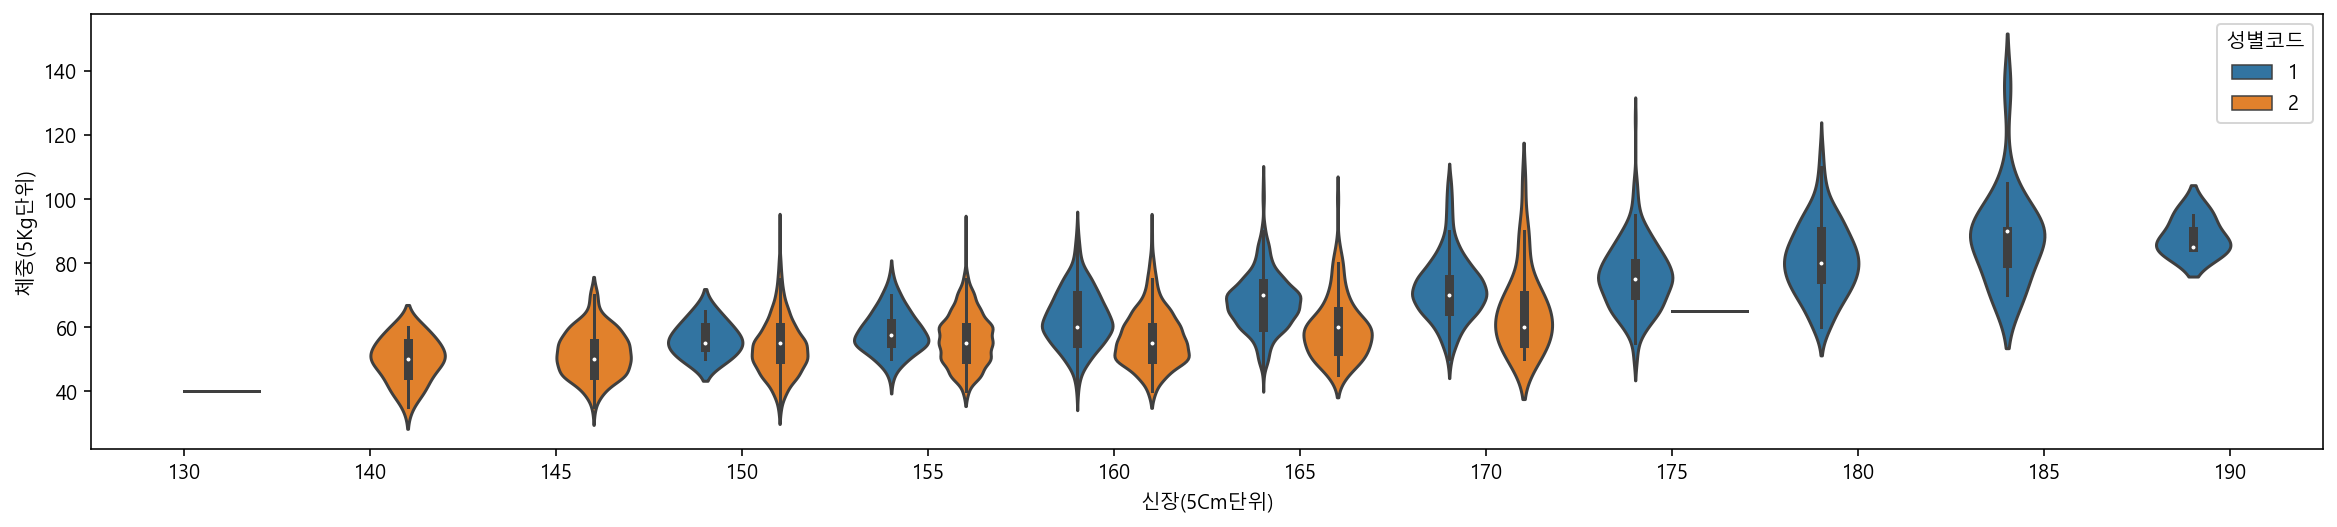

In [366]:
plt.figure(figsize=(20, 4))
sns.violinplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

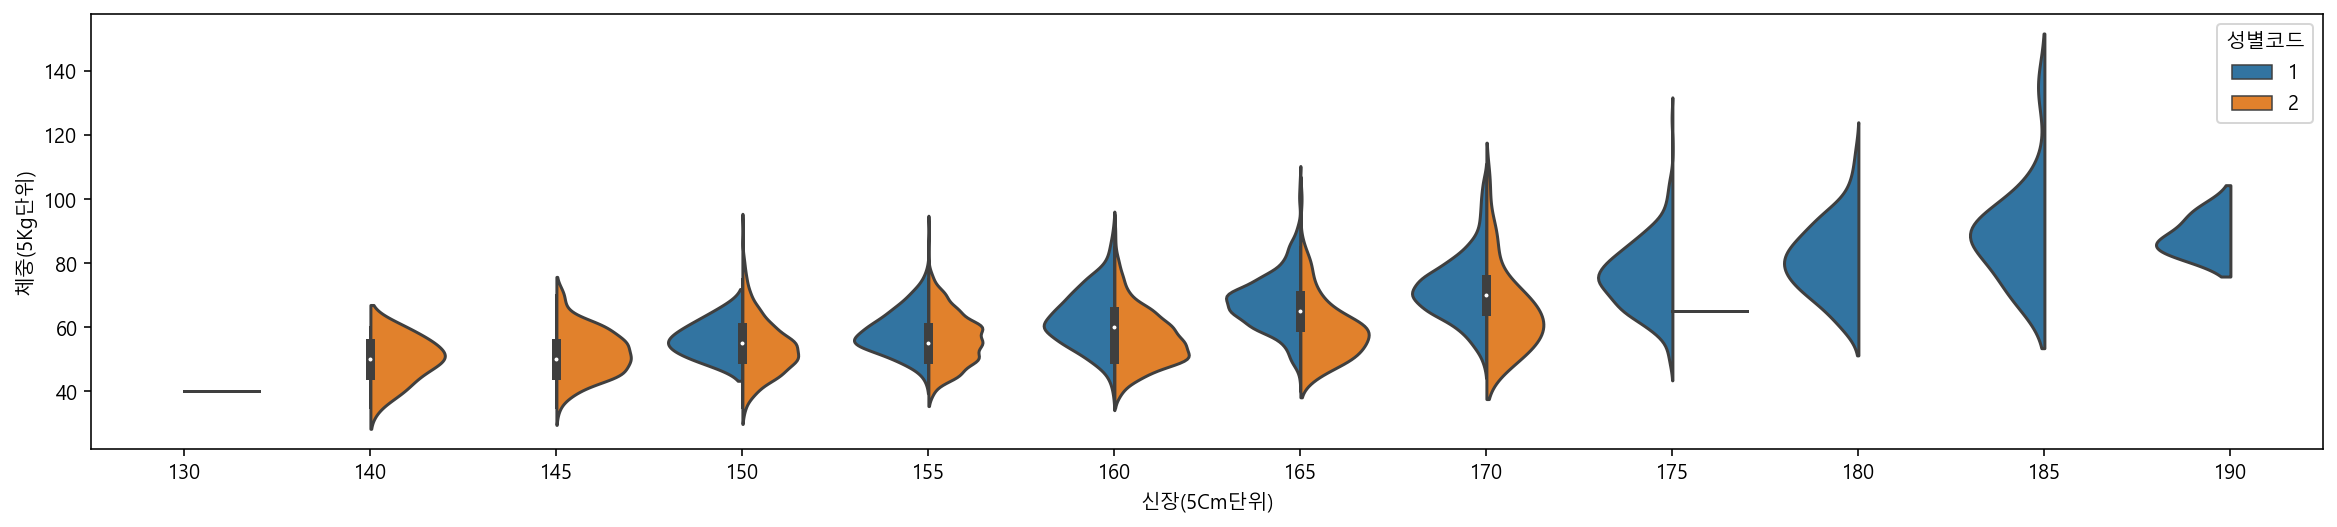

In [367]:
plt.figure(figsize=(20, 4))
sns.violinplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg단위)", hue="성별코드", split=True)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

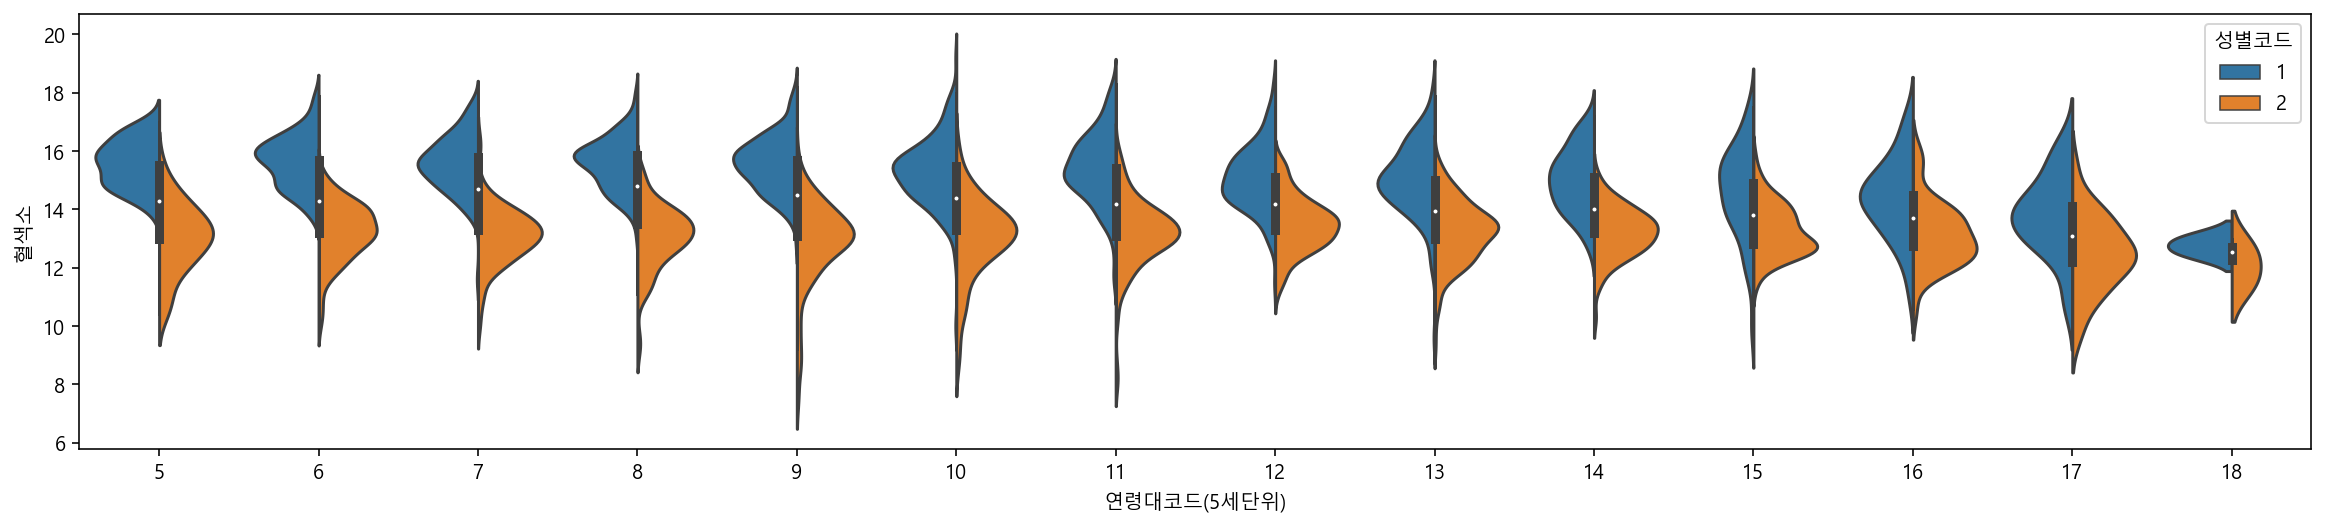

In [368]:
plt.figure(figsize=(20, 4))
sns.violinplot(data=df_sample, 
            x="연령대코드(5세단위)",  y="혈색소", hue="성별코드", split=True)

### swarm plot
* 범주형 데이터의 시각화

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

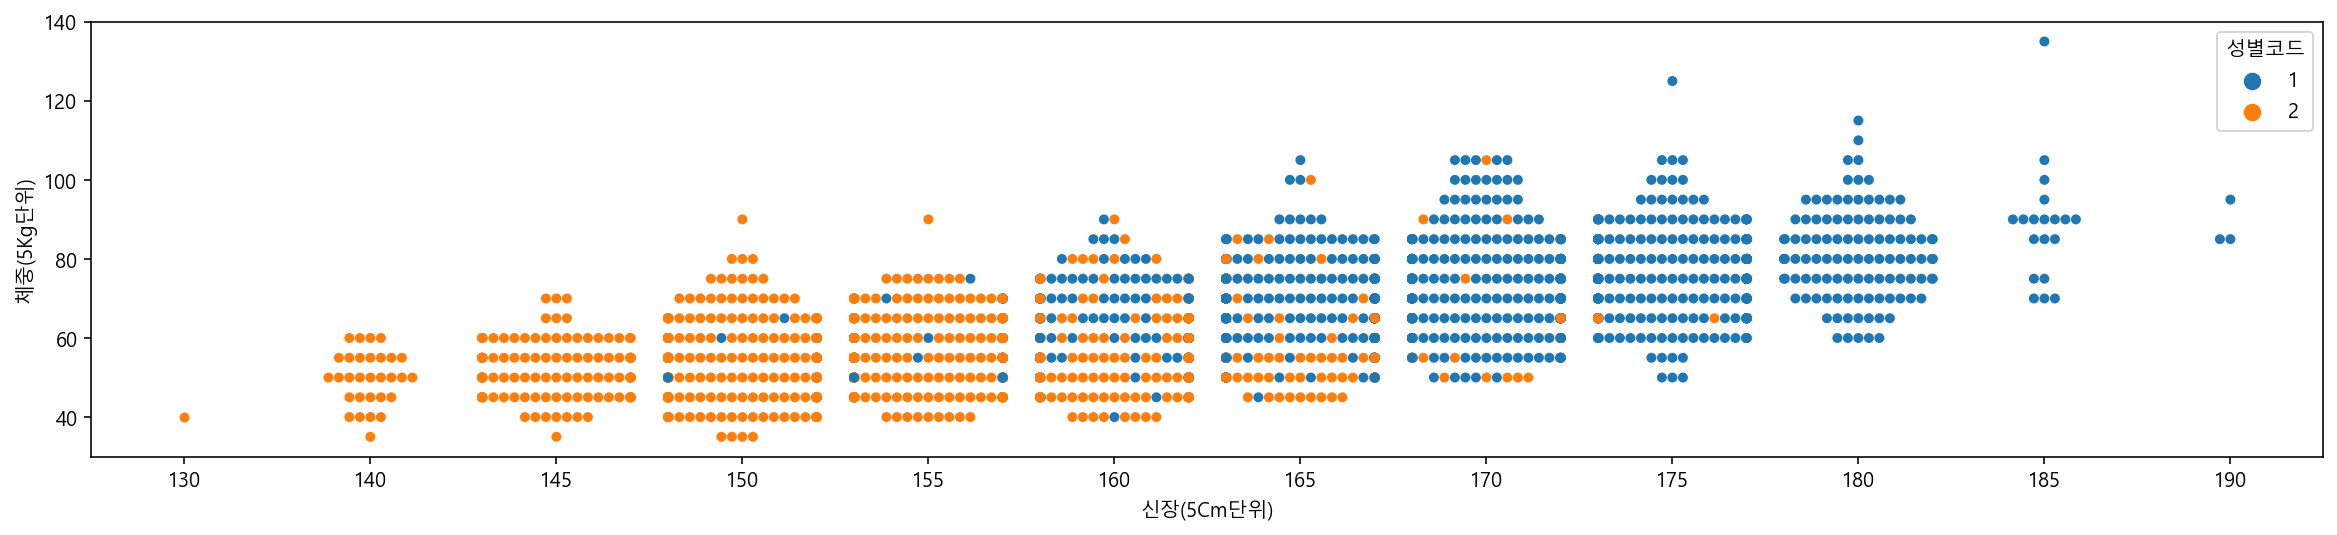

In [369]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

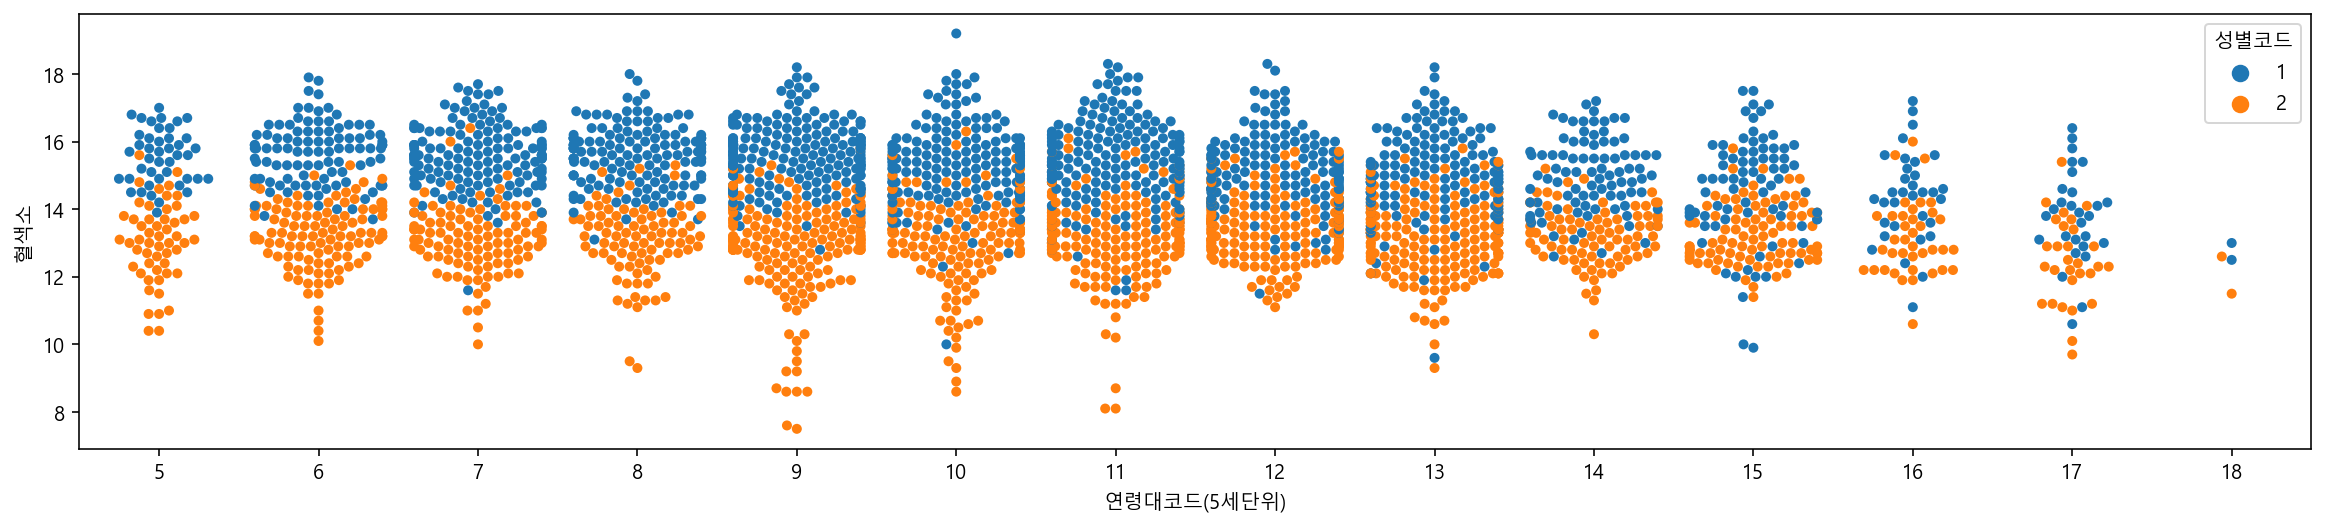

In [370]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_sample, 
            x="연령대코드(5세단위)", y="혈색소", hue="성별코드")

## 수치형 데이터 시각화

### lmplot - 상관 관계를 보기

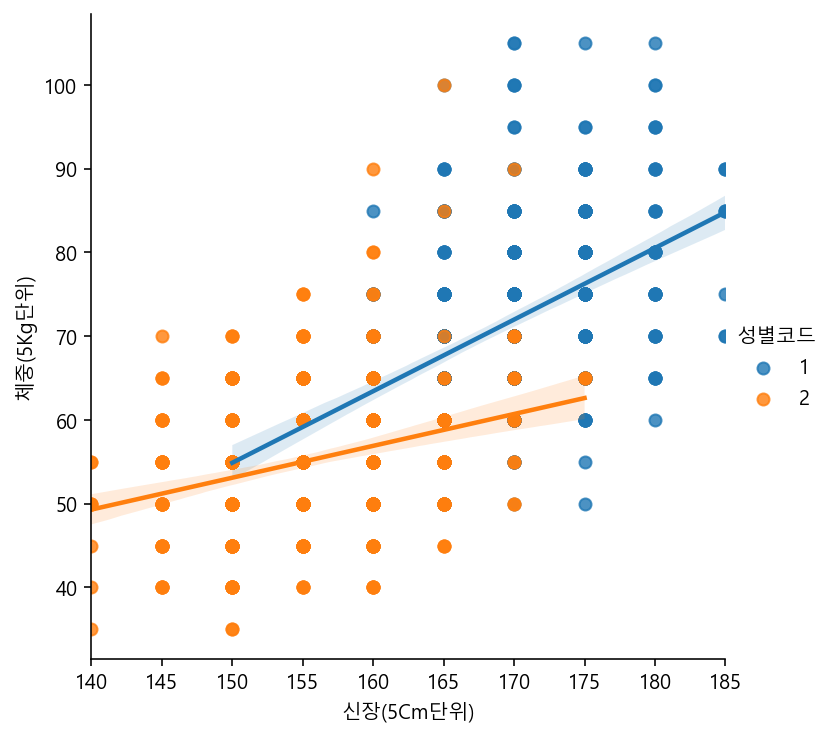

In [371]:
sns.lmplot(
    data=df_sample[:1000], x="신장(5Cm단위)",  y="체중(5Kg단위)", hue="성별코드")

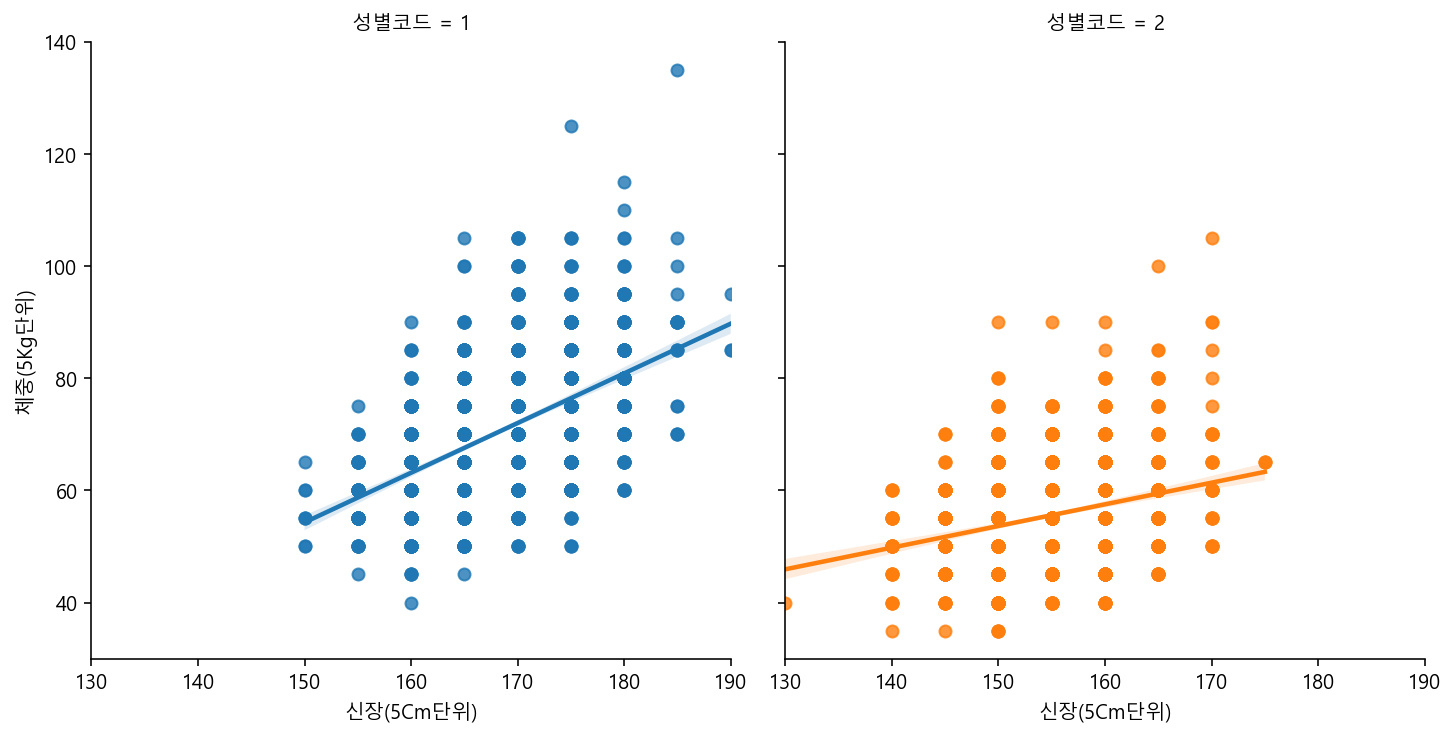

In [372]:
sns.lmplot(
    data=df_sample, x="신장(5Cm단위)",  y="체중(5Kg단위)", hue="성별코드", col="성별코드")

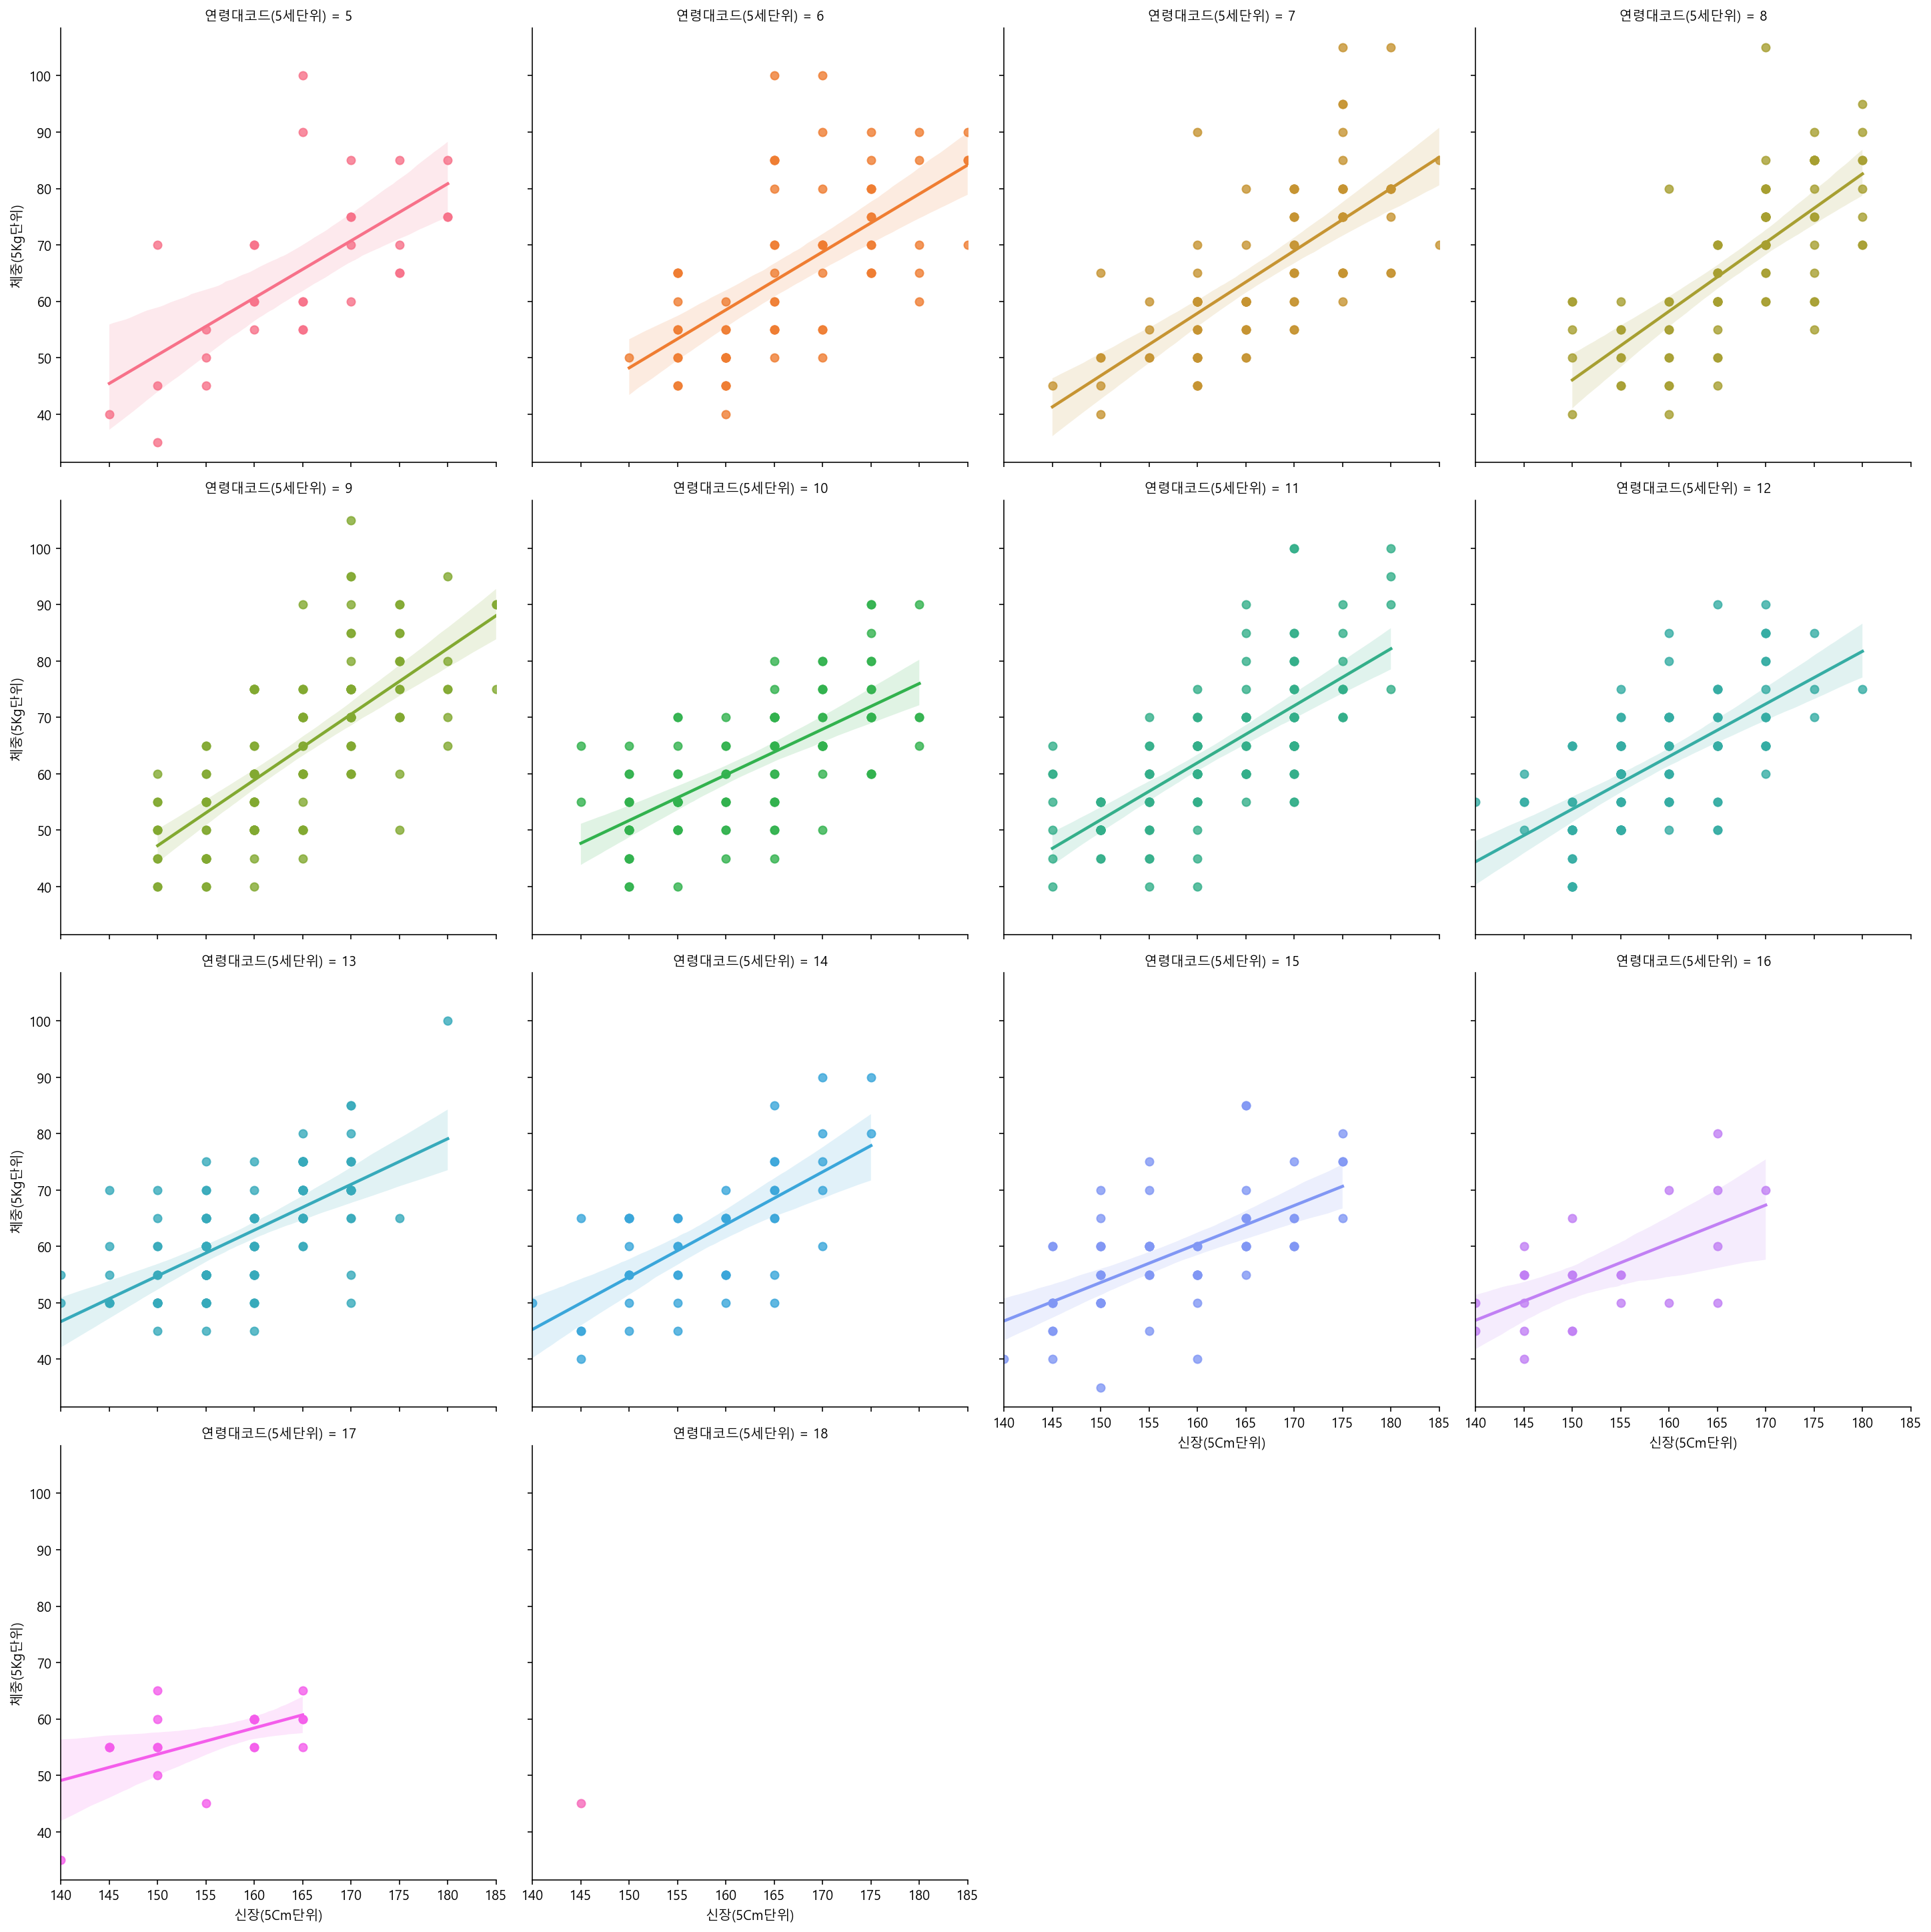

In [373]:
sns.lmplot(
    data=df_sample[:1000], x="신장(5Cm단위)",  y="체중(5Kg단위)", 
    hue="연령대코드(5세단위)", col="연령대코드(5세단위)", col_wrap=4)

In [374]:
df_eye = df_sample[(df_sample["시력(좌)"] < 3) & (df_sample["시력(우)"] < 3)]

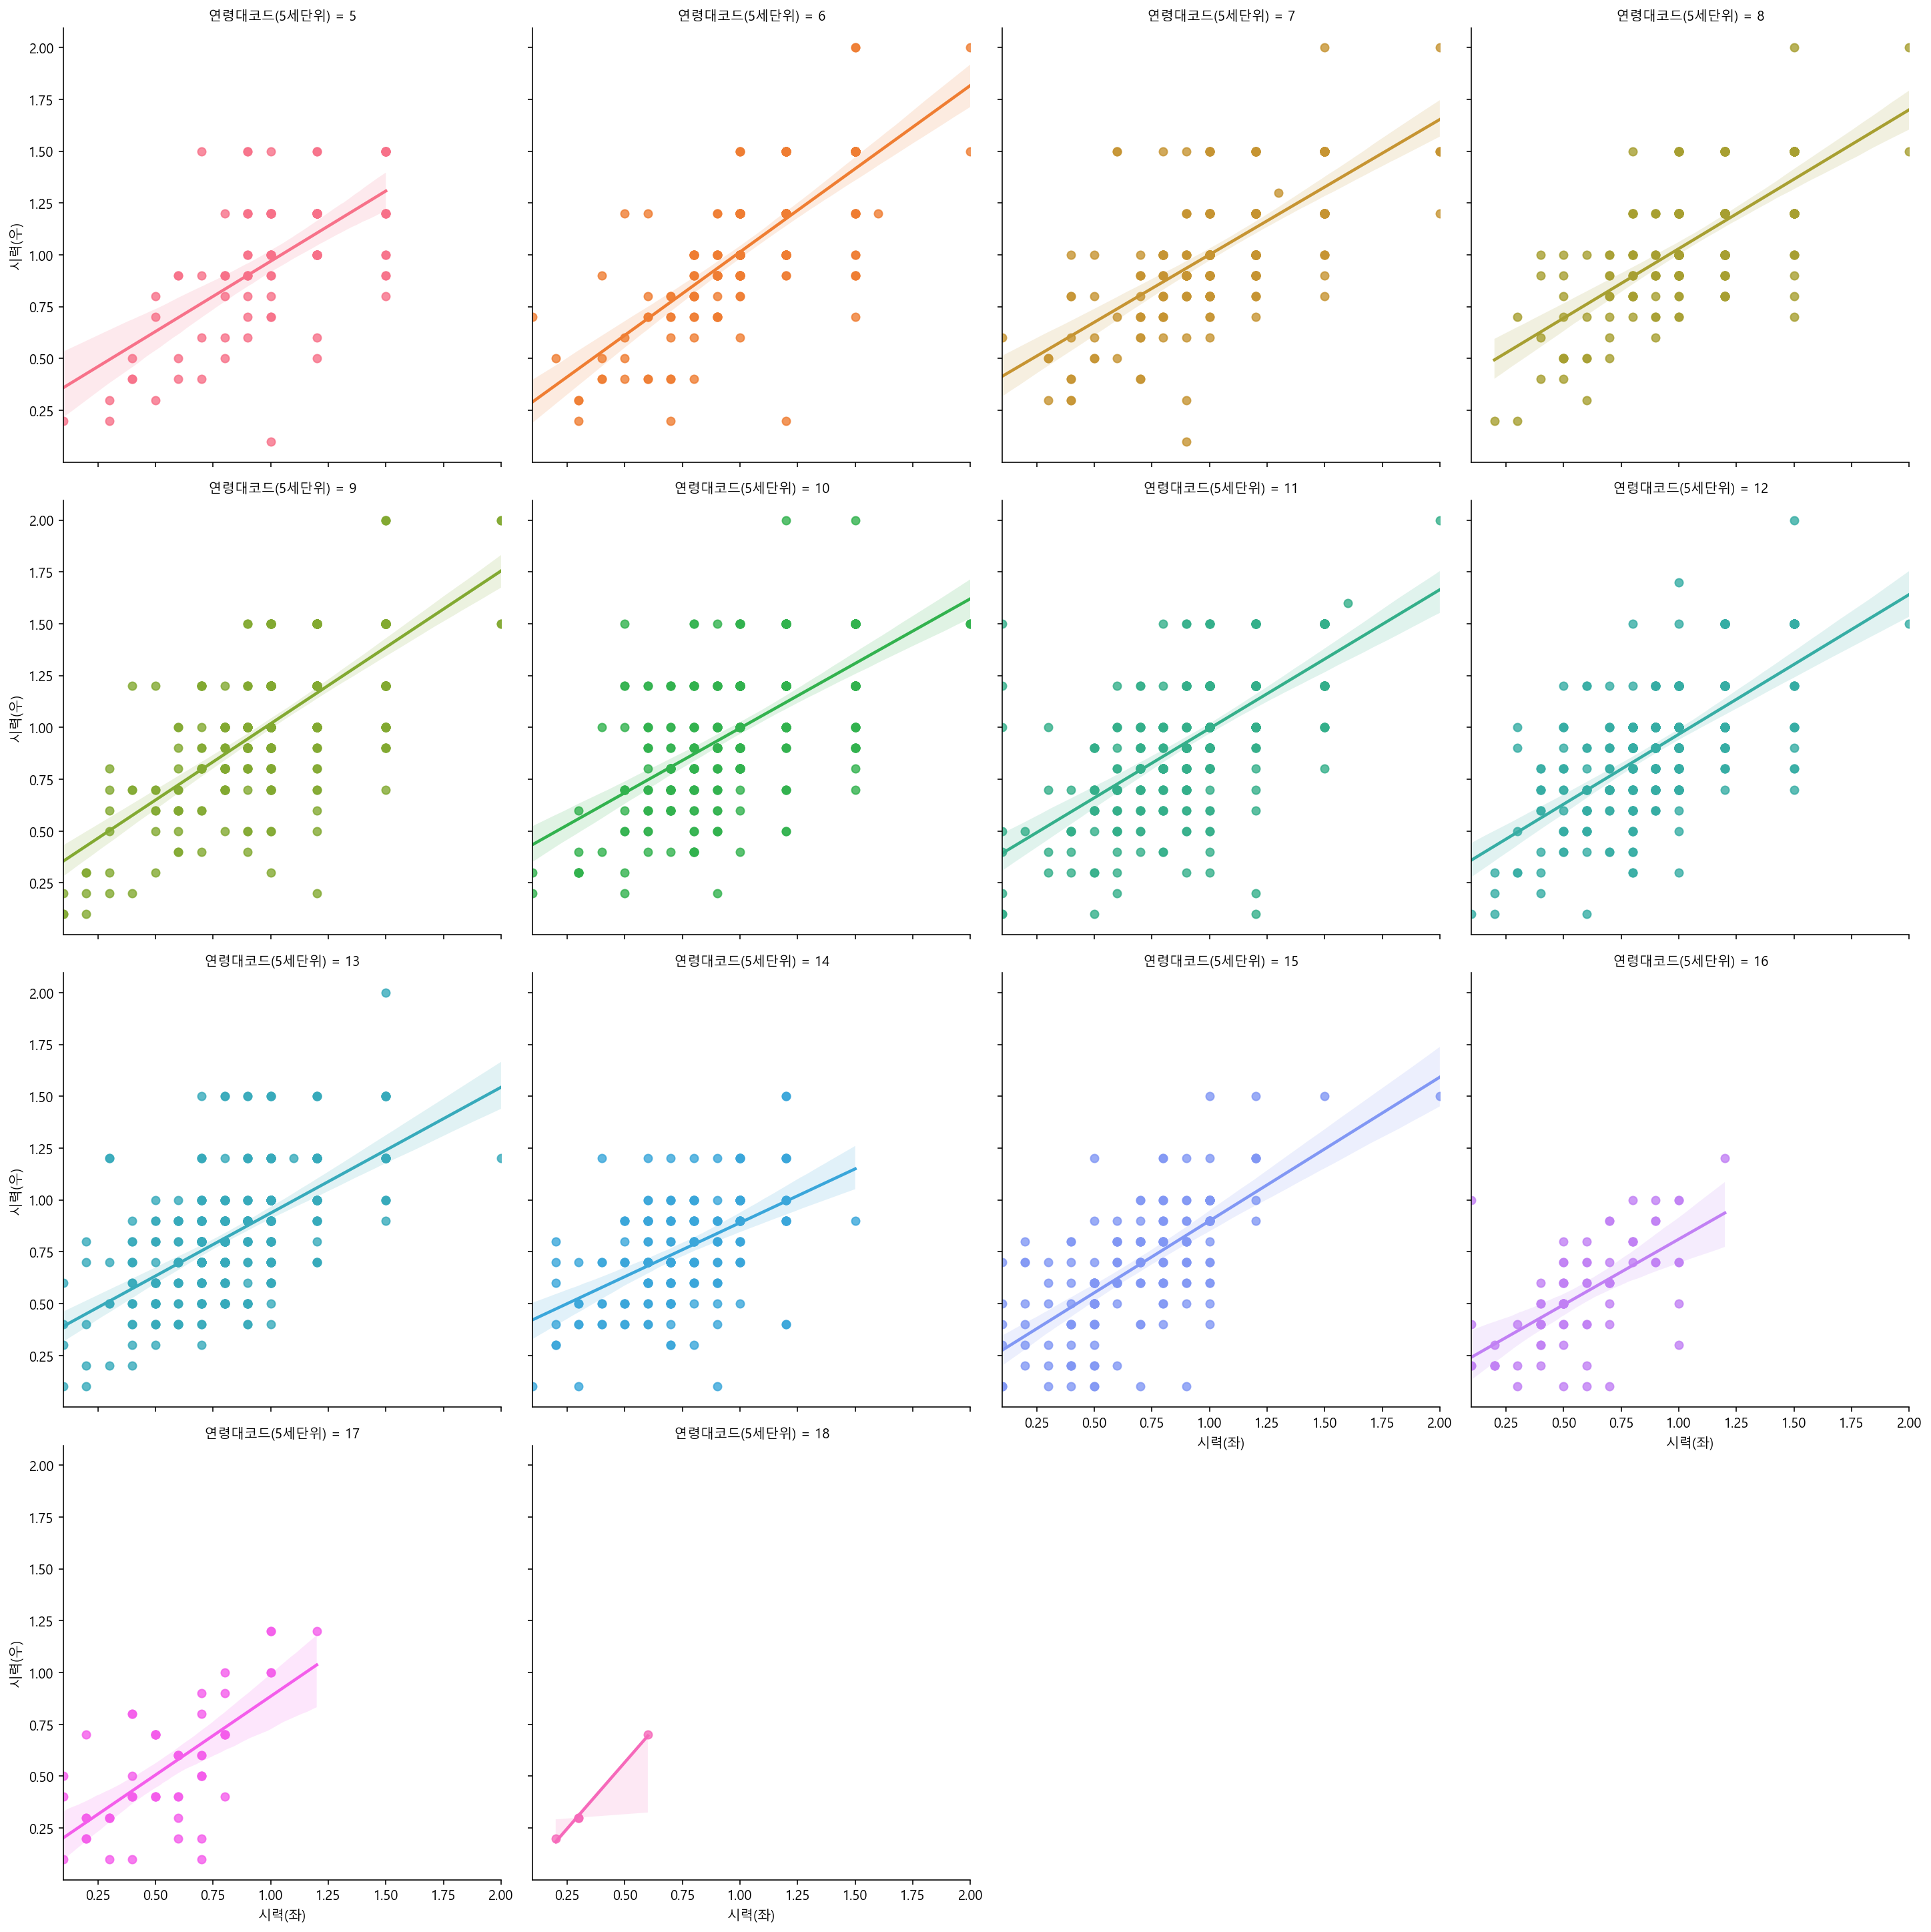

In [375]:
sns.lmplot(
    data=df_eye, 
    x="시력(좌)", y="시력(우)", hue="연령대코드(5세단위)", 
    col="연령대코드(5세단위)", col_wrap=4)

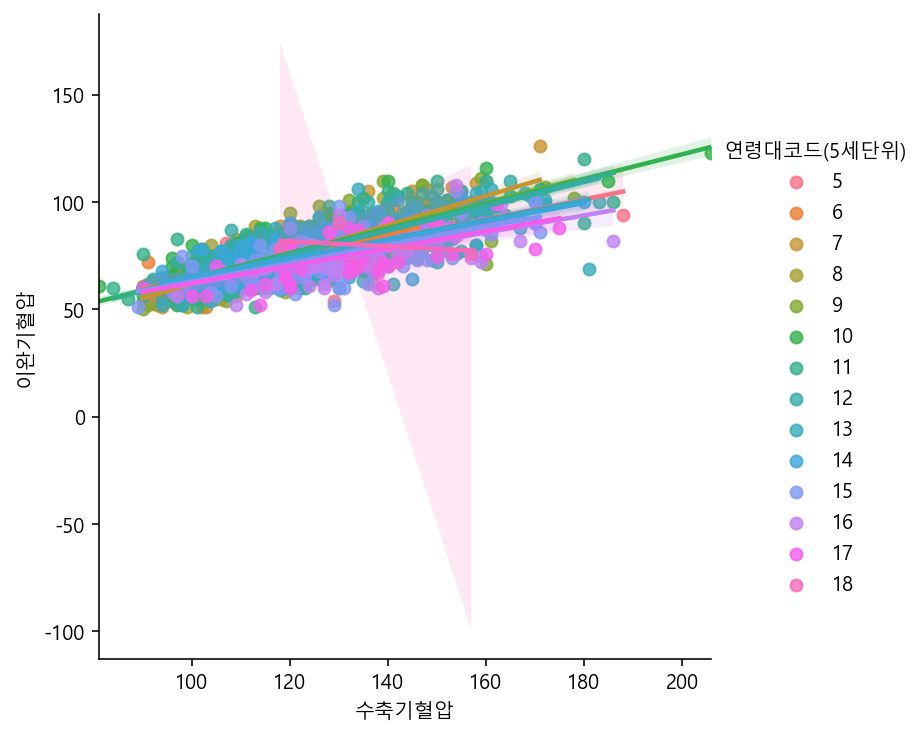

In [376]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="연령대코드(5세단위)")

`AST와 ALT`

```
AST와 ALT는 간세포에 들어 있는 효소 입니다.

간이 손상돼 간세포가 파괴되면 그 안에 있던 AST와 ALT 가 빠져 나와 혈액 속에 섞여 돌아다니게 됩니다. 따라서 간이 손상되면 AST와 ALT 수치가 높아집니다.

정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5~40 IU/L 정도 입니다.

간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 딱 한 번의 검사만으로 간질환 여부를 판단하는 경우는 드뭅니다. 하지만 AST 와 ALT 같은 간수치는 간의 상태를 일차적으로 파악하는데 아주 중요한 기준이 됩니다.
```

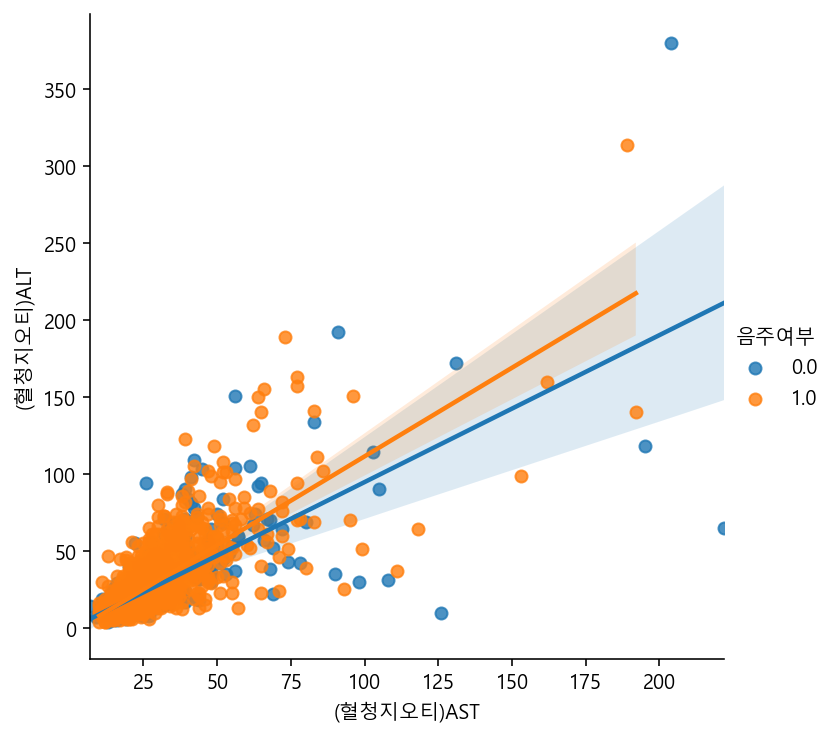

In [377]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [378]:
df_sample["(혈청지오티)AST"].value_counts()

21.0     221
20.0     189
19.0     186
22.0     184
24.0     162
        ... 
90.0       1
86.0       1
195.0      1
189.0      1
93.0       1
Name: (혈청지오티)AST, Length: 93, dtype: int64

In [379]:
df_ASLT = df_sample[
    ( df_sample["(혈청지오티)AST"] < 400 ) & 
    ( df_sample["(혈청지오티)ALT"] < 400 )]

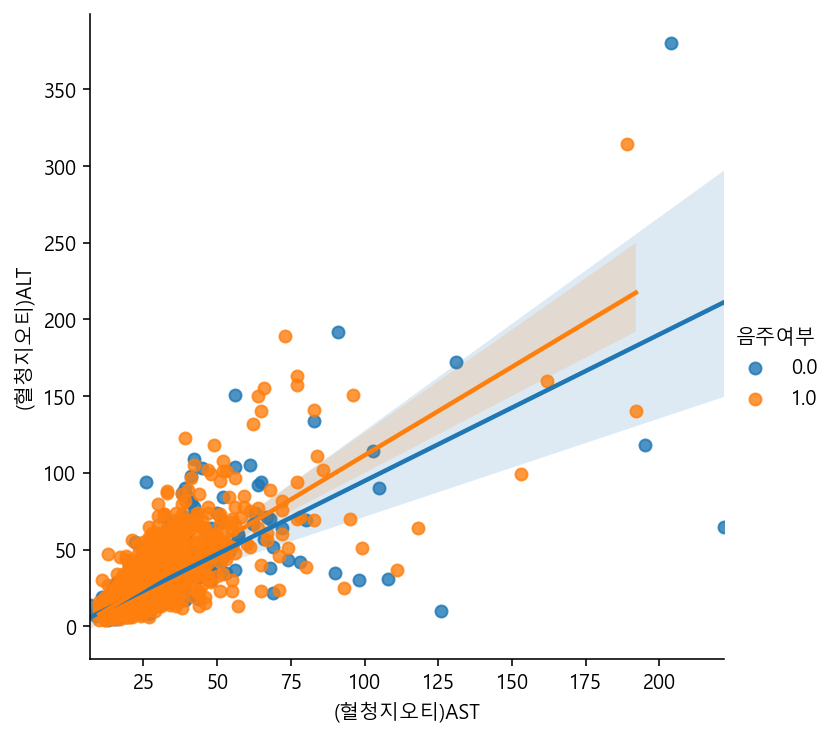

In [380]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [381]:
df_ASLT_high = df[
    ( df["(혈청지오티)AST"] > 400 ) & 
    ( df["(혈청지오티)ALT"] > 400 )]
df_ASLT_high.shape

(133, 34)

In [382]:
df_ASLT_high.head()

기준년도  가입자일련번호  시도코드  성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
23910  2019    23911    41     1           10        170         80  93.0   
33915  2019    33916    44     2            9        150         45  67.0   
36311  2019    36312    27     2           10        165         60  77.0   
53893  2019    53894    41     2           11        150         55  78.0   
65937  2019    65938    27     2           11        155         50  81.0   

       시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
23910    1.2    1.0  ...  433.0   2.0   1.0         0      NaN    미시행   
33915    1.0    1.2  ...  224.0   1.0   1.0         1      1.0    미시행   
36311    0.7    0.7  ...  416.0   1.0   1.0         0      NaN    미시행   
53893    1.0    1.0  ...  157.0   1.0   0.0         0      NaN    미시행   
65937    1.0    0.9  ...  201.0   2.0   1.0         0      NaN    미시행   

       치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
23910      미시행           미시행  NaN  20191231  
33915      미시행           미시행  1.0  20191231  
36311      미시행           미시행  NaN  20191231  
53893      미시행           미시행  NaN  20191231  
65937      미시행           미시행  NaN  20191231  

[5 rows x 34 columns]

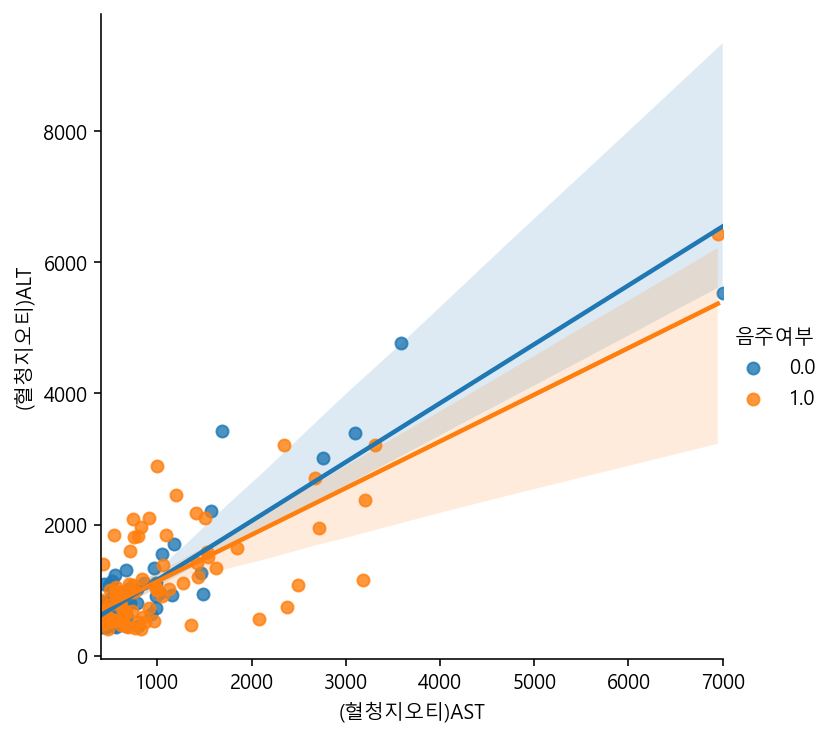

In [383]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

### scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

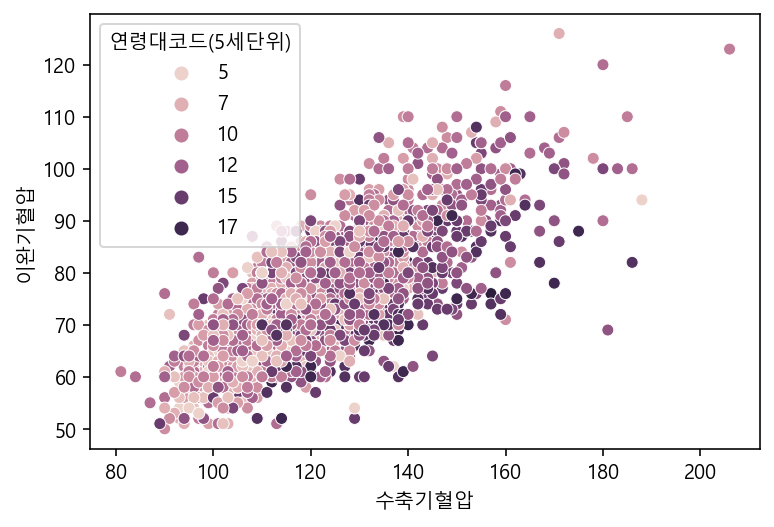

In [384]:
sns.scatterplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="연령대코드(5세단위)")

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

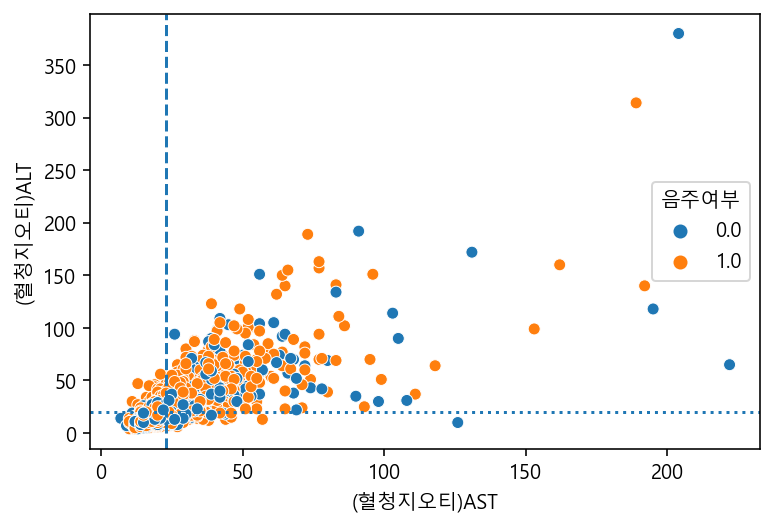

In [385]:
#plt.axhline()로 가로선을 그린다.
#plt.axvline()로 세로선을 그릴 수 있다. 
df_ASLT = df_sample[
    ( df_sample["(혈청지오티)AST"] < 400 ) & 
    ( df_sample["(혈청지오티)ALT"] < 400 )]
plt.axvline(df_ASLT["(혈청지오티)AST"].median(), linestyle='--')
plt.axhline(df_ASLT["(혈청지오티)ALT"].median(), linestyle=':')
sns.scatterplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [389]:
df_ASLT['음주여부'].unique()

array([1., 0.])

In [392]:
df_ASLT['성별코드'].unique()

array([1, 2], dtype=int64)

In [393]:
df_ASLT['흡연상태'].unique()

array([1., 2.])

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

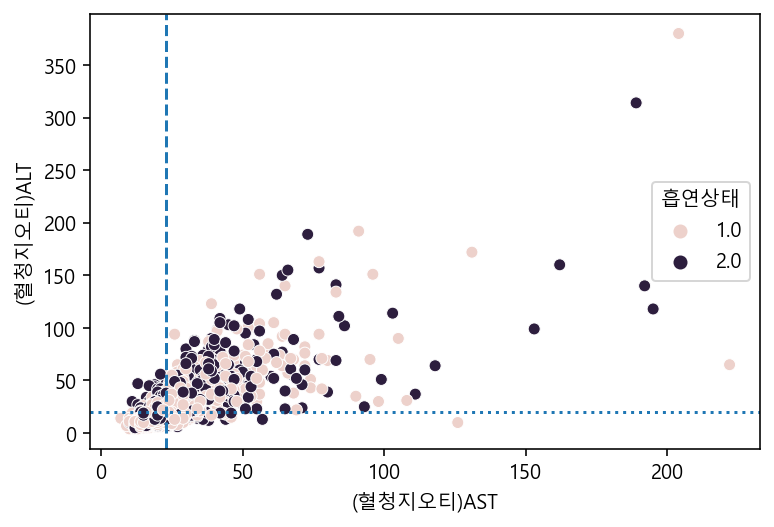

In [394]:
plt.axvline(df_ASLT["(혈청지오티)AST"].median(), linestyle='--')
plt.axhline(df_ASLT["(혈청지오티)ALT"].median(), linestyle=':')
sns.scatterplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="흡연상태")

### distplot

In [395]:
df_sample.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='Density'>

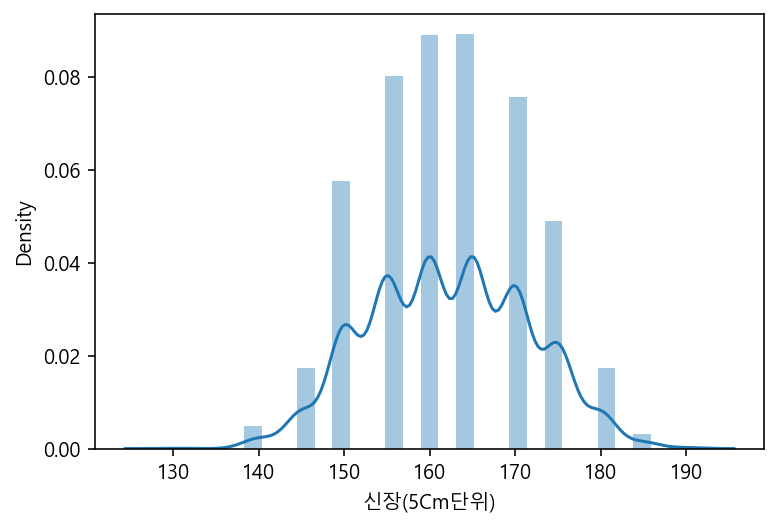

In [396]:
sns.distplot(df_sample.loc[df_sample["신장(5Cm단위)"].notnull(), "신장(5Cm단위)"], kde=True)

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

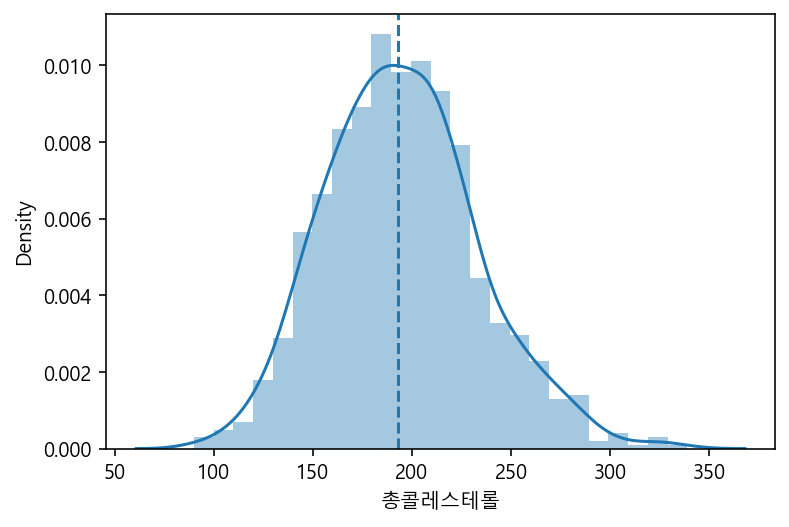

In [398]:
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle='dashed')
sns.distplot(df_sample["총콜레스테롤"])

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

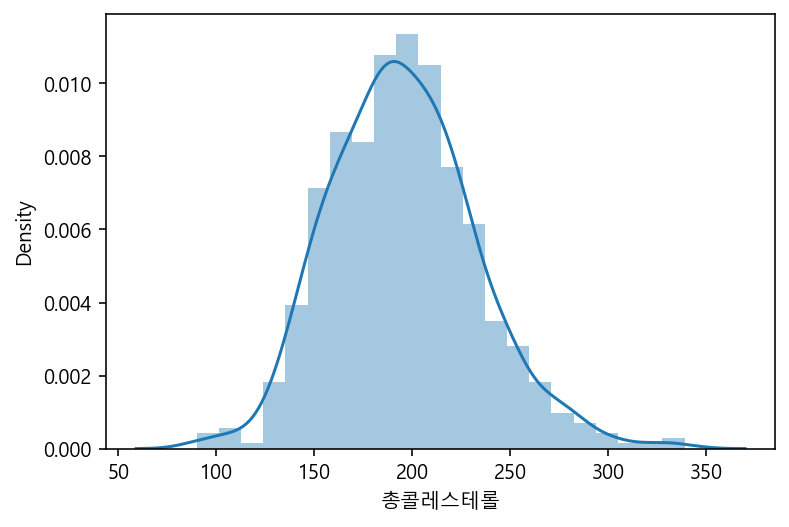

In [399]:
sns.distplot(df_sample.loc[df_sample["음주여부"] == 1, "총콜레스테롤"])

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

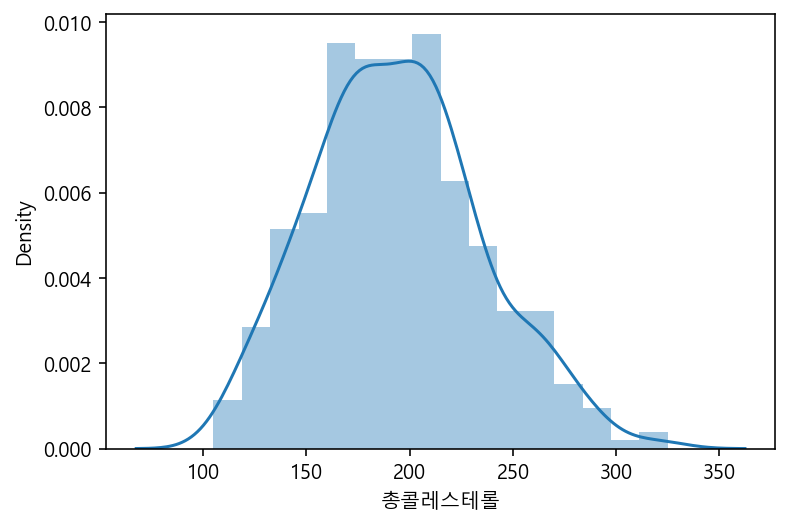

In [400]:
sns.distplot(df_sample.loc[df_sample["음주여부"] == 0, "총콜레스테롤"])

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

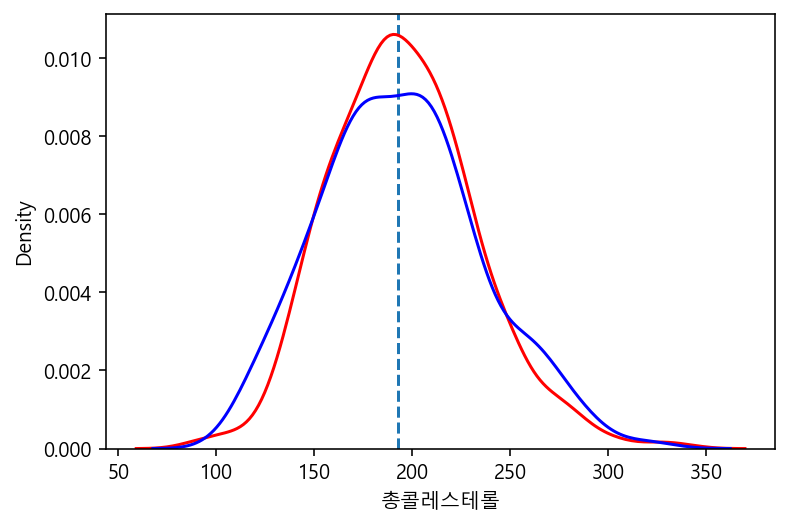

In [401]:
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle='dashed')
#sns.set_color_codes()
sns.distplot(df_sample.loc[df_sample["음주여부"] == 1, "총콜레스테롤"], hist=False,color="r")
sns.distplot(df_sample.loc[df_sample["음주여부"] == 0, "총콜레스테롤"], hist=False,color="b")

<AxesSubplot:xlabel='시력(우)', ylabel='Density'>

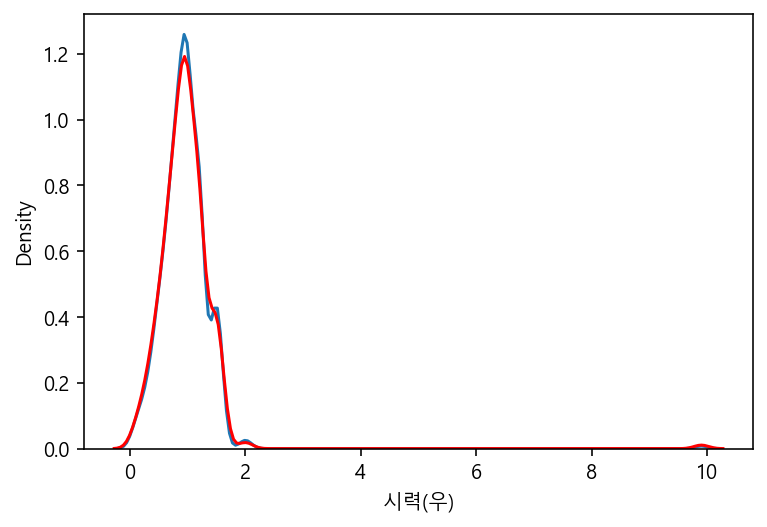

In [402]:
sns.distplot(df_sample.loc[df_sample["시력(좌)"].notnull(), "시력(좌)"],
             hist=False, label="시력(좌)")
sns.distplot(df_sample.loc[df_sample["시력(우)"].notnull(), "시력(우)"], 
             hist=False, label="시력(우)", color="r")

<AxesSubplot:xlabel='시력(우)', ylabel='Density'>

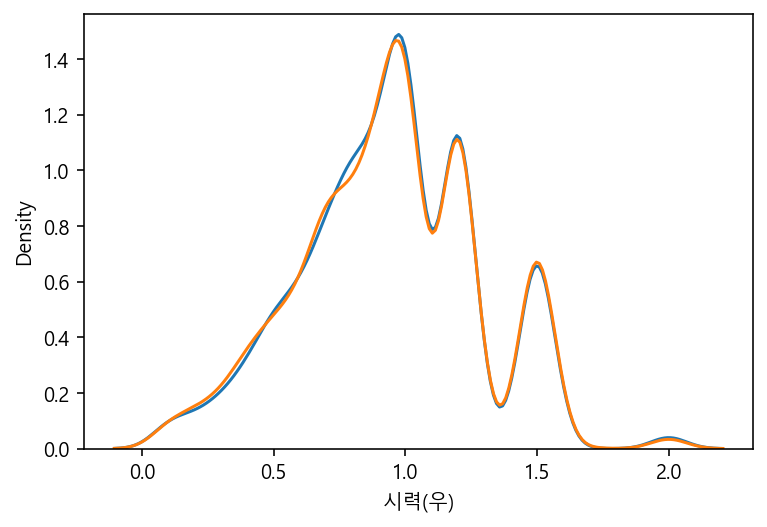

In [403]:
#df_eye = df_sample[(df_sample["시력(좌)"] < 3) & (df_sample["시력(우)"] < 3)]
sns.distplot(df_eye["시력(좌)"], label="시력(좌)", hist=False)
sns.distplot(df_eye["시력(우)"], label="시력(우)", hist=False)

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [404]:
columns = ['연령대코드(5세단위)', '체중(5Kg단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [405]:
df_sample.shape

(3000, 34)

In [406]:
df_small = df_sample[columns].sample(1000)
df_small

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  \
269091            5         65        175  74.2    0.4    0.4    1.0    1.0   
476149            6         70        175  88.0    1.0    0.9    1.0    1.0   
979337           18         60        140  98.0    0.3    0.3    1.0    1.0   
558038            7         75        160  92.0    1.2    1.5    1.0    1.0   
486109            9         85        180  82.0    0.9    0.5    1.0    1.0   
...             ...        ...        ...   ...    ...    ...    ...    ...   
220735           16         45        160  62.0    1.0    1.0    1.0    1.0   
459582           12         50        145  75.0    0.8    0.9    1.0    1.0   
882738           12         55        145  83.5    1.0    0.8    1.0    1.0   
270381           17         60        160  88.5    0.8    9.9    2.0    1.0   
834010           11         75        170  97.0    0.9    0.9    1.0    1.0   

        수축기혈압  이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  \
269091  120.0   70.0  ...       NaN       NaN  13.9  1.0      0.9        29.0   
476149  120.0   72.0  ...       NaN       NaN  16.6  2.0      0.9        22.0   
979337  132.0   76.0  ...      86.0      75.0  11.5  1.0      0.9        29.0   
558038  118.0   78.0  ...       NaN       NaN  15.6  1.0      1.0        39.0   
486109  124.0   84.0  ...       NaN       NaN  15.7  1.0      0.8        16.0   
...       ...    ...  ...       ...       ...   ...  ...      ...         ...   
220735  113.0   68.0  ...      59.0     157.0  13.5  1.0      0.8        26.0   
459582  110.0   70.0  ...      60.0      62.0  12.7  1.0      0.9        48.0   
882738  111.0   70.0  ...      54.0      71.0  13.1  1.0      0.7        23.0   
270381  134.0   70.0  ...       NaN       NaN  15.4  1.0      1.2        28.0   
834010  115.0   72.0  ...       NaN       NaN  15.7  1.0      0.8        24.0   

        (혈청지오티)ALT  감마지티피  흡연상태  음주여부  
269091        31.0   87.0   2.0   1.0  
476149        26.0   63.0   2.0   1.0  
979337        27.0   20.0   1.0   0.0  
558038        71.0   41.0   1.0   0.0  
486109        15.0   27.0   2.0   1.0  
...            ...    ...   ...   ...  
220735        13.0   18.0   1.0   0.0  
459582        37.0   21.0   1.0   0.0  
882738        32.0   14.0   1.0   1.0  
270381        18.0   55.0   1.0   1.0  
834010        35.0   23.0   1.0   1.0  

[1000 rows x 23 columns]

In [408]:
df_small = df_sample[columns].sample(1000)
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.167013  -0.354413  0.194613 -0.260463 -0.205649   
체중(5Kg단위)      -0.167013   1.000000   0.660315  0.798804  0.125577  0.112304   
신장(5Cm단위)      -0.354413   0.660315   1.000000  0.335436  0.166587  0.159107   
허리둘레            0.194613   0.798804   0.335436  1.000000 -0.006298  0.016254   
시력(좌)          -0.260463   0.125577   0.166587 -0.006298  1.000000  0.292864   
시력(우)          -0.205649   0.112304   0.159107  0.016254  0.292864  1.000000   
청력(좌)           0.222114  -0.033264  -0.099349  0.064617 -0.071463 -0.073986   
청력(우)           0.188891  -0.037746  -0.102274  0.055734 -0.075028 -0.078417   
수축기혈압           0.314515   0.260015   0.045743  0.378760 -0.090375 -0.047088   
이완기혈압           0.149247   0.280743   0.123301  0.342721 -0.029302  0.005362   
식전혈당(공복혈당)      0.263884   0.145559   0.058605  0.226759 -0.088725 -0.085271   
총콜레스테롤         -0.022192   0.041278  -0.017455  0.070272  0.002262  0.016586   
트리글리세라이드       -0.034595   0.278752   0.166222  0.286747  0.077774  0.151718   
HDL콜레스테롤        0.032481  -0.362988  -0.222712 -0.367107  0.002467 -0.051065   
LDL콜레스테롤       -0.027445   0.082832  -0.000001  0.102439 -0.025897 -0.003207   
혈색소            -0.115881   0.482904   0.512114  0.373356  0.151034  0.113575   
요단백             0.071730   0.026649   0.044432  0.053029 -0.047178 -0.036422   
혈청크레아티닌         0.036188   0.194853   0.225515  0.148708  0.001361 -0.014983   
(혈청지오티)AST      0.156397   0.130467   0.015161  0.209609 -0.059633 -0.037726   
(혈청지오티)ALT      0.002304   0.332679   0.158870  0.344064 -0.003122  0.004537   
감마지티피           0.049092   0.179546   0.142422  0.209175  0.018462  0.003532   
흡연상태           -0.025700   0.368921   0.438924  0.288608  0.088743  0.065078   
음주여부           -0.320267   0.222310   0.348701  0.078915  0.134532  0.092900   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.222114  0.188891  0.314515  0.149247  ...  0.032481 -0.027445   
체중(5Kg단위)   -0.033264 -0.037746  0.260015  0.280743  ... -0.362988  0.082832   
신장(5Cm단위)   -0.099349 -0.102274  0.045743  0.123301  ... -0.222712 -0.000001   
허리둘레         0.064617  0.055734  0.378760  0.342721  ... -0.367107  0.102439   
시력(좌)       -0.071463 -0.075028 -0.090375 -0.029302  ...  0.002467 -0.025897   
시력(우)       -0.073986 -0.078417 -0.047088  0.005362  ... -0.051065 -0.003207   
청력(좌)        1.000000  0.484840  0.060204  0.029551  ...  0.079123 -0.039593   
청력(우)        0.484840  1.000000  0.099907  0.056438  ...  0.028109 -0.001087   
수축기혈압        0.060204  0.099907  1.000000  0.730326  ... -0.126580  0.023642   
이완기혈압        0.029551  0.056438  0.730326  1.000000  ... -0.001194  0.090755   
식전혈당(공복혈당)   0.094690  0.113324  0.239203  0.162396  ... -0.042767 -0.038297   
총콜레스테롤      -0.043394 -0.021152  0.054686  0.135215  ...  0.151459  0.926566   
트리글리세라이드    -0.077454 -0.081649  0.196227  0.120954  ... -0.388192 -0.033858   
HDL콜레스테롤     0.079123  0.028109 -0.126580 -0.001194  ...  1.000000 -0.049971   
LDL콜레스테롤    -0.039593 -0.001087  0.023642  0.090755  ... -0.049971  1.000000   
혈색소         -0.046160 -0.020512  0.170107  0.279180  ... -0.213014  0.075961   
요단백          0.025287  0.067186  0.104413  0.026167  ... -0.051061 -0.026657   
혈청크레아티닌      0.026004  0.023466  0.126488  0.129929  ... -0.173547 -0.017242   
(혈청지오티)AST   0.043077  0.089622  0.104128  0.083884  ... -0.094419 -0.042218   
(혈청지오티)ALT   0.007581  0.058797  0.121446  0.141381  ... -0.222472  0.029728   
감마지티피        0.005973  0.012913  0.122538  0.136522  ... -0.069196 -0.108353   
흡연상태         0.001539  0.004469  0.154652  0.179784  ... -0.083664 -0.027959   
음주여부        -0.038090 -0.039832 -0.013351  0.052199  ...  0.013715 -0.047761   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.115881  0.071730  0.036188    0.156397    0.002304  0.049092   
체중(5Kg단위)    

In [409]:
df_corr.columns

Index(['연령대코드(5세단위)', '체중(5Kg단위)', '신장(5Cm단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

In [410]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3,:]

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
체중(5Kg단위)    -0.167013   1.000000   0.660315  0.798804  0.125577  0.112304   
신장(5Cm단위)    -0.354413   0.660315   1.000000  0.335436  0.166587  0.159107   
허리둘레          0.194613   0.798804   0.335436  1.000000 -0.006298  0.016254   
혈색소          -0.115881   0.482904   0.512114  0.373356  0.151034  0.113575   
흡연상태         -0.025700   0.368921   0.438924  0.288608  0.088743  0.065078   
음주여부         -0.320267   0.222310   0.348701  0.078915  0.134532  0.092900   

              청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
체중(5Kg단위) -0.033264 -0.037746  0.260015  0.280743  ... -0.362988  0.082832   
신장(5Cm단위) -0.099349 -0.102274  0.045743  0.123301  ... -0.222712 -0.000001   
허리둘레       0.064617  0.055734  0.378760  0.342721  ... -0.367107  0.102439   
혈색소       -0.046160 -0.020512  0.170107  0.279180  ... -0.213014  0.075961   
흡연상태       0.001539  0.004469  0.154652  0.179784  ... -0.083664 -0.027959   
음주여부      -0.038090 -0.039832 -0.013351  0.052199  ...  0.013715 -0.047761   

                혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
체중(5Kg단위)  0.482904  0.026649  0.194853    0.130467    0.332679  0.179546   
신장(5Cm단위)  0.512114  0.044432  0.225515    0.015161    0.158870  0.142422   
허리둘레       0.373356  0.053029  0.148708    0.209609    0.344064  0.209175   
혈색소        1.000000  0.000992  0.179844    0.180924    0.303871  0.195093   
흡연상태       0.421540  0.060066  0.160475    0.110073    0.178962  0.192656   
음주여부       0.296335  0.000626  0.051700    0.041480    0.062173  0.154553   

               흡연상태      음주여부  
체중(5Kg단위)  0.368921  0.222310  
신장(5Cm단위)  0.438924  0.348701  
허리둘레       0.288608  0.078915  
혈색소        0.421540  0.296335  
흡연상태       1.000000  0.307037  
음주여부       0.307037  1.000000  

[6 rows x 23 columns]

In [411]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg단위)    0.660315
신장(5Cm단위)    1.000000
허리둘레         0.335436
혈색소          0.512114
흡연상태         0.438924
음주여부         0.348701
Name: 신장(5Cm단위), dtype: float64

In [413]:
# 흡연상태에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["흡연상태"] > 0.3, "흡연상태"]

체중(5Kg단위)    0.368921
신장(5Cm단위)    0.438924
혈색소          0.421540
흡연상태         1.000000
음주여부         0.307037
Name: 흡연상태, dtype: float64

In [414]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["음주여부"] > 0.3, "음주여부"]

신장(5Cm단위)    0.348701
흡연상태         0.307037
음주여부         1.000000
Name: 음주여부, dtype: float64

In [416]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["혈색소"] > 0.3, "혈색소"]

체중(5Kg단위)     0.482904
신장(5Cm단위)     0.512114
허리둘레          0.373356
혈색소           1.000000
(혈청지오티)ALT    0.303871
흡연상태          0.421540
Name: 혈색소, dtype: float64

### heatmap
* vmax는 색상의 밝기를 조절하는 인자입니다.
* 인수를 square = True로 지정하여 제곱으로 변경할 수 있습니다.
* annot = True 인수는 상관 계수를 표시해 줍니다.

<AxesSubplot:>

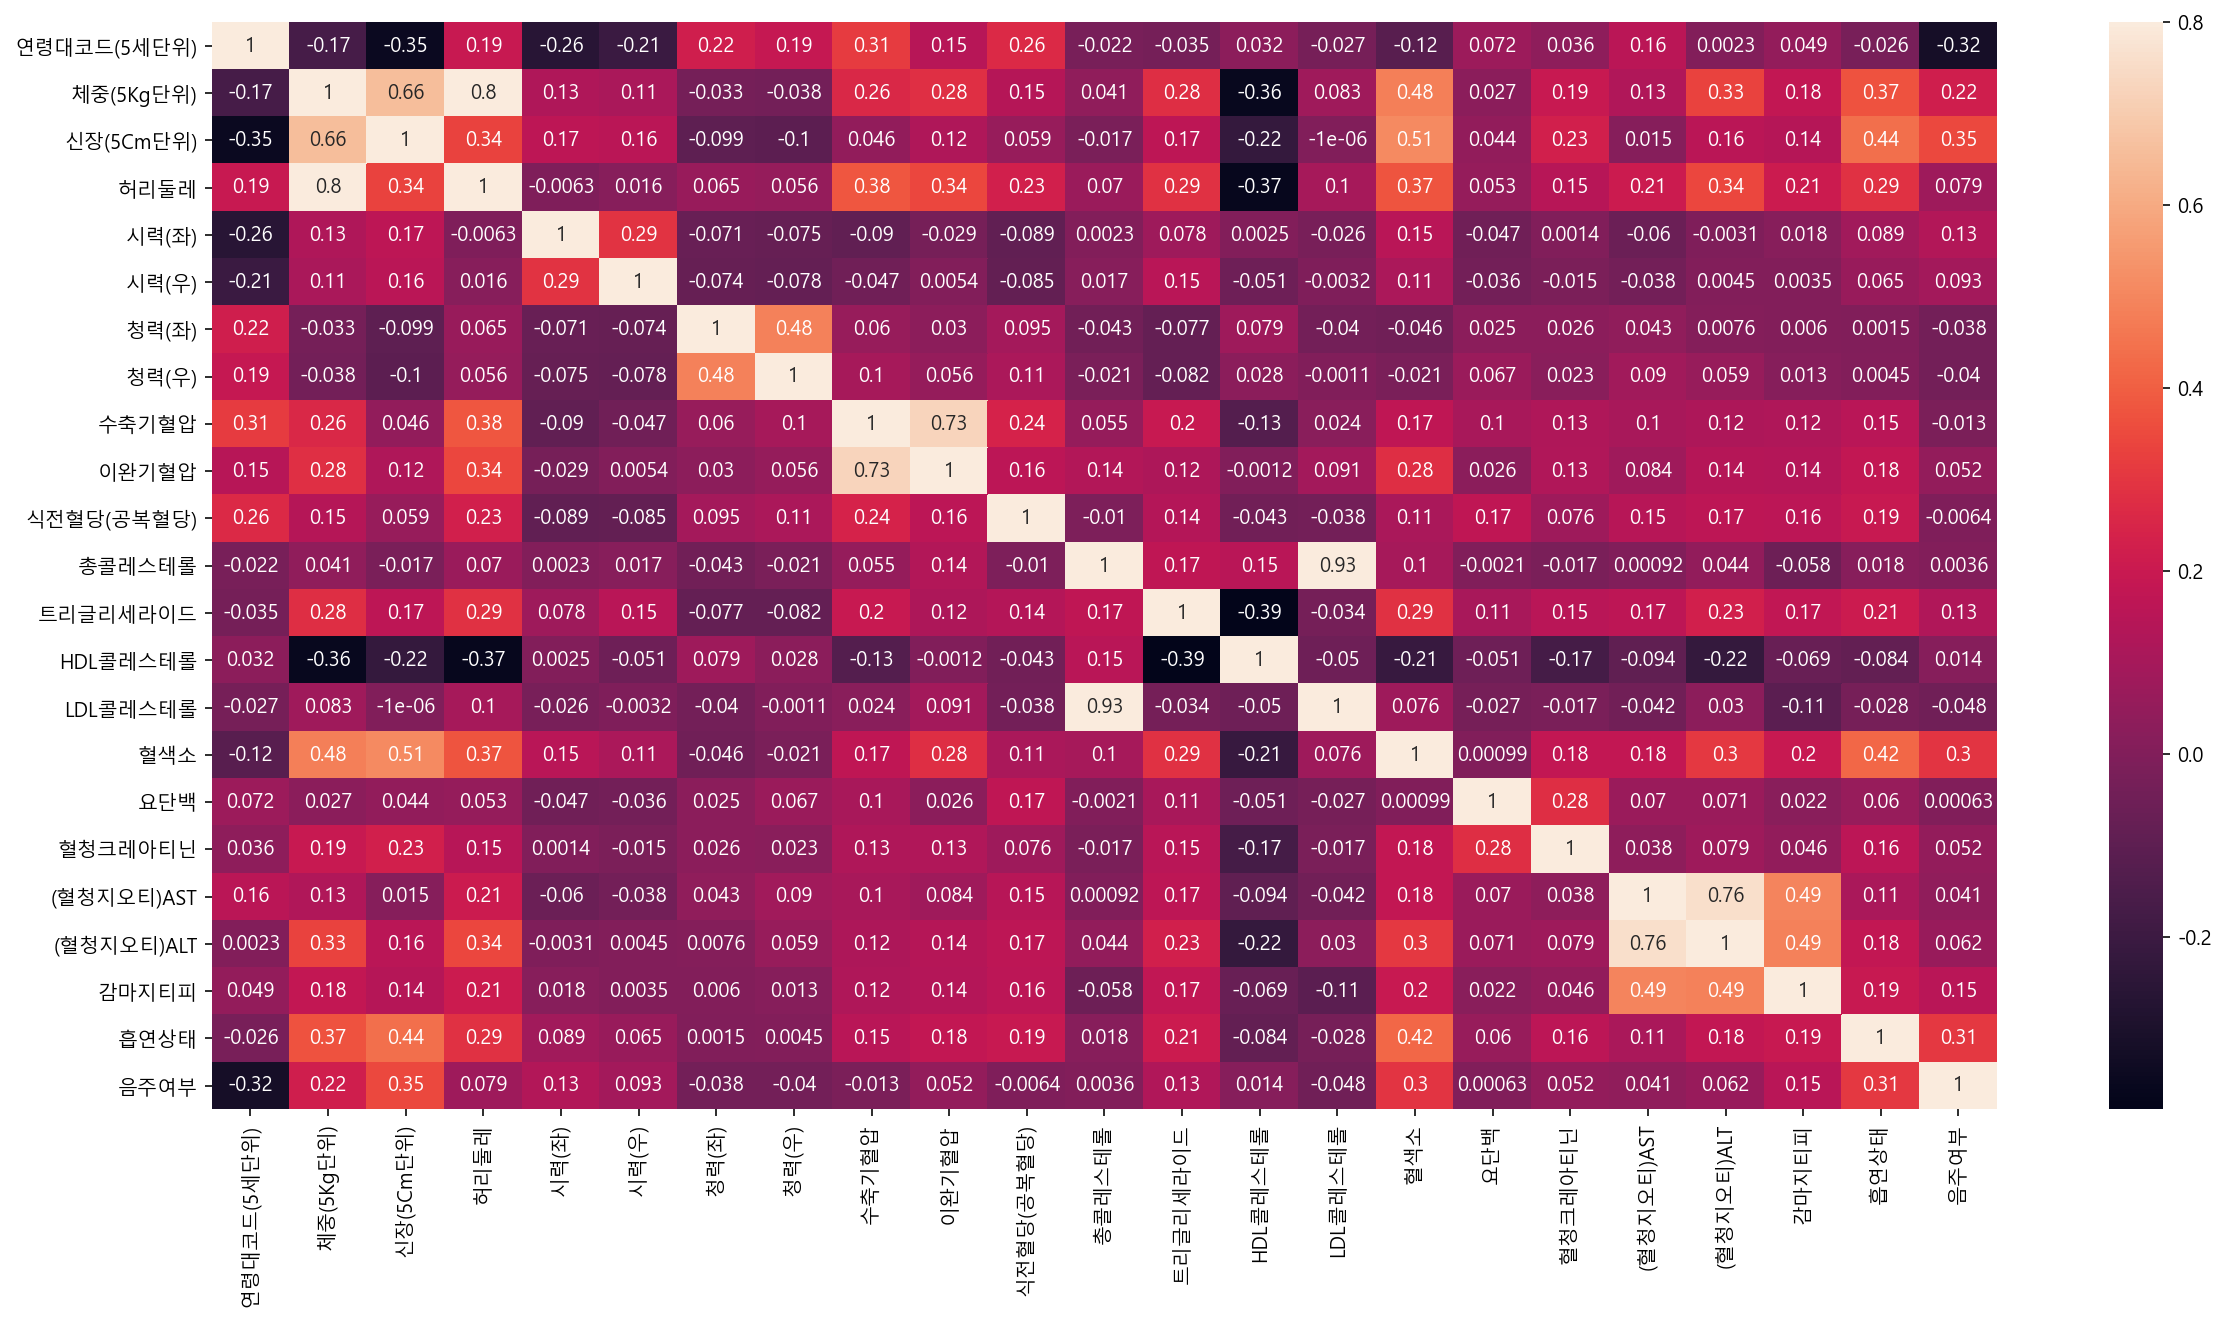

In [417]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, vmax=.8, square=False, annot=True)

<AxesSubplot:>

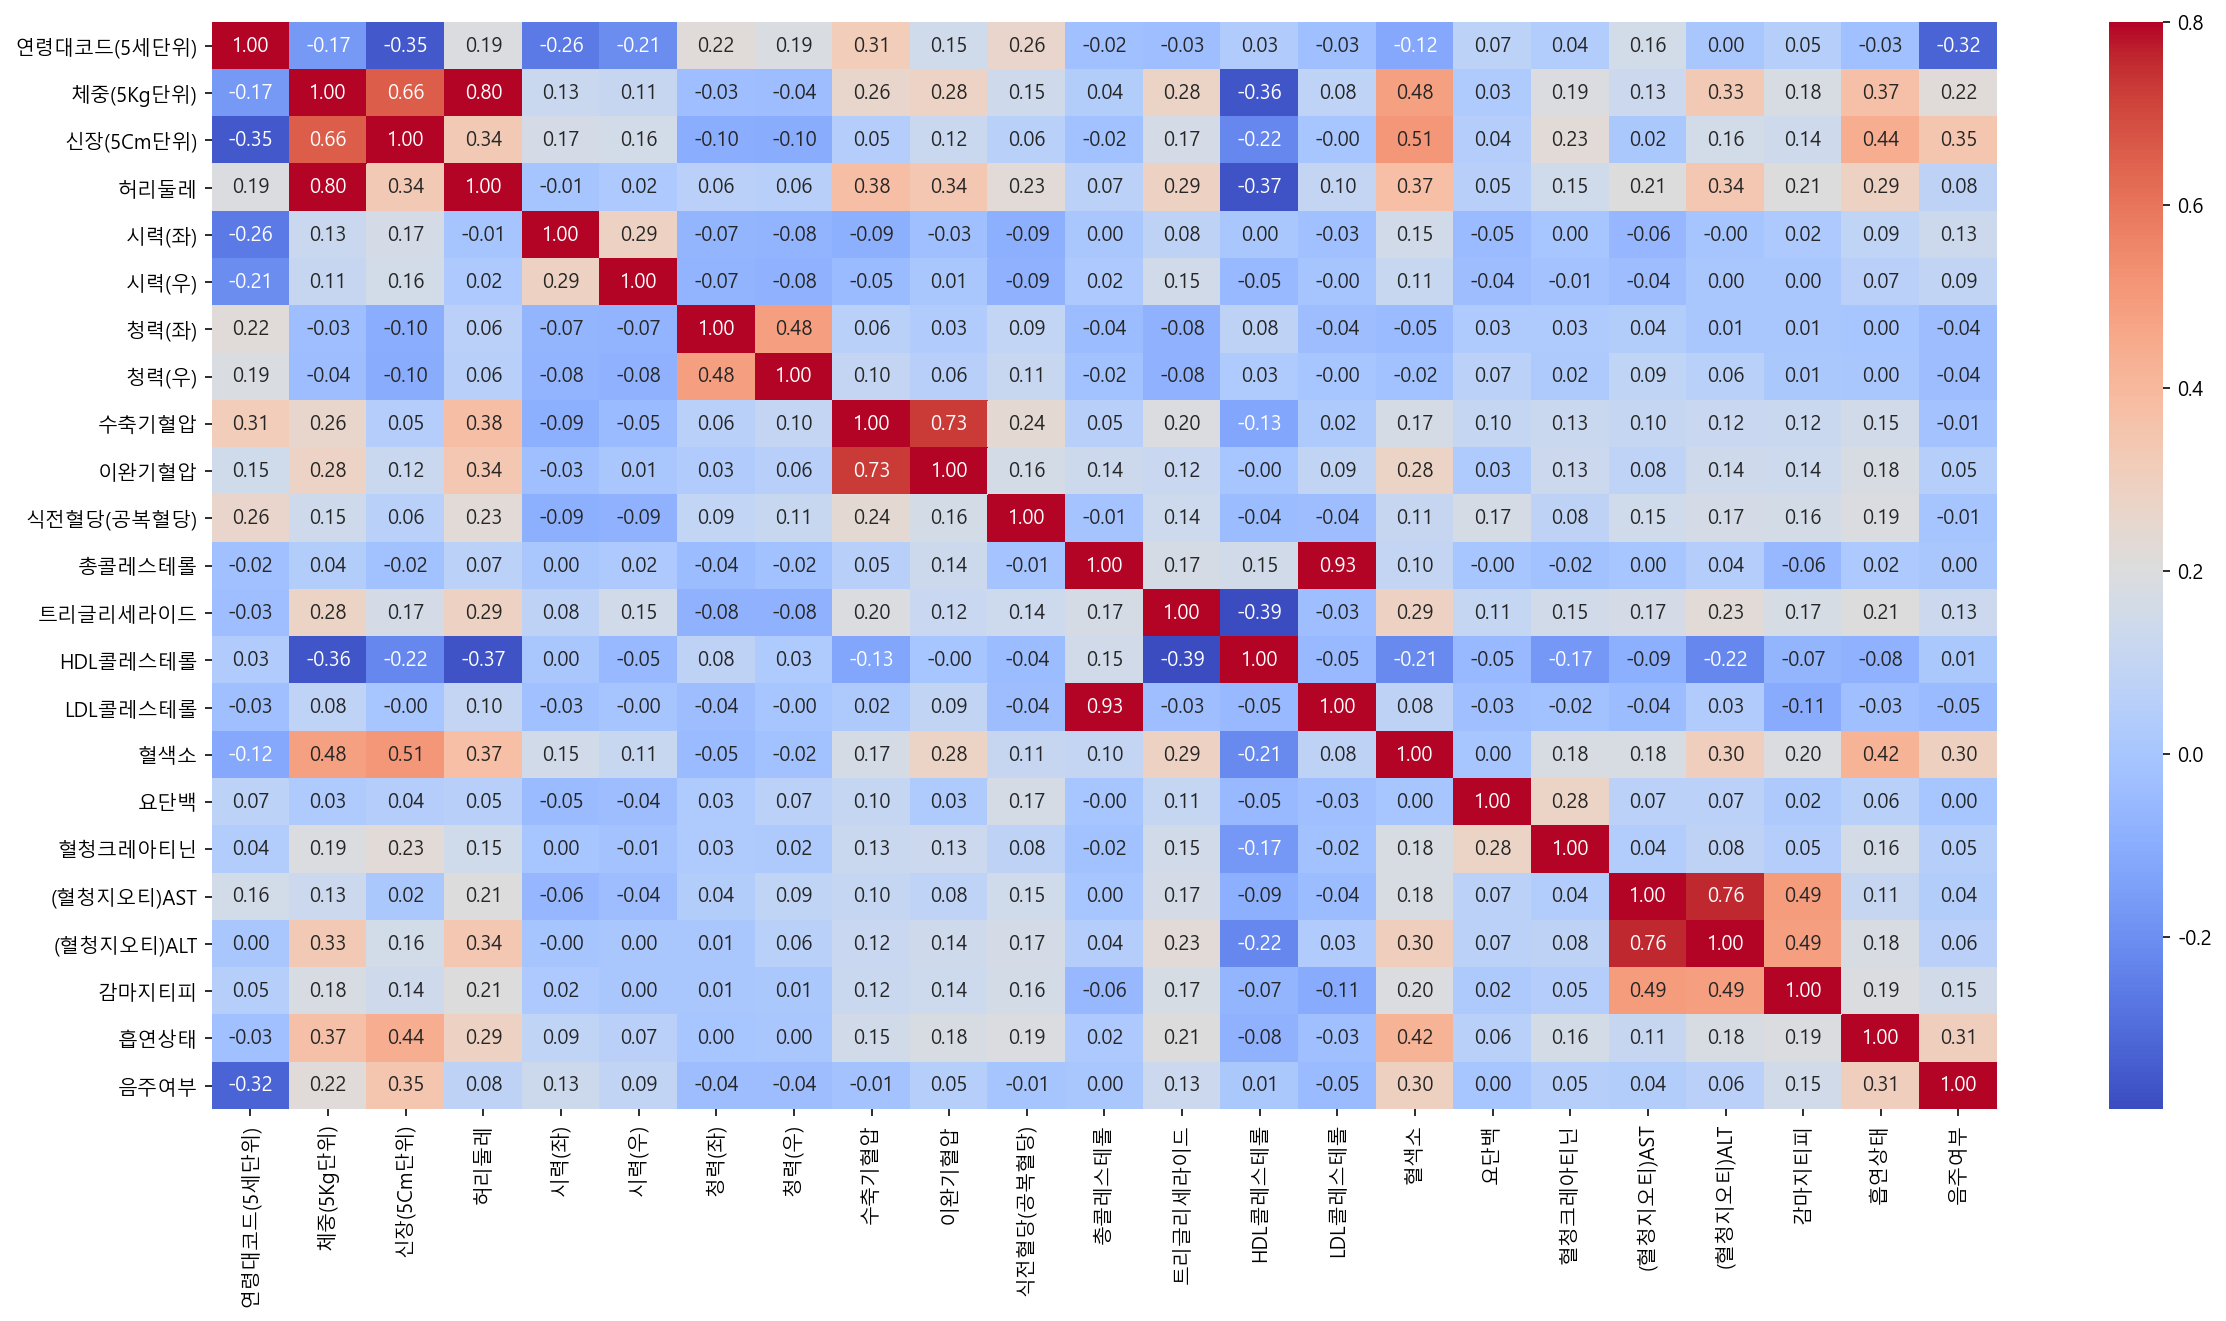

In [418]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, vmax=.8, square=False, annot=True, cmap='coolwarm',fmt=".2f")

## 간 기능
* [간기능 검사 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B0%84%EA%B8%B0%EB%8A%A5_%EA%B2%80%EC%82%AC)
* [감마지티피(r-GTP) 란? : 네이버 블로그](https://m.blog.naver.com/ace2hk/220366726585)

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

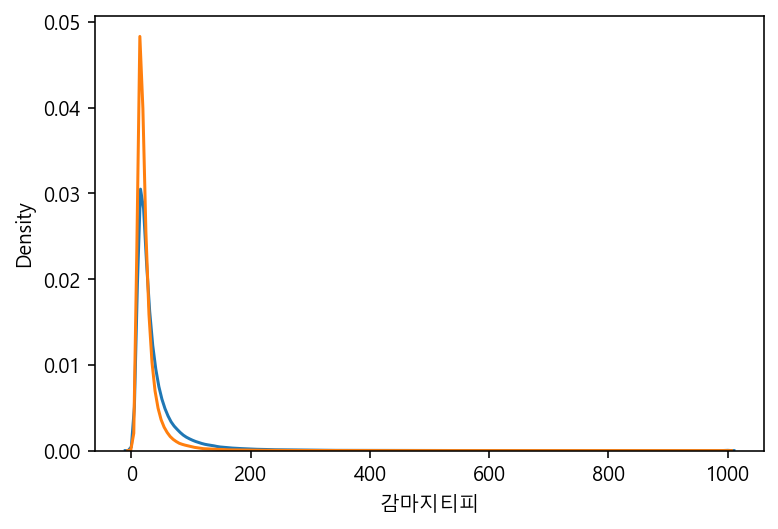

In [419]:
df_GTP = df[df["감마지티피"].notnull()]
df_GTP.head()
sns.distplot(df_GTP.loc[df_GTP["음주여부"] == 1, "감마지티피"], label="음주", hist=False)
sns.distplot(df_GTP.loc[df_GTP["음주여부"] != 1, "감마지티피"], label="음주 안 함", hist=False)

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

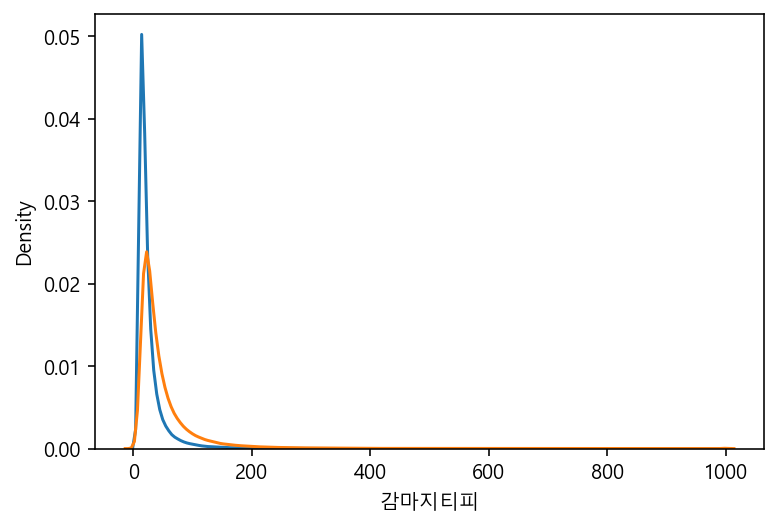

In [421]:
sns.distplot(df_GTP.loc[df_GTP["흡연상태"] == 1, "감마지티피"], 
             label="흡연 안 함", hist=False)
sns.distplot(df_GTP.loc[df_GTP["흡연상태"] == 2, "감마지티피"], 
             label="흡연 중", hist=False)
# sns.distplot(df_GTP.loc[df_GTP["흡연상태"] == 3, "감마 지티피"], 
#              label="흡연 중", hist=False)